In [141]:
import pandas as pd

injury_df = pd.read_csv("/Users/noah/Desktop/NBA_injuries_project/newest_injury_df.csv")

injury_df.head()


,Unnamed: 0,player,reason,date,team,season,prev_season,prev_prev_season,next_season,next_next_season,age,season_y
0,0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10
1,1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,2009-10
2,2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,2009-10
3,3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10
4,4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,2009-10


In [142]:
injury_df = injury_df.drop(columns = "season_y")



In [143]:
injury_df.head()

,Unnamed: 0,player,reason,date,team,season,prev_season,prev_prev_season,next_season,next_next_season,age
0,0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0
1,1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0
2,2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0
3,3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0
4,4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0


In [144]:
injury_df = injury_df.drop(columns = "Unnamed: 0")

In [145]:
all_stats = pd.read_csv("/Users/Noah/Desktop/NBA_injuries_project/old_all_seasons_stats.csv")

In [146]:
all_stats.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional,season
0,238,A.J. Price,23,IND,PG,56,2,865,145,354,...,106,35,3,59,53,410,0,NaN,priceaj01,2009-10
1,15,Aaron Brooks,25,HOU,PG,82,82,2919,575,1331,...,434,69,14,232,199,1604,0,MIP-1,brookaa01,2009-10
2,360,Aaron Gray,25,2TM,C,32,0,311,42,82,...,22,9,11,18,54,104,0,NaN,grayaa01,2009-10
3,360,Aaron Gray,25,CHI,C,8,0,50,8,21,...,2,0,0,1,10,18,0,NaN,grayaa01,2009-10
4,360,Aaron Gray,25,NOH,C,24,0,261,34,61,...,20,9,11,17,44,86,0,NaN,grayaa01,2009-10


In [147]:
### gotta clean data a little bit before merging
all_stats.columns = all_stats.columns.str.lower()

injury_df["player"] = injury_df["player"].str.strip().str.lower()
all_stats["player"] = all_stats["player"].str.strip().str.lower()

stats_subset = all_stats.rename(columns={
    "g": "prev_g",
    "mp": "prev_mp",
    "efg%": "prev_efg%",
    "ast": "prev_ast",
    "trb": "prev_trb",
    "pts": "prev_pts",
    "awards": "prev_awards",
    "season": "prev_season"  
})

# Step 4: Merge using player and prev_season
merged_df = injury_df.merge(
    stats_subset,
    on=["player", "prev_season"],
    how="left"
)

In [148]:
merged_df.head(5)

,player,reason,date,team_x,season,prev_season,prev_prev_season,next_season,next_next_season,age_x,...,prev_trb,prev_ast,stl,blk,tov,pf,prev_pts,trp-dbl,prev_awards,player-additional
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,...,478.0,58.0,79.0,29.0,82.0,230.0,741.0,0.0,NaN,jerebjo01
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,...,98.0,1.0,7.0,16.0,12.0,76.0,104.0,0.0,NaN,pendeje02
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,...,595.0,80.0,26.0,132.0,165.0,219.0,791.0,0.0,DPOY-17,perkike01
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,...,54.0,39.0,19.0,2.0,15.0,24.0,215.0,0.0,NaN,reddmi01
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,...,515.0,119.0,38.0,81.0,127.0,223.0,988.0,0.0,NaN,okurme01


Now I gotta find the first year players came back to playing post injury and merge those results

In [149]:
def season_to_start_year(season_str):
    return int(season_str.split("-")[0])

# Normalize names and convert season strings to integers for comparison
injury_df["player"] = injury_df["player"].str.strip().str.lower()
all_stats["player"] = all_stats["player"].str.strip().str.lower()

injury_df["tear_year"] = injury_df["season"].apply(season_to_start_year)
all_stats["season_start"] = all_stats["season"].apply(season_to_start_year)

# Only keep rows where G >= 25
eligible_stats = all_stats[all_stats["g"] >= 25].copy()

In [150]:
post_injury_stats = (
    eligible_stats
    .merge(injury_df[["player", "tear_year"]], on="player")
    .query("season_start > tear_year")
    .sort_values(["player", "season_start"])
)

In [151]:
# Group and get first and second seasons (if available)
return_seasons = (
    post_injury_stats
    .groupby("player")
    .nth([0, 1])  # First and second rows per player
    .reset_index()
)

# Label first and second return seasons
return_seasons["season_type"] = return_seasons.groupby("player").cumcount().map({
    0: "first",
    1: "second"
})

# Pivot to wide format so first and second seasons are side by side
first_two = return_seasons.pivot(index="player", columns="season_type")

# Flatten the multi-index columns
first_two.columns = [f"{second}_{first}" for first, second in first_two.columns]
first_two = first_two.reset_index()

In [152]:
final_df = injury_df.merge(first_two, on="player", how="left")


In [153]:
final_df.head()

,player,reason,date,team,season,prev_season,prev_prev_season,next_season,next_next_season,age,...,first_awards,second_awards,first_player-additional,second_player-additional,first_season,second_season,first_season_start,second_season_start,first_tear_year,second_tear_year
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,...,NaN,NaN,jerebjo01,jerebjo01,2011-12,2012-13,2011.0,2012.0,2010.0,2010.0
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,...,NaN,NaN,pendeje02,pendeje02,2012-13,2013-14,2012.0,2013.0,2010.0,2010.0
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,...,NaN,NaN,perkike01,perkike01,2011-12,2012-13,2011.0,2012.0,2010.0,2010.0
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,...,NaN,NaN,reddmi01,NaN,2011-12,NaN,2011.0,NaN,2010.0,NaN
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now I need to merge the merged_df with previous year stats with final_df to get all the stats in one place

In [154]:
final_df = final_df.merge(merged_df, on=["player", "season"], how="left")

I have to remove players that tore both their acl and their achilles in such a short time from of each other that they where not able to fully recover and will therefore skew the data

In [155]:
# Step 2: Group by player and collect unique reasons
injury_reasons_by_player = injury_df.groupby("player")["reason"].unique()

# Step 3: Filter players who have both 'torn acl' and 'torn achilles'
players_with_both = injury_reasons_by_player[injury_reasons_by_player.apply(lambda x: "torn acl" in x and "torn achilles" in x)].index

# Step 4: Get full rows from final_df for these players
final_df_both = final_df[final_df["player"].isin(players_with_both)]

final_df_both.head(22)

,player,reason_x,date_x,team,season,prev_season_x,prev_prev_season_x,next_season_x,next_next_season_x,age,...,prev_trb,prev_ast,stl,blk,tov,pf,prev_pts,trp-dbl,prev_awards,player-additional
59,demarcus cousins,torn achilles,2018-01-26,Pelicans,2017-18,2016-17,2015-16,2018-19,2019-20,27.0,...,794.0,332.0,100.0,93.0,269.0,278.0,1942.0,2.0,AS,couside01
60,demarcus cousins,torn achilles,2018-01-26,Pelicans,2017-18,2016-17,2015-16,2018-19,2019-20,27.0,...,583.0,266.0,75.0,74.0,207.0,203.0,1528.0,2.0,NaN,couside01
61,demarcus cousins,torn achilles,2018-01-26,Pelicans,2017-18,2016-17,2015-16,2018-19,2019-20,27.0,...,211.0,66.0,25.0,19.0,62.0,75.0,414.0,0.0,NaN,couside01
64,dejounte murray,torn acl,2018-10-17,Spurs,2018-19,2017-18,2016-17,2019-20,2020-21,22.0,...,459.0,231.0,97.0,31.0,134.0,151.0,654.0,0.0,DEF2,murrade01
68,klay thompson,torn acl,2019-06-14,Warriors,2019-20,2018-19,2017-18,2020-21,2021-22,29.0,...,299.0,186.0,84.0,47.0,115.0,157.0,1680.0,0.0,ASDEF2,thompkl01
70,demarcus cousins,torn acl,2019-10-22,Lakers,2019-20,2018-19,2017-18,2020-21,2021-22,29.0,...,247.0,107.0,40.0,44.0,72.0,109.0,488.0,0.0,NaN,couside01
89,dru smith,torn acl,2023-11-25,Miami Heat,2023-24,2022-23,2021-22,2024-25,2025-26,26.0,...,24.0,22.0,10.0,4.0,3.0,23.0,44.0,0.0,NaN,smithdr01
90,dru smith,torn acl,2023-11-25,Miami Heat,2023-24,2022-23,2021-22,2024-25,2025-26,26.0,...,9.0,5.0,4.0,3.0,1.0,10.0,11.0,0.0,NaN,smithdr01
91,dru smith,torn acl,2023-11-25,Miami Heat,2023-24,2022-23,2021-22,2024-25,2025-26,26.0,...,15.0,17.0,6.0,1.0,2.0,13.0,33.0,0.0,NaN,smithdr01
98,dejounte murray,torn achilles,2025-01-31,New Orleans Pelicans,2024-25,2023-24,2022-23,2025-26,2026-27,28.0,...,416.0,502.0,111.0,24.0,201.0,138.0,1753.0,1.0,NaN,murrade01


In [156]:
final_df = final_df[~final_df["player"].isin(["drew smith", "klay thompson", "demarcus cousins"])]


In [157]:
final_df.head(100)

,player,reason_x,date_x,team,season,prev_season_x,prev_prev_season_x,next_season_x,next_next_season_x,age,...,prev_trb,prev_ast,stl,blk,tov,pf,prev_pts,trp-dbl,prev_awards,player-additional
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,...,478.0,58.0,79.0,29.0,82.0,230.0,741.0,0.0,NaN,jerebjo01
1,jeff ayres,torn acl,2010-10-08,Blazers,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,...,98.0,1.0,7.0,16.0,12.0,76.0,104.0,0.0,NaN,pendeje02
2,kendrick perkins,torn acl,2010-10-26,Celtics,2010-11,2009-10,2008-09,2011-12,2012-13,26.0,...,595.0,80.0,26.0,132.0,165.0,219.0,791.0,0.0,DPOY-17,perkike01
3,michael redd,torn acl,2010-10-27,Bucks,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,...,54.0,39.0,19.0,2.0,15.0,24.0,215.0,0.0,NaN,reddmi01
4,mehmet okur,torn achilles,2010-10-27,Jazz,2010-11,2009-10,2008-09,2011-12,2012-13,31.0,...,515.0,119.0,38.0,81.0,127.0,223.0,988.0,0.0,NaN,okurme01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,isaiah jackson,torn achilles,2024-11-01,Pacers,2024-25,2023-24,2022-23,2025-26,2026-27,23.0,...,238.0,50.0,34.0,61.0,39.0,137.0,383.0,0.0,NaN,jacksis01
101,james wiseman,torn achilles,2024-10-23,Pacers,2024-25,2023-24,2022-23,2025-26,2026-27,23.0,...,336.0,54.0,12.0,39.0,66.0,141.0,446.0,0.0,NaN,wisemja01
102,dru smith,torn achilles,2024-12-23,Miami Heat,2024-25,2023-24,2022-23,2025-26,2026-27,27.0,...,14.0,14.0,9.0,3.0,5.0,12.0,39.0,0.0,NaN,smithdr01
103,kyrie irving,torn achilles,2025-03-03,Mavericks,2024-25,2023-24,2022-23,2025-26,2026-27,32.0,...,290.0,299.0,74.0,28.0,106.0,112.0,1487.0,0.0,CPOY-7,irvinky01


In [162]:
final_df.columns

Index(['player', 'reason_x', 'date_x', 'team', 'season', 'prev_season_x',
       'prev_prev_season_x', 'next_season_x', 'next_next_season_x', 'age',
       ...
       'prev_trb', 'prev_ast', 'stl', 'blk', 'tov', 'pf', 'prev_pts',
       'trp-dbl', 'prev_awards', 'player-additional'],
      dtype='object', length=123)

In [167]:
final_df = final_df.rename(columns = { "reason_x": "reason", "date_x" : "date"})

In [190]:


final_df_acl = final_df[final_df["reason"] ==  "torn acl"].copy()

final_df_acl["prev_rpg"] = final_df_acl["prev_trb"] / final_df_acl["prev_g"]
final_df_acl["first_rpg"] = final_df_acl["first_trb"] / final_df_acl["first_g"]
final_df_acl["second_rpg"] = final_df_acl["second_trb"] / final_df_acl["second_g"]

final_df_acl["prev_mpg"] = final_df_acl["prev_mp"] / final_df_acl["prev_g"]
final_df_acl["first_mpg"] = final_df_acl["first_mp"] / final_df_acl["first_g"]
final_df_acl["second_mpg"] = final_df_acl["second_mp"] / final_df_acl["second_g"]

final_df_acl["prev_ppg"] = final_df_acl["prev_pts"] / final_df_acl["prev_g"]
final_df_acl["first_ppg"] = final_df_acl["first_pts"] / final_df_acl["first_g"]
final_df_acl["second_ppg"] = final_df_acl["second_pts"] / final_df_acl["second_g"]


print("acl season before injury, first season back, second season back")
print(final_df_acl[["prev_g", "first_g", "second_g",
    "prev_mpg", "first_mpg", "second_mpg",
    "prev_rpg","first_rpg", "second_rpg",
    "prev_efg%", "first_efg%", "second_efg%",
    "prev_ppg", "first_ppg", "second_ppg"]].mean())

prev_count = final_df_acl[["prev_g"]].count()
first_count = final_df_acl[["first_g"]].count()
second_count = final_df_acl[["second_g"]].count()

print(f"prev_n is {prev_count}")
print(f"first_n is {first_count}")
print(f"second_n is {second_count}")



acl season before injury, first season back, second season back
prev_g         52.474576
first_g        53.659574
second_g       58.150000
prev_mpg       24.016204
first_mpg      21.566058
second_mpg     22.983586
prev_rpg        3.825205
first_rpg       3.539112
second_rpg      3.907904
prev_efg%       0.506000
first_efg%      0.495340
second_efg%     0.494550
prev_ppg       11.164971
first_ppg       9.516029
second_ppg     10.592188
dtype: float64
prev_n is prev_g    59
dtype: int64
first_n is first_g    47
dtype: int64
second_n is second_g    40
dtype: int64


In [185]:
final_df_achilles = final_df[final_df["reason"] ==  "torn achilles"].copy()



final_df_achilles["prev_rpg"] = final_df_achilles["prev_trb"] / final_df_achilles["prev_g"]
final_df_achilles["first_rpg"] = final_df_achilles["first_trb"] / final_df_achilles["first_g"]
final_df_achilles["second_rpg"] = final_df_achilles["second_trb"] / final_df_achilles["second_g"]

final_df_achilles["prev_mpg"] = final_df_achilles["prev_mp"] / final_df_achilles["prev_g"]
final_df_achilles["first_mpg"] = final_df_achilles["first_mp"] / final_df_achilles["first_g"]
final_df_achilles["second_mpg"] = final_df_achilles["second_mp"] / final_df_achilles["second_g"]

final_df_achilles["prev_ppg"] = final_df_achilles["prev_pts"] / final_df_achilles["prev_g"]
final_df_achilles["first_ppg"] = final_df_achilles["first_pts"] / final_df_achilles["first_g"]
final_df_achilles["second_ppg"] = final_df_achilles["second_pts"] / final_df_achilles["second_g"]

# Take the means
print("achilles: season before injury, first season back, second season back")
print(final_df_achilles[["prev_g", "first_g", "second_g",
    "prev_mpg", "first_mpg", "second_mpg",
    "prev_rpg","first_rpg", "second_rpg",
    "prev_efg%", "first_efg%", "second_efg%",
    "prev_ppg", "first_ppg", "second_ppg"]].mean())

prev_count = final_df_achilles[["prev_g"]].count()
first_count = final_df_achilles[["first_g"]].count()
second_count = final_df_achilles[["second_g"]].count()

print(f"prev_n is {prev_count}")
print(f"first_n is {first_count}")
print(f"second_n is {second_count}")


achilles: season before injury, first season back, second season back
prev_g         59.421053
first_g        51.208333
second_g       54.705882
prev_mpg       26.259606
first_mpg      20.905898
second_mpg     22.710481
prev_rpg        4.199038
first_rpg       3.530646
second_rpg      4.049259
prev_efg%       0.524684
first_efg%      0.482292
second_efg%     0.483824
prev_ppg       13.176473
first_ppg       8.908019
second_ppg      9.918245
dtype: float64
prev_n is prev_g    38
dtype: int64
first_n is first_g    24
dtype: int64
second_n is second_g    17
dtype: int64


In [195]:
import sys
!{sys.executable} -m pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [214]:
import sys
!{sys.executable} -m pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 51.7 MB/s eta 0:00:00


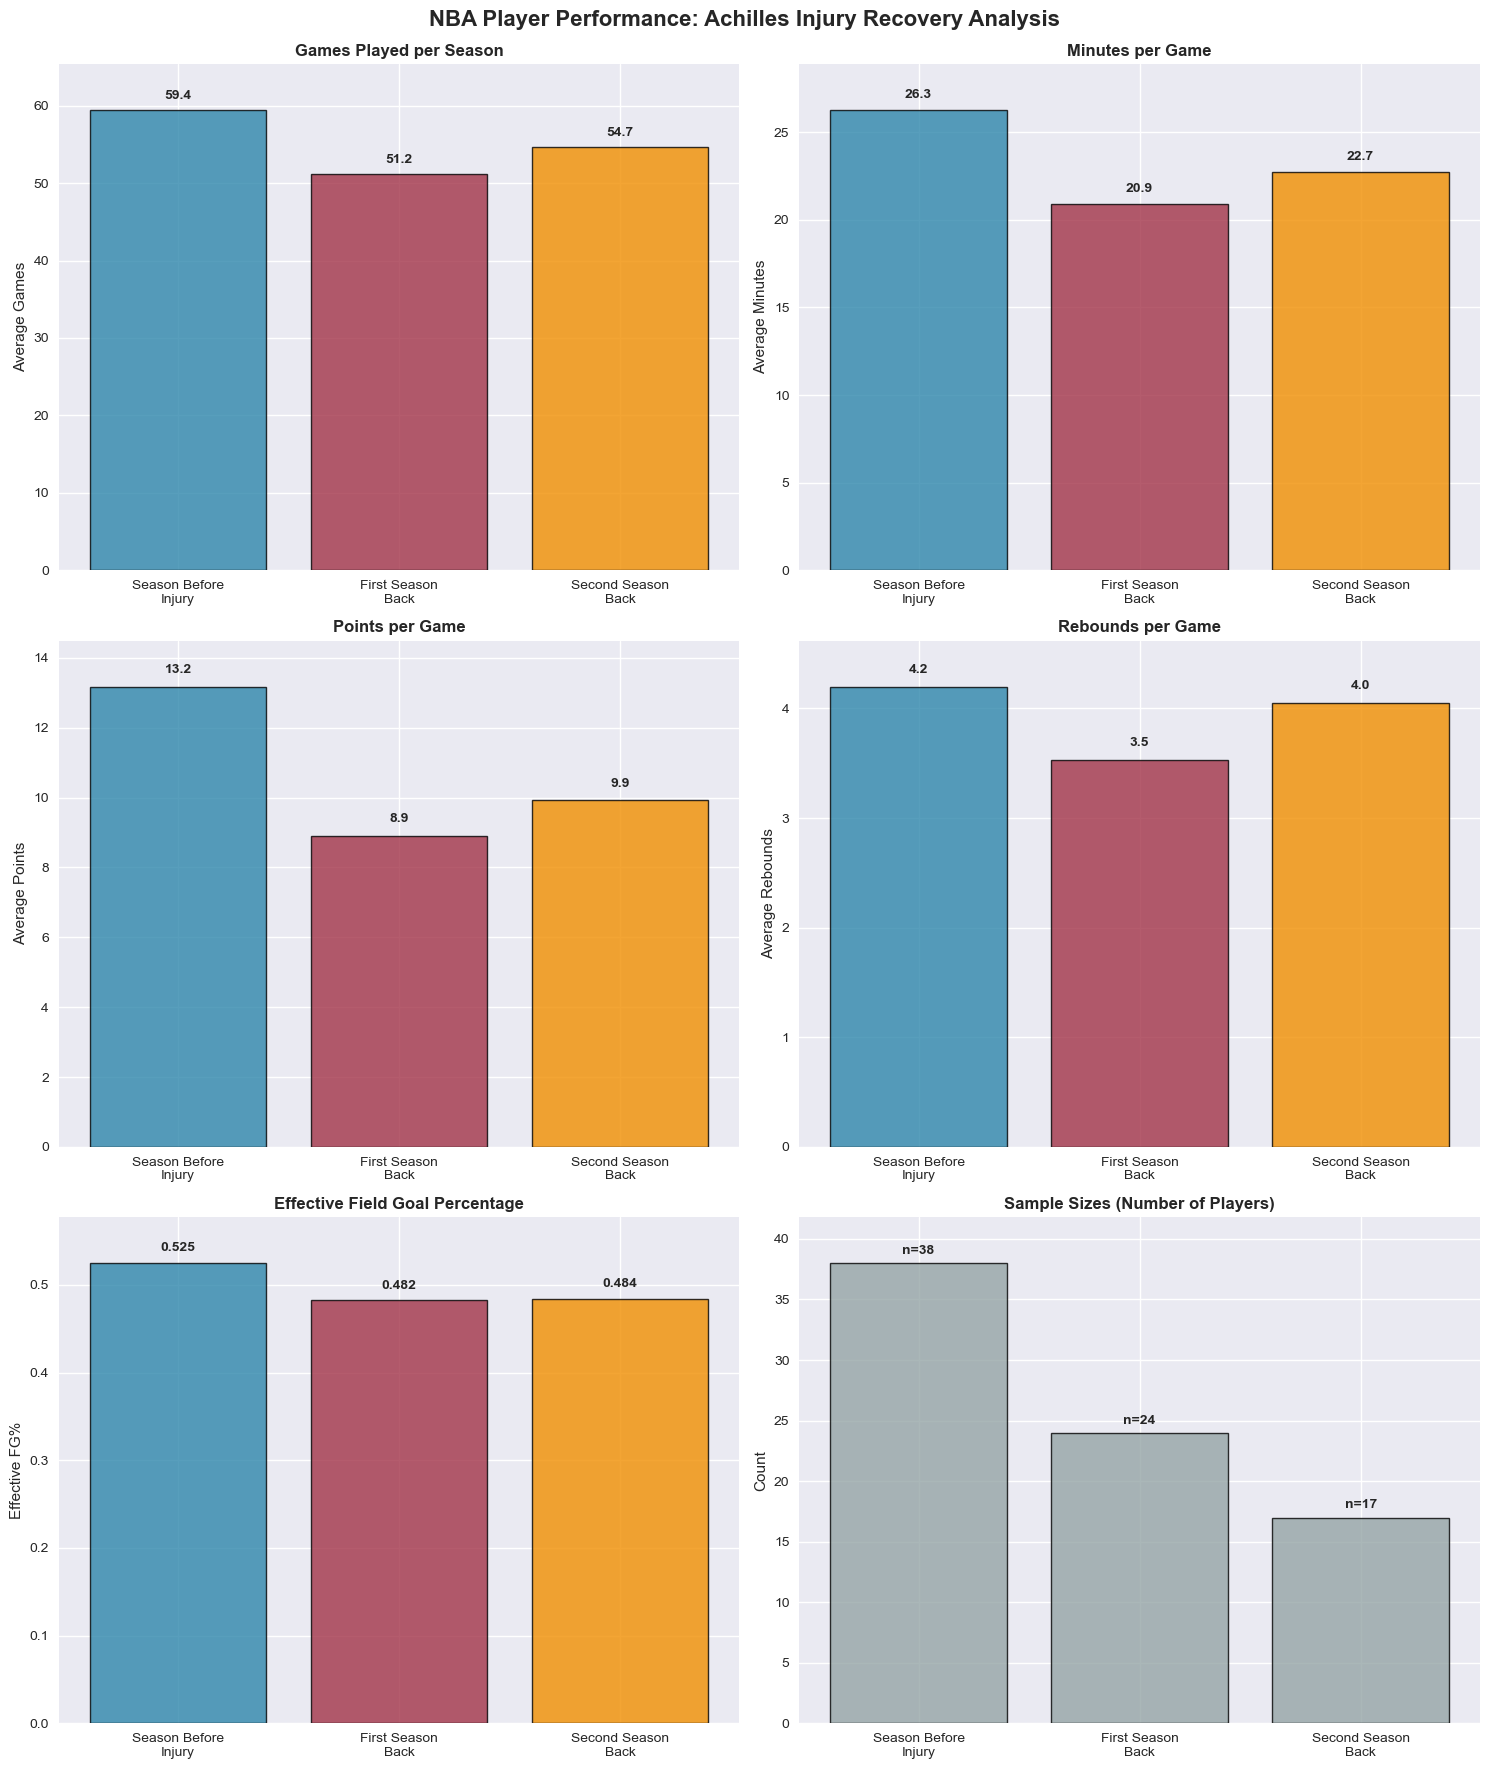


ACHILLES INJURY RECOVERY ANALYSIS

Mean Performance Metrics:
------------------------------
prev_g         59.421053
first_g        51.208333
second_g       54.705882
prev_mpg       26.259606
first_mpg      20.905898
second_mpg     22.710481
prev_rpg        4.199038
first_rpg       3.530646
second_rpg      4.049259
prev_efg%       0.524684
first_efg%      0.482292
second_efg%     0.483824
prev_ppg       13.176473
first_ppg       8.908019
second_ppg      9.918245
dtype: float64

Sample Sizes:
Season before injury: n = 38
First season back: n = 24
Second season back: n = 17


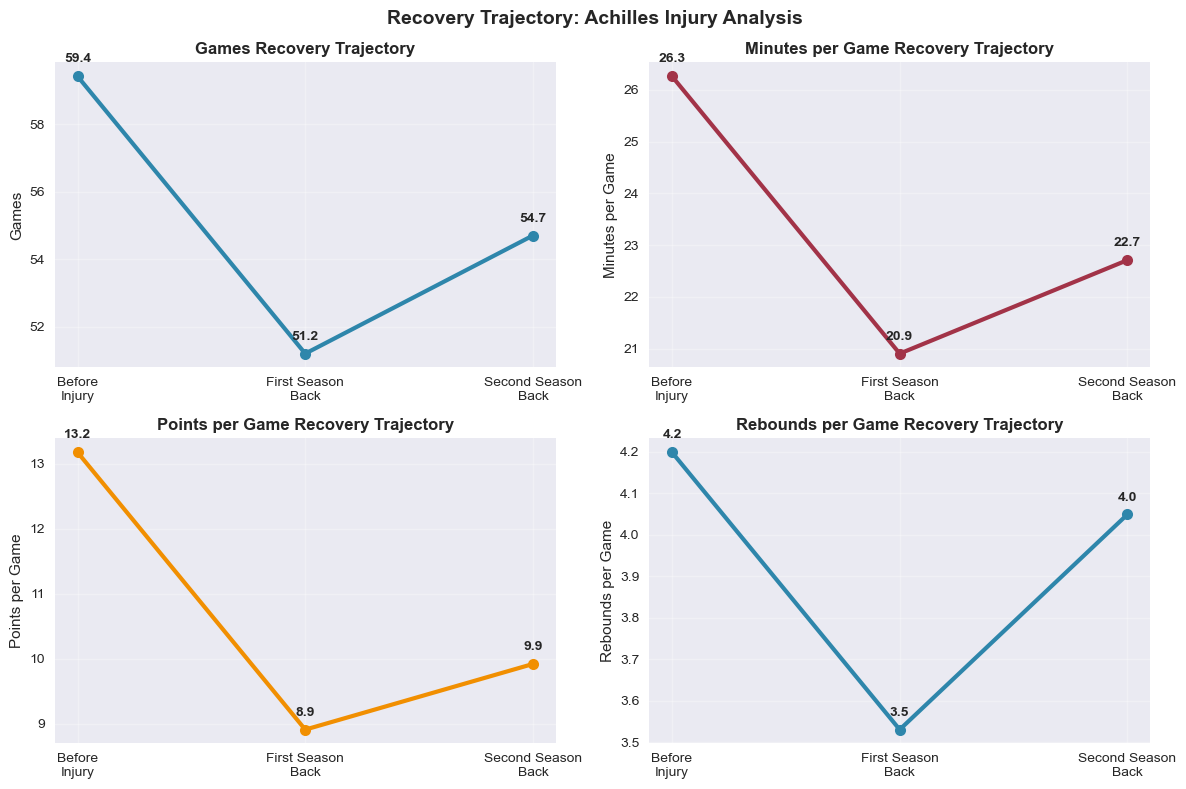

In [196]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Your existing code for data preparation
final_df_achilles = final_df[final_df["reason"] == "torn achilles"].copy()
final_df_achilles["prev_rpg"] = final_df_achilles["prev_trb"] / final_df_achilles["prev_g"]
final_df_achilles["first_rpg"] = final_df_achilles["first_trb"] / final_df_achilles["first_g"]
final_df_achilles["second_rpg"] = final_df_achilles["second_trb"] / final_df_achilles["second_g"]
final_df_achilles["prev_mpg"] = final_df_achilles["prev_mp"] / final_df_achilles["prev_g"]
final_df_achilles["first_mpg"] = final_df_achilles["first_mp"] / final_df_achilles["first_g"]
final_df_achilles["second_mpg"] = final_df_achilles["second_mp"] / final_df_achilles["second_g"]
final_df_achilles["prev_ppg"] = final_df_achilles["prev_pts"] / final_df_achilles["prev_g"]
final_df_achilles["first_ppg"] = final_df_achilles["first_pts"] / final_df_achilles["first_g"]
final_df_achilles["second_ppg"] = final_df_achilles["second_pts"] / final_df_achilles["second_g"]

# Calculate means for visualization
metrics_data = {
    'Games': [
        final_df_achilles["prev_g"].mean(),
        final_df_achilles["first_g"].mean(),
        final_df_achilles["second_g"].mean()
    ],
    'Minutes per Game': [
        final_df_achilles["prev_mpg"].mean(),
        final_df_achilles["first_mpg"].mean(),
        final_df_achilles["second_mpg"].mean()
    ],
    'Rebounds per Game': [
        final_df_achilles["prev_rpg"].mean(),
        final_df_achilles["first_rpg"].mean(),
        final_df_achilles["second_rpg"].mean()
    ],
    'Effective FG%': [
        final_df_achilles["prev_efg%"].mean(),
        final_df_achilles["first_efg%"].mean(),
        final_df_achilles["second_efg%"].mean()
    ],
    'Points per Game': [
        final_df_achilles["prev_ppg"].mean(),
        final_df_achilles["first_ppg"].mean(),
        final_df_achilles["second_ppg"].mean()
    ]
}

# Sample counts
prev_count = final_df_achilles["prev_g"].count()
first_count = final_df_achilles["first_g"].count()
second_count = final_df_achilles["second_g"].count()

time_periods = ['Season Before\nInjury', 'First Season\nBack', 'Second Season\nBack']
sample_sizes = [prev_count, first_count, second_count]

# Create comprehensive visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('NBA Player Performance: Achilles Injury Recovery Analysis', 
             fontsize=16, fontweight='bold', y=0.98)

# Define colors for consistency
colors = ['#2E86AB', '#A23348', '#F18F01']

# 1. Games Played
ax = axes[0, 0]
bars = ax.bar(time_periods, metrics_data['Games'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Games Played per Season', fontweight='bold')
ax.set_ylabel('Average Games')
ax.set_ylim(0, max(metrics_data['Games']) * 1.1)
# Add value labels on bars
for bar, value in zip(bars, metrics_data['Games']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Minutes per Game
ax = axes[0, 1]
bars = ax.bar(time_periods, metrics_data['Minutes per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Minutes per Game', fontweight='bold')
ax.set_ylabel('Average Minutes')
ax.set_ylim(0, max(metrics_data['Minutes per Game']) * 1.1)
for bar, value in zip(bars, metrics_data['Minutes per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Points per Game
ax = axes[1, 0]
bars = ax.bar(time_periods, metrics_data['Points per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Points per Game', fontweight='bold')
ax.set_ylabel('Average Points')
ax.set_ylim(0, max(metrics_data['Points per Game']) * 1.1)
for bar, value in zip(bars, metrics_data['Points per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. Rebounds per Game
ax = axes[1, 1]
bars = ax.bar(time_periods, metrics_data['Rebounds per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Rebounds per Game', fontweight='bold')
ax.set_ylabel('Average Rebounds')
ax.set_ylim(0, max(metrics_data['Rebounds per Game']) * 1.1)
for bar, value in zip(bars, metrics_data['Rebounds per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 5. Effective FG%
ax = axes[2, 0]
bars = ax.bar(time_periods, metrics_data['Effective FG%'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Effective Field Goal Percentage', fontweight='bold')
ax.set_ylabel('Effective FG%')
ax.set_ylim(0, max(metrics_data['Effective FG%']) * 1.1)
for bar, value in zip(bars, metrics_data['Effective FG%']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 6. Sample Sizes
ax = axes[2, 1]
bars = ax.bar(time_periods, sample_sizes, color=['#95A5A6', '#95A5A6', '#95A5A6'], 
              alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Sample Sizes (Number of Players)', fontweight='bold')
ax.set_ylabel('Count')
ax.set_ylim(0, max(sample_sizes) * 1.1)
for bar, value in zip(bars, sample_sizes):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'n={value}', ha='center', va='bottom', fontweight='bold')

# Improve layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# Show the plot
plt.show()

# Print summary statistics (your original output)
print("\n" + "="*60)
print("ACHILLES INJURY RECOVERY ANALYSIS")
print("="*60)
print("\nMean Performance Metrics:")
print("-" * 30)

summary_stats = final_df_achilles[["prev_g", "first_g", "second_g",
    "prev_mpg", "first_mpg", "second_mpg",
    "prev_rpg","first_rpg", "second_rpg",
    "prev_efg%", "first_efg%", "second_efg%",
    "prev_ppg", "first_ppg", "second_ppg"]].mean()

print(summary_stats)

print(f"\nSample Sizes:")
print(f"Season before injury: n = {prev_count}")
print(f"First season back: n = {first_count}")
print(f"Second season back: n = {second_count}")
print("="*60)

# Optional: Create a line plot showing recovery trajectory
plt.figure(figsize=(12, 8))

metrics_for_line = ['Games', 'Minutes per Game', 'Points per Game', 'Rebounds per Game']
x_pos = [0, 1, 2]

for i, metric in enumerate(metrics_for_line):
    plt.subplot(2, 2, i+1)
    plt.plot(x_pos, metrics_data[metric], marker='o', linewidth=3, markersize=8, 
             color=colors[i % len(colors)])
    plt.title(f'{metric} Recovery Trajectory', fontweight='bold')
    plt.xticks(x_pos, ['Before\nInjury', 'First Season\nBack', 'Second Season\nBack'])
    plt.ylabel(metric)
    plt.grid(True, alpha=0.3)
    
    # Add value labels
    for j, value in enumerate(metrics_data[metric]):
        plt.annotate(f'{value:.1f}', (x_pos[j], value), 
                    textcoords="offset points", xytext=(0,10), ha='center',
                    fontweight='bold')

plt.suptitle('Recovery Trajectory: Achilles Injury Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

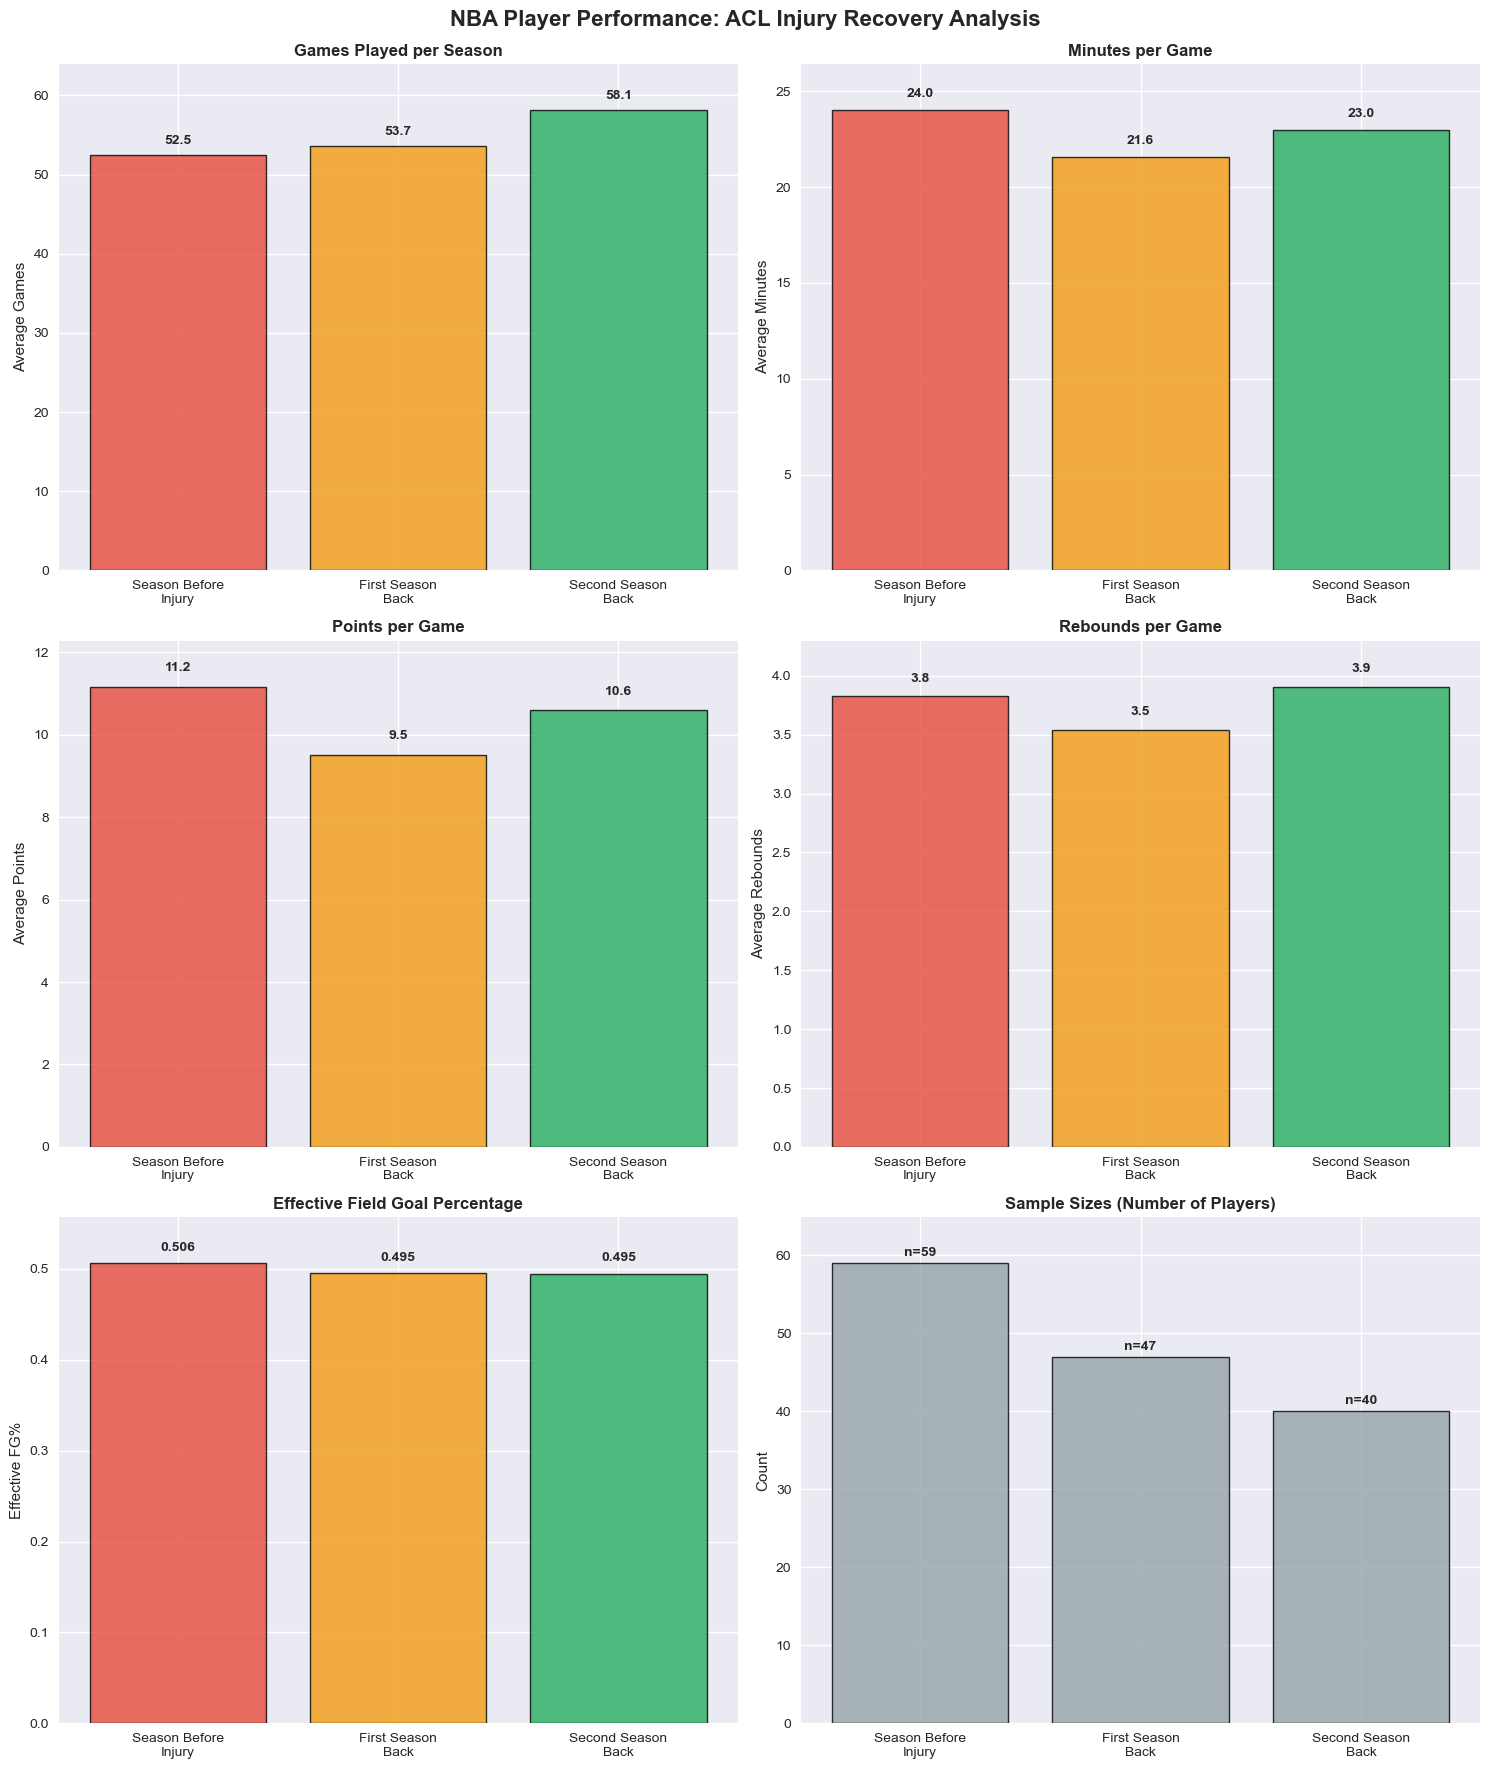

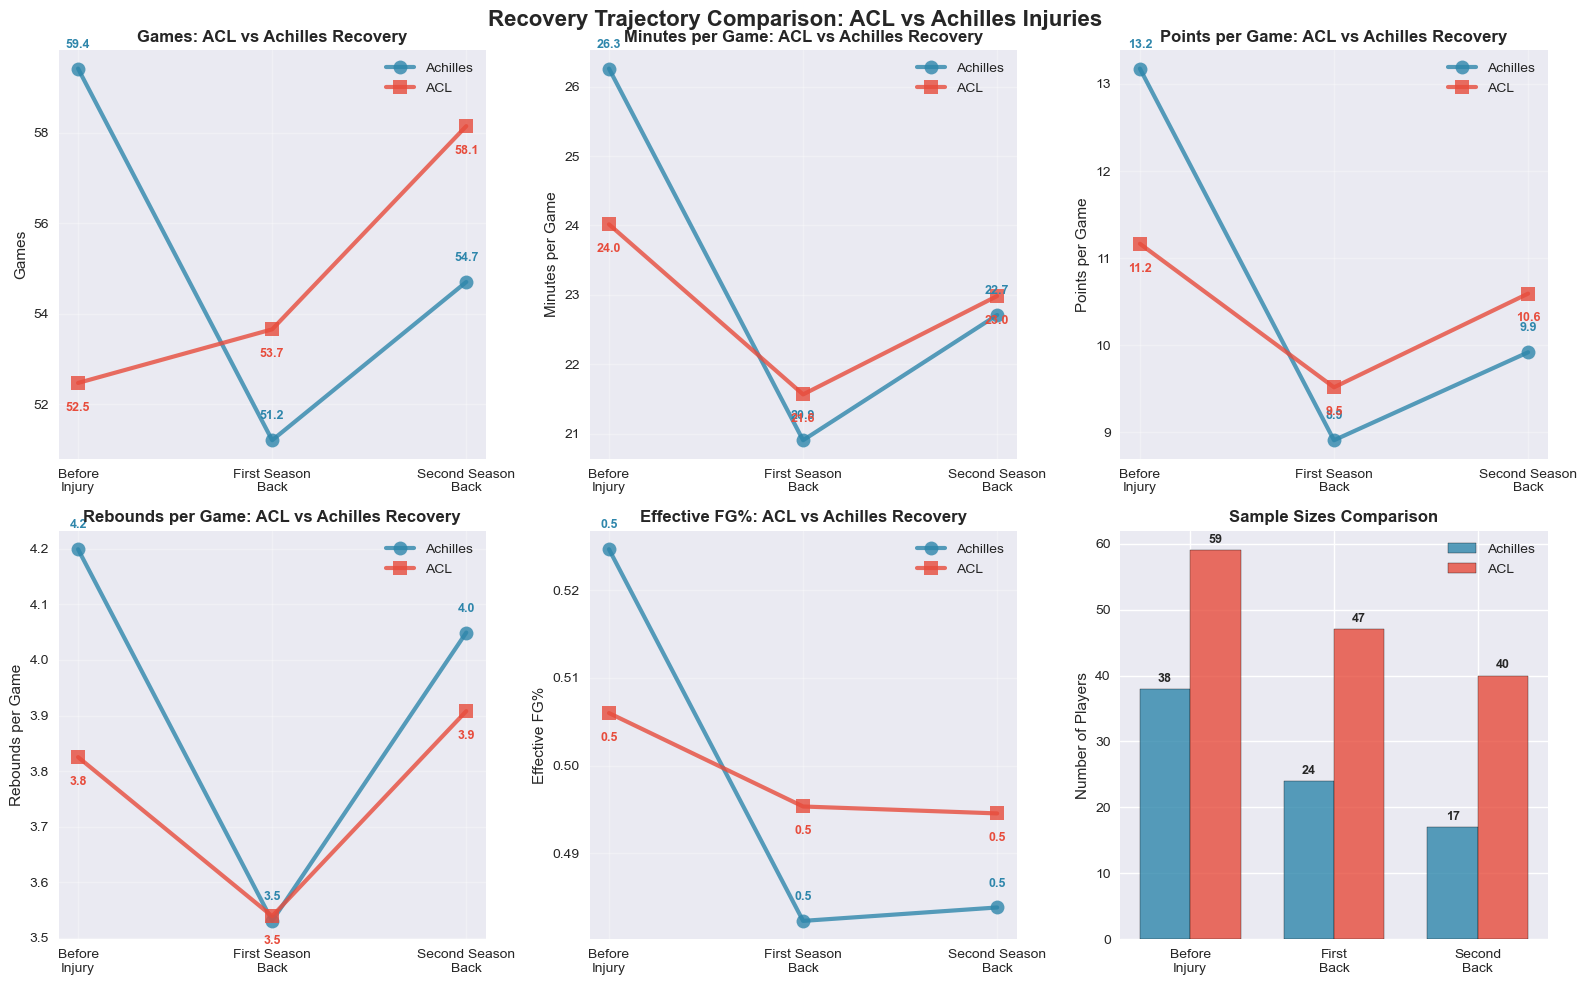


INJURY RECOVERY COMPARISON ANALYSIS

ACHILLES INJURY - Mean Performance Metrics:
--------------------------------------------------
prev_g         59.421053
first_g        51.208333
second_g       54.705882
prev_mpg       26.259606
first_mpg      20.905898
second_mpg     22.710481
prev_rpg        4.199038
first_rpg       3.530646
second_rpg      4.049259
prev_efg%       0.524684
first_efg%      0.482292
second_efg%     0.483824
prev_ppg       13.176473
first_ppg       8.908019
second_ppg      9.918245
dtype: float64

Achilles Sample Sizes:
Season before injury: n = 38
First season back: n = 24
Second season back: n = 17

--------------------------------------------------------------------------------

ACL INJURY - Mean Performance Metrics:
--------------------------------------------------
prev_g         52.474576
first_g        53.659574
second_g       58.150000
prev_mpg       24.016204
first_mpg      21.566058
second_mpg     22.983586
prev_rpg        3.825205
first_rpg       3.53911

In [197]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Data preparation for both injury types
# Achilles data
final_df_achilles = final_df[final_df["reason"] == "torn achilles"].copy()
final_df_achilles["prev_rpg"] = final_df_achilles["prev_trb"] / final_df_achilles["prev_g"]
final_df_achilles["first_rpg"] = final_df_achilles["first_trb"] / final_df_achilles["first_g"]
final_df_achilles["second_rpg"] = final_df_achilles["second_trb"] / final_df_achilles["second_g"]
final_df_achilles["prev_mpg"] = final_df_achilles["prev_mp"] / final_df_achilles["prev_g"]
final_df_achilles["first_mpg"] = final_df_achilles["first_mp"] / final_df_achilles["first_g"]
final_df_achilles["second_mpg"] = final_df_achilles["second_mp"] / final_df_achilles["second_g"]
final_df_achilles["prev_ppg"] = final_df_achilles["prev_pts"] / final_df_achilles["prev_g"]
final_df_achilles["first_ppg"] = final_df_achilles["first_pts"] / final_df_achilles["first_g"]
final_df_achilles["second_ppg"] = final_df_achilles["second_pts"] / final_df_achilles["second_g"]

# ACL data
final_df_acl = final_df[final_df["reason"] == "torn acl"].copy()
final_df_acl["prev_rpg"] = final_df_acl["prev_trb"] / final_df_acl["prev_g"]
final_df_acl["first_rpg"] = final_df_acl["first_trb"] / final_df_acl["first_g"]
final_df_acl["second_rpg"] = final_df_acl["second_trb"] / final_df_acl["second_g"]
final_df_acl["prev_mpg"] = final_df_acl["prev_mp"] / final_df_acl["prev_g"]
final_df_acl["first_mpg"] = final_df_acl["first_mp"] / final_df_acl["first_g"]
final_df_acl["second_mpg"] = final_df_acl["second_mp"] / final_df_acl["second_g"]
final_df_acl["prev_ppg"] = final_df_acl["prev_pts"] / final_df_acl["prev_g"]
final_df_acl["first_ppg"] = final_df_acl["first_pts"] / final_df_acl["first_g"]
final_df_acl["second_ppg"] = final_df_acl["second_pts"] / final_df_acl["second_g"]

# Calculate means for both injury types
achilles_metrics = {
    'Games': [
        final_df_achilles["prev_g"].mean(),
        final_df_achilles["first_g"].mean(),
        final_df_achilles["second_g"].mean()
    ],
    'Minutes per Game': [
        final_df_achilles["prev_mpg"].mean(),
        final_df_achilles["first_mpg"].mean(),
        final_df_achilles["second_mpg"].mean()
    ],
    'Rebounds per Game': [
        final_df_achilles["prev_rpg"].mean(),
        final_df_achilles["first_rpg"].mean(),
        final_df_achilles["second_rpg"].mean()
    ],
    'Effective FG%': [
        final_df_achilles["prev_efg%"].mean(),
        final_df_achilles["first_efg%"].mean(),
        final_df_achilles["second_efg%"].mean()
    ],
    'Points per Game': [
        final_df_achilles["prev_ppg"].mean(),
        final_df_achilles["first_ppg"].mean(),
        final_df_achilles["second_ppg"].mean()
    ]
}

acl_metrics = {
    'Games': [
        final_df_acl["prev_g"].mean(),
        final_df_acl["first_g"].mean(),
        final_df_acl["second_g"].mean()
    ],
    'Minutes per Game': [
        final_df_acl["prev_mpg"].mean(),
        final_df_acl["first_mpg"].mean(),
        final_df_acl["second_mpg"].mean()
    ],
    'Rebounds per Game': [
        final_df_acl["prev_rpg"].mean(),
        final_df_acl["first_rpg"].mean(),
        final_df_acl["second_rpg"].mean()
    ],
    'Effective FG%': [
        final_df_acl["prev_efg%"].mean(),
        final_df_acl["first_efg%"].mean(),
        final_df_acl["second_efg%"].mean()
    ],
    'Points per Game': [
        final_df_acl["prev_ppg"].mean(),
        final_df_acl["first_ppg"].mean(),
        final_df_acl["second_ppg"].mean()
    ]
}

# Sample counts
achilles_counts = [
    final_df_achilles["prev_g"].count(),
    final_df_achilles["first_g"].count(),
    final_df_achilles["second_g"].count()
]

acl_counts = [
    final_df_acl["prev_g"].count(),
    final_df_acl["first_g"].count(),
    final_df_acl["second_g"].count()
]

time_periods = ['Season Before\nInjury', 'First Season\nBack', 'Second Season\nBack']

# Create ACL-specific bar chart visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('NBA Player Performance: ACL Injury Recovery Analysis', 
             fontsize=16, fontweight='bold', y=0.98)

# Define colors for ACL analysis
colors = ['#E74C3C', '#F39C12', '#27AE60']

# 1. Games Played
ax = axes[0, 0]
bars = ax.bar(time_periods, acl_metrics['Games'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Games Played per Season', fontweight='bold')
ax.set_ylabel('Average Games')
ax.set_ylim(0, max(acl_metrics['Games']) * 1.1)
for bar, value in zip(bars, acl_metrics['Games']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Minutes per Game
ax = axes[0, 1]
bars = ax.bar(time_periods, acl_metrics['Minutes per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Minutes per Game', fontweight='bold')
ax.set_ylabel('Average Minutes')
ax.set_ylim(0, max(acl_metrics['Minutes per Game']) * 1.1)
for bar, value in zip(bars, acl_metrics['Minutes per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Points per Game
ax = axes[1, 0]
bars = ax.bar(time_periods, acl_metrics['Points per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Points per Game', fontweight='bold')
ax.set_ylabel('Average Points')
ax.set_ylim(0, max(acl_metrics['Points per Game']) * 1.1)
for bar, value in zip(bars, acl_metrics['Points per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. Rebounds per Game
ax = axes[1, 1]
bars = ax.bar(time_periods, acl_metrics['Rebounds per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Rebounds per Game', fontweight='bold')
ax.set_ylabel('Average Rebounds')
ax.set_ylim(0, max(acl_metrics['Rebounds per Game']) * 1.1)
for bar, value in zip(bars, acl_metrics['Rebounds per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 5. Effective FG%
ax = axes[2, 0]
bars = ax.bar(time_periods, acl_metrics['Effective FG%'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Effective Field Goal Percentage', fontweight='bold')
ax.set_ylabel('Effective FG%')
ax.set_ylim(0, max(acl_metrics['Effective FG%']) * 1.1)
for bar, value in zip(bars, acl_metrics['Effective FG%']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 6. Sample Sizes
ax = axes[2, 1]
bars = ax.bar(time_periods, acl_counts, color=['#95A5A6', '#95A5A6', '#95A5A6'], 
              alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Sample Sizes (Number of Players)', fontweight='bold')
ax.set_ylabel('Count')
ax.set_ylim(0, max(acl_counts) * 1.1)
for bar, value in zip(bars, acl_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'n={value}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# COMPARISON: Create line plots comparing ACL vs Achilles recovery trajectories
plt.figure(figsize=(16, 10))

metrics_for_comparison = ['Games', 'Minutes per Game', 'Points per Game', 'Rebounds per Game', 'Effective FG%']
x_pos = [0, 1, 2]
x_labels = ['Before\nInjury', 'First Season\nBack', 'Second Season\nBack']

for i, metric in enumerate(metrics_for_comparison):
    plt.subplot(2, 3, i+1)
    
    # Plot both injury types
    plt.plot(x_pos, achilles_metrics[metric], marker='o', linewidth=3, markersize=10, 
             color='#2E86AB', label='Achilles', alpha=0.8)
    plt.plot(x_pos, acl_metrics[metric], marker='s', linewidth=3, markersize=10, 
             color='#E74C3C', label='ACL', alpha=0.8)
    
    plt.title(f'{metric}: ACL vs Achilles Recovery', fontweight='bold', fontsize=12)
    plt.xticks(x_pos, x_labels)
    plt.ylabel(metric)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # Add value labels for both lines
    for j, (achilles_val, acl_val) in enumerate(zip(achilles_metrics[metric], acl_metrics[metric])):
        # Achilles labels (above the line)
        plt.annotate(f'{achilles_val:.1f}', (x_pos[j], achilles_val), 
                    textcoords="offset points", xytext=(0,15), ha='center',
                    fontweight='bold', color='#2E86AB', fontsize=9)
        # ACL labels (below the line)
        plt.annotate(f'{acl_val:.1f}', (x_pos[j], acl_val), 
                    textcoords="offset points", xytext=(0,-20), ha='center',
                    fontweight='bold', color='#E74C3C', fontsize=9)

# Add a subplot for sample size comparison
plt.subplot(2, 3, 6)
x_pos_bar = np.arange(len(time_periods))
width = 0.35

bars1 = plt.bar(x_pos_bar - width/2, achilles_counts, width, label='Achilles', 
                color='#2E86AB', alpha=0.8, edgecolor='black')
bars2 = plt.bar(x_pos_bar + width/2, acl_counts, width, label='ACL', 
                color='#E74C3C', alpha=0.8, edgecolor='black')

plt.title('Sample Sizes Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Number of Players')
plt.xticks(x_pos_bar, ['Before\nInjury', 'First\nBack', 'Second\nBack'])
plt.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom',
                    fontweight='bold', fontsize=9)

plt.suptitle('Recovery Trajectory Comparison: ACL vs Achilles Injuries', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

# Print summary statistics for both injury types
print("\n" + "="*80)
print("INJURY RECOVERY COMPARISON ANALYSIS")
print("="*80)

print("\nACHILLES INJURY - Mean Performance Metrics:")
print("-" * 50)
achilles_summary = final_df_achilles[["prev_g", "first_g", "second_g",
    "prev_mpg", "first_mpg", "second_mpg",
    "prev_rpg","first_rpg", "second_rpg",
    "prev_efg%", "first_efg%", "second_efg%",
    "prev_ppg", "first_ppg", "second_ppg"]].mean()
print(achilles_summary)

print(f"\nAchilles Sample Sizes:")
print(f"Season before injury: n = {achilles_counts[0]}")
print(f"First season back: n = {achilles_counts[1]}")
print(f"Second season back: n = {achilles_counts[2]}")

print("\n" + "-"*80)
print("\nACL INJURY - Mean Performance Metrics:")
print("-" * 50)
acl_summary = final_df_acl[["prev_g", "first_g", "second_g",
    "prev_mpg", "first_mpg", "second_mpg",
    "prev_rpg","first_rpg", "second_rpg",
    "prev_efg%", "first_efg%", "second_efg%",
    "prev_ppg", "first_ppg", "second_ppg"]].mean()
print(acl_summary)

print(f"\nACL Sample Sizes:")
print(f"Season before injury: n = {acl_counts[0]}")
print(f"First season back: n = {acl_counts[1]}")
print(f"Second season back: n = {acl_counts[2]}")
print("="*80)

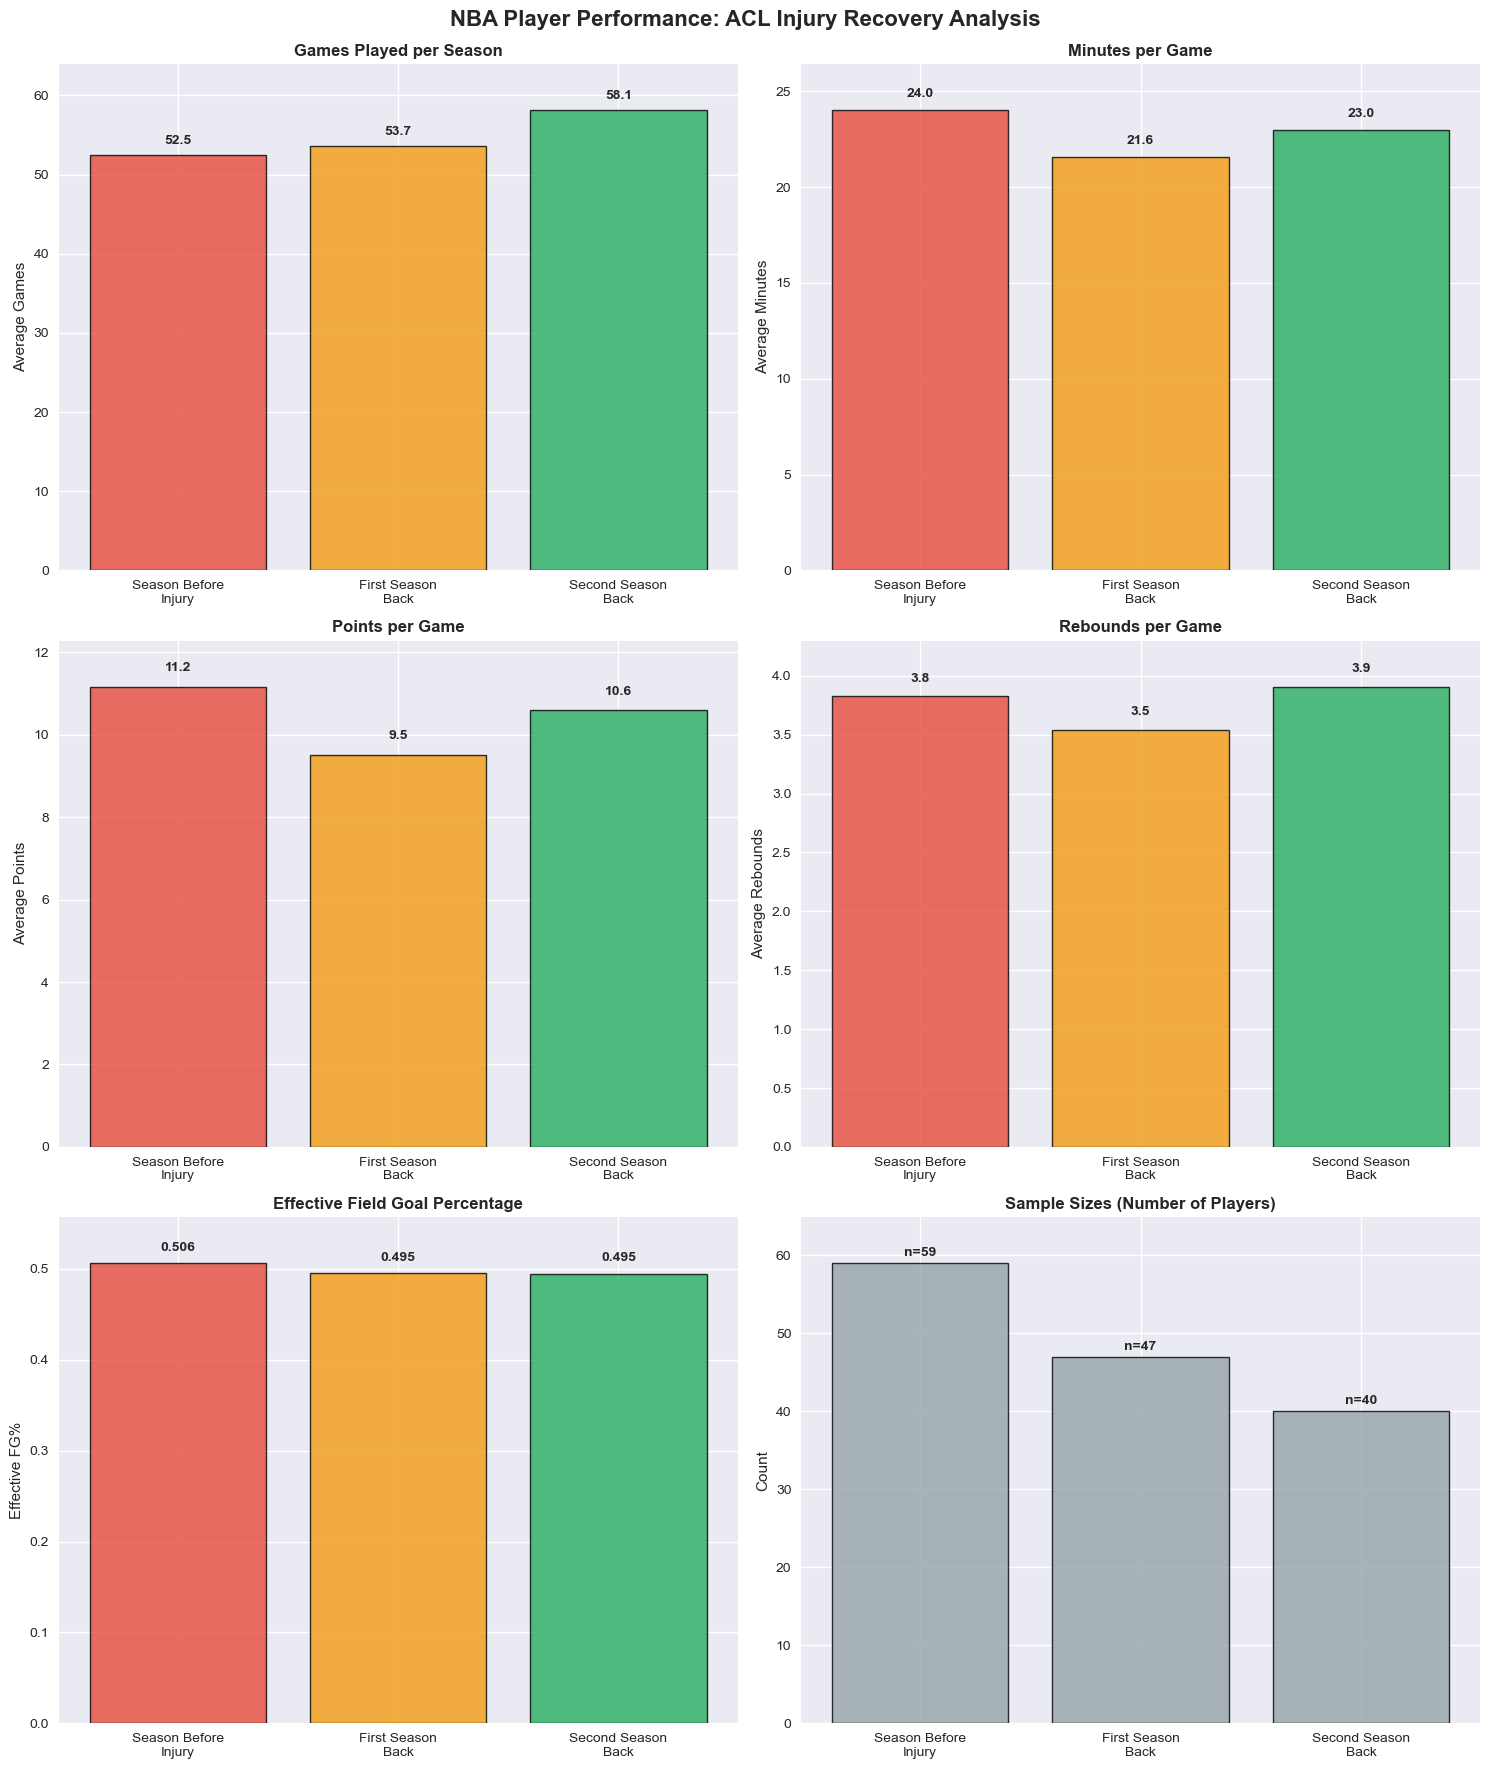

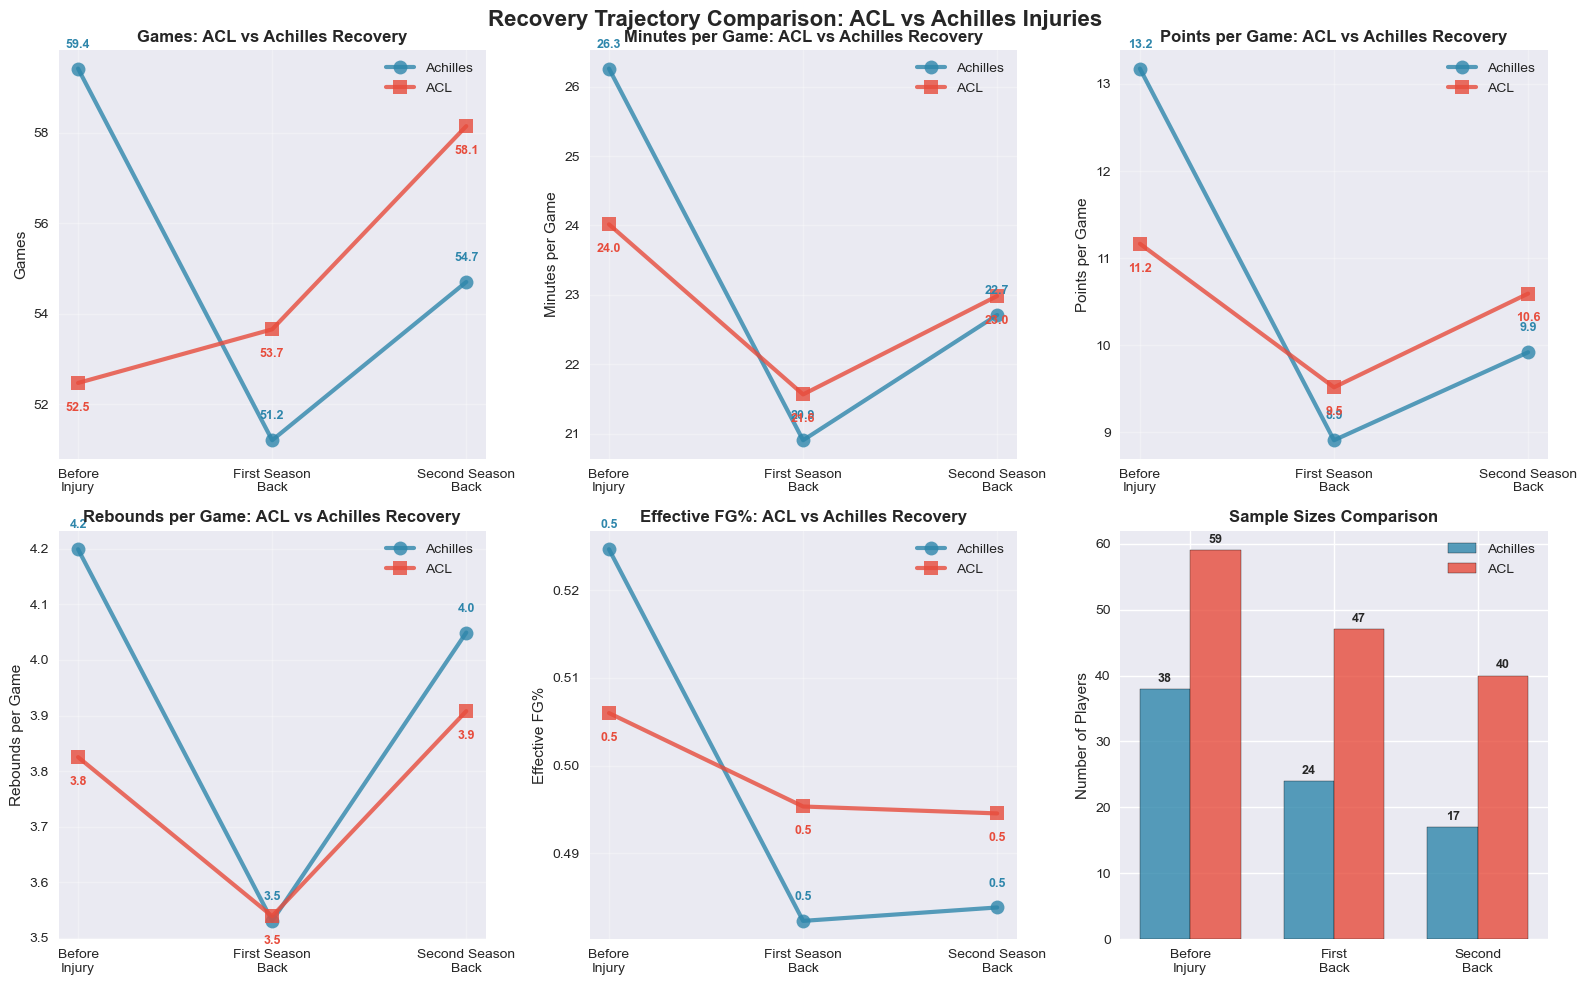


INJURY RECOVERY COMPARISON ANALYSIS

ACHILLES INJURY - Mean Performance Metrics:
--------------------------------------------------
prev_g         59.421053
first_g        51.208333
second_g       54.705882
prev_mpg       26.259606
first_mpg      20.905898
second_mpg     22.710481
prev_rpg        4.199038
first_rpg       3.530646
second_rpg      4.049259
prev_efg%       0.524684
first_efg%      0.482292
second_efg%     0.483824
prev_ppg       13.176473
first_ppg       8.908019
second_ppg      9.918245
dtype: float64

Achilles Sample Sizes:
Season before injury: n = 38
First season back: n = 24
Second season back: n = 17

--------------------------------------------------------------------------------

ACL INJURY - Mean Performance Metrics:
--------------------------------------------------
prev_g         52.474576
first_g        53.659574
second_g       58.150000
prev_mpg       24.016204
first_mpg      21.566058
second_mpg     22.983586
prev_rpg        3.825205
first_rpg       3.53911

In [197]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Data preparation for both injury types
# Achilles data
final_df_achilles = final_df[final_df["reason"] == "torn achilles"].copy()
final_df_achilles["prev_rpg"] = final_df_achilles["prev_trb"] / final_df_achilles["prev_g"]
final_df_achilles["first_rpg"] = final_df_achilles["first_trb"] / final_df_achilles["first_g"]
final_df_achilles["second_rpg"] = final_df_achilles["second_trb"] / final_df_achilles["second_g"]
final_df_achilles["prev_mpg"] = final_df_achilles["prev_mp"] / final_df_achilles["prev_g"]
final_df_achilles["first_mpg"] = final_df_achilles["first_mp"] / final_df_achilles["first_g"]
final_df_achilles["second_mpg"] = final_df_achilles["second_mp"] / final_df_achilles["second_g"]
final_df_achilles["prev_ppg"] = final_df_achilles["prev_pts"] / final_df_achilles["prev_g"]
final_df_achilles["first_ppg"] = final_df_achilles["first_pts"] / final_df_achilles["first_g"]
final_df_achilles["second_ppg"] = final_df_achilles["second_pts"] / final_df_achilles["second_g"]

# ACL data
final_df_acl = final_df[final_df["reason"] == "torn acl"].copy()
final_df_acl["prev_rpg"] = final_df_acl["prev_trb"] / final_df_acl["prev_g"]
final_df_acl["first_rpg"] = final_df_acl["first_trb"] / final_df_acl["first_g"]
final_df_acl["second_rpg"] = final_df_acl["second_trb"] / final_df_acl["second_g"]
final_df_acl["prev_mpg"] = final_df_acl["prev_mp"] / final_df_acl["prev_g"]
final_df_acl["first_mpg"] = final_df_acl["first_mp"] / final_df_acl["first_g"]
final_df_acl["second_mpg"] = final_df_acl["second_mp"] / final_df_acl["second_g"]
final_df_acl["prev_ppg"] = final_df_acl["prev_pts"] / final_df_acl["prev_g"]
final_df_acl["first_ppg"] = final_df_acl["first_pts"] / final_df_acl["first_g"]
final_df_acl["second_ppg"] = final_df_acl["second_pts"] / final_df_acl["second_g"]

# Calculate means for both injury types
achilles_metrics = {
    'Games': [
        final_df_achilles["prev_g"].mean(),
        final_df_achilles["first_g"].mean(),
        final_df_achilles["second_g"].mean()
    ],
    'Minutes per Game': [
        final_df_achilles["prev_mpg"].mean(),
        final_df_achilles["first_mpg"].mean(),
        final_df_achilles["second_mpg"].mean()
    ],
    'Rebounds per Game': [
        final_df_achilles["prev_rpg"].mean(),
        final_df_achilles["first_rpg"].mean(),
        final_df_achilles["second_rpg"].mean()
    ],
    'Effective FG%': [
        final_df_achilles["prev_efg%"].mean(),
        final_df_achilles["first_efg%"].mean(),
        final_df_achilles["second_efg%"].mean()
    ],
    'Points per Game': [
        final_df_achilles["prev_ppg"].mean(),
        final_df_achilles["first_ppg"].mean(),
        final_df_achilles["second_ppg"].mean()
    ]
}

acl_metrics = {
    'Games': [
        final_df_acl["prev_g"].mean(),
        final_df_acl["first_g"].mean(),
        final_df_acl["second_g"].mean()
    ],
    'Minutes per Game': [
        final_df_acl["prev_mpg"].mean(),
        final_df_acl["first_mpg"].mean(),
        final_df_acl["second_mpg"].mean()
    ],
    'Rebounds per Game': [
        final_df_acl["prev_rpg"].mean(),
        final_df_acl["first_rpg"].mean(),
        final_df_acl["second_rpg"].mean()
    ],
    'Effective FG%': [
        final_df_acl["prev_efg%"].mean(),
        final_df_acl["first_efg%"].mean(),
        final_df_acl["second_efg%"].mean()
    ],
    'Points per Game': [
        final_df_acl["prev_ppg"].mean(),
        final_df_acl["first_ppg"].mean(),
        final_df_acl["second_ppg"].mean()
    ]
}

# Sample counts
achilles_counts = [
    final_df_achilles["prev_g"].count(),
    final_df_achilles["first_g"].count(),
    final_df_achilles["second_g"].count()
]

acl_counts = [
    final_df_acl["prev_g"].count(),
    final_df_acl["first_g"].count(),
    final_df_acl["second_g"].count()
]

time_periods = ['Season Before\nInjury', 'First Season\nBack', 'Second Season\nBack']

# Create ACL-specific bar chart visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('NBA Player Performance: ACL Injury Recovery Analysis', 
             fontsize=16, fontweight='bold', y=0.98)

# Define colors for ACL analysis
colors = ['#E74C3C', '#F39C12', '#27AE60']

# 1. Games Played
ax = axes[0, 0]
bars = ax.bar(time_periods, acl_metrics['Games'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Games Played per Season', fontweight='bold')
ax.set_ylabel('Average Games')
ax.set_ylim(0, max(acl_metrics['Games']) * 1.1)
for bar, value in zip(bars, acl_metrics['Games']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Minutes per Game
ax = axes[0, 1]
bars = ax.bar(time_periods, acl_metrics['Minutes per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Minutes per Game', fontweight='bold')
ax.set_ylabel('Average Minutes')
ax.set_ylim(0, max(acl_metrics['Minutes per Game']) * 1.1)
for bar, value in zip(bars, acl_metrics['Minutes per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Points per Game
ax = axes[1, 0]
bars = ax.bar(time_periods, acl_metrics['Points per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Points per Game', fontweight='bold')
ax.set_ylabel('Average Points')
ax.set_ylim(0, max(acl_metrics['Points per Game']) * 1.1)
for bar, value in zip(bars, acl_metrics['Points per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. Rebounds per Game
ax = axes[1, 1]
bars = ax.bar(time_periods, acl_metrics['Rebounds per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Rebounds per Game', fontweight='bold')
ax.set_ylabel('Average Rebounds')
ax.set_ylim(0, max(acl_metrics['Rebounds per Game']) * 1.1)
for bar, value in zip(bars, acl_metrics['Rebounds per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 5. Effective FG%
ax = axes[2, 0]
bars = ax.bar(time_periods, acl_metrics['Effective FG%'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Effective Field Goal Percentage', fontweight='bold')
ax.set_ylabel('Effective FG%')
ax.set_ylim(0, max(acl_metrics['Effective FG%']) * 1.1)
for bar, value in zip(bars, acl_metrics['Effective FG%']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 6. Sample Sizes
ax = axes[2, 1]
bars = ax.bar(time_periods, acl_counts, color=['#95A5A6', '#95A5A6', '#95A5A6'], 
              alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Sample Sizes (Number of Players)', fontweight='bold')
ax.set_ylabel('Count')
ax.set_ylim(0, max(acl_counts) * 1.1)
for bar, value in zip(bars, acl_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'n={value}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# COMPARISON: Create line plots comparing ACL vs Achilles recovery trajectories
plt.figure(figsize=(16, 10))

metrics_for_comparison = ['Games', 'Minutes per Game', 'Points per Game', 'Rebounds per Game', 'Effective FG%']
x_pos = [0, 1, 2]
x_labels = ['Before\nInjury', 'First Season\nBack', 'Second Season\nBack']

for i, metric in enumerate(metrics_for_comparison):
    plt.subplot(2, 3, i+1)
    
    # Plot both injury types
    plt.plot(x_pos, achilles_metrics[metric], marker='o', linewidth=3, markersize=10, 
             color='#2E86AB', label='Achilles', alpha=0.8)
    plt.plot(x_pos, acl_metrics[metric], marker='s', linewidth=3, markersize=10, 
             color='#E74C3C', label='ACL', alpha=0.8)
    
    plt.title(f'{metric}: ACL vs Achilles Recovery', fontweight='bold', fontsize=12)
    plt.xticks(x_pos, x_labels)
    plt.ylabel(metric)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # Add value labels for both lines
    for j, (achilles_val, acl_val) in enumerate(zip(achilles_metrics[metric], acl_metrics[metric])):
        # Achilles labels (above the line)
        plt.annotate(f'{achilles_val:.1f}', (x_pos[j], achilles_val), 
                    textcoords="offset points", xytext=(0,15), ha='center',
                    fontweight='bold', color='#2E86AB', fontsize=9)
        # ACL labels (below the line)
        plt.annotate(f'{acl_val:.1f}', (x_pos[j], acl_val), 
                    textcoords="offset points", xytext=(0,-20), ha='center',
                    fontweight='bold', color='#E74C3C', fontsize=9)

# Add a subplot for sample size comparison
plt.subplot(2, 3, 6)
x_pos_bar = np.arange(len(time_periods))
width = 0.35

bars1 = plt.bar(x_pos_bar - width/2, achilles_counts, width, label='Achilles', 
                color='#2E86AB', alpha=0.8, edgecolor='black')
bars2 = plt.bar(x_pos_bar + width/2, acl_counts, width, label='ACL', 
                color='#E74C3C', alpha=0.8, edgecolor='black')

plt.title('Sample Sizes Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Number of Players')
plt.xticks(x_pos_bar, ['Before\nInjury', 'First\nBack', 'Second\nBack'])
plt.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom',
                    fontweight='bold', fontsize=9)

plt.suptitle('Recovery Trajectory Comparison: ACL vs Achilles Injuries', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

# Print summary statistics for both injury types
print("\n" + "="*80)
print("INJURY RECOVERY COMPARISON ANALYSIS")
print("="*80)

print("\nACHILLES INJURY - Mean Performance Metrics:")
print("-" * 50)
achilles_summary = final_df_achilles[["prev_g", "first_g", "second_g",
    "prev_mpg", "first_mpg", "second_mpg",
    "prev_rpg","first_rpg", "second_rpg",
    "prev_efg%", "first_efg%", "second_efg%",
    "prev_ppg", "first_ppg", "second_ppg"]].mean()
print(achilles_summary)

print(f"\nAchilles Sample Sizes:")
print(f"Season before injury: n = {achilles_counts[0]}")
print(f"First season back: n = {achilles_counts[1]}")
print(f"Second season back: n = {achilles_counts[2]}")

print("\n" + "-"*80)
print("\nACL INJURY - Mean Performance Metrics:")
print("-" * 50)
acl_summary = final_df_acl[["prev_g", "first_g", "second_g",
    "prev_mpg", "first_mpg", "second_mpg",
    "prev_rpg","first_rpg", "second_rpg",
    "prev_efg%", "first_efg%", "second_efg%",
    "prev_ppg", "first_ppg", "second_ppg"]].mean()
print(acl_summary)

print(f"\nACL Sample Sizes:")
print(f"Season before injury: n = {acl_counts[0]}")
print(f"First season back: n = {acl_counts[1]}")
print(f"Second season back: n = {acl_counts[2]}")
print("="*80)

In [208]:
final_df_achilles["ppg_recovery_ratio"] = final_df_achilles["second_ppg"] / final_df_achilles["prev_ppg"]
final_df_achilles[final_df_achilles["ppg_recovery_ratio"].notna() >= .9]


,player,reason,date,team,season,prev_season_x,prev_prev_season_x,next_season_x,next_next_season_x,age,...,prev_rpg,first_rpg,second_rpg,prev_mpg,first_mpg,second_mpg,prev_ppg,first_ppg,second_ppg,ppg_recovery_ratio
0,jonas jerebko,torn achilles,2010-10-06,Pistons,2010-11,2009-10,2008-09,2011-12,2012-13,23.0,...,5.975000,4.812500,3.775510,27.900000,22.937500,18.204082,9.262500,8.687500,7.693878,0.830648
11,darrell arthur,torn achilles,2011-12-20,Grizzlies,2011-12,2010-11,2009-10,2012-13,2013-14,23.0,...,4.275000,2.864407,3.088235,20.112500,16.440678,17.073529,9.112500,6.135593,5.897059,0.647140
30,zaza pachulia,torn achilles,2013-04-03,Hawks,2012-13,2011-12,2010-11,2013-14,2014-15,28.0,...,7.879310,6.283019,6.849315,28.275862,25.000000,23.698630,7.844828,7.698113,8.301370,1.058197
33,kobe bryant,torn achilles,2013-04-12,Lakers,2012-13,2011-12,2010-11,2013-14,2014-15,34.0,...,5.396552,5.685714,3.742424,38.482759,34.485714,28.227273,27.862069,22.342857,17.590909,0.631357
34,marvin williams,torn achilles,2013-05-31,Jazz,2012-13,2011-12,2010-11,2013-14,2014-15,26.0,...,5.157895,5.060606,4.948718,26.315789,25.363636,26.089744,10.157895,9.136364,7.397436,0.728245
42,anderson varejão,torn achilles,2014-12-26,Cavaliers,2014-15,2013-14,2012-13,2015-16,2016-17,32.0,...,9.676923,2.660377,2.935484,27.692308,9.358491,10.000000,8.400000,2.603774,2.580645,0.307220
45,brandon jennings,torn achilles,2015-01-24,Pistons,2014-15,2013-14,2012-13,2015-16,2016-17,25.0,...,3.050000,2.000000,2.000000,34.100000,18.083333,18.080000,15.512500,6.916667,7.000000,0.451249
46,wesley matthews,torn achilles,2015-03-06,Blazers,2014-15,2013-14,2012-13,2015-16,2016-17,28.0,...,3.524390,3.051282,3.547945,33.902439,33.897436,34.178082,16.378049,12.525641,13.506849,0.824692
54,rudy gay,torn achilles,2017-01-18,Kings,2016-17,2015-16,2014-15,2017-18,2018-19,30.0,...,6.514286,5.105263,6.811594,33.985714,21.596491,26.695652,17.200000,11.491228,13.710145,0.797101
65,john wall,torn achilles,2018-12-28,Wizards,2018-19,2017-18,2016-17,2019-20,2020-21,28.0,...,3.658537,3.225000,2.705882,34.390244,32.200000,22.205882,19.439024,20.575000,11.352941,0.584028



RECOVERY OUTLIERS: TORN ACHILLES

First Year Ppg Recovery:
----------------------------------------
Average recovery ratio: 0.77
Median recovery ratio: 0.76
Normal range: [-0.13, 1.60]
Total outliers: 1

Best recovery outliers:
         player  season  first_year_ppg_recovery  prev_ppg  first_ppg
elliot williams 2012-13                 1.644505  3.666667   6.029851

Worst recovery outliers:
         player  season  first_year_ppg_recovery  prev_ppg  first_ppg
elliot williams 2012-13                 1.644505  3.666667   6.029851

Second Year Ppg Recovery:
----------------------------------------
Average recovery ratio: 0.68
Median recovery ratio: 0.70
Normal range: [0.00, 1.32]
Total outliers: 0

First Year Mpg Recovery:
----------------------------------------
Average recovery ratio: 0.89
Median recovery ratio: 0.82
Normal range: [0.27, 1.37]
Total outliers: 1

Best recovery outliers:
         player  season  first_year_mpg_recovery
elliot williams 2012-13                 2.781529

Wo

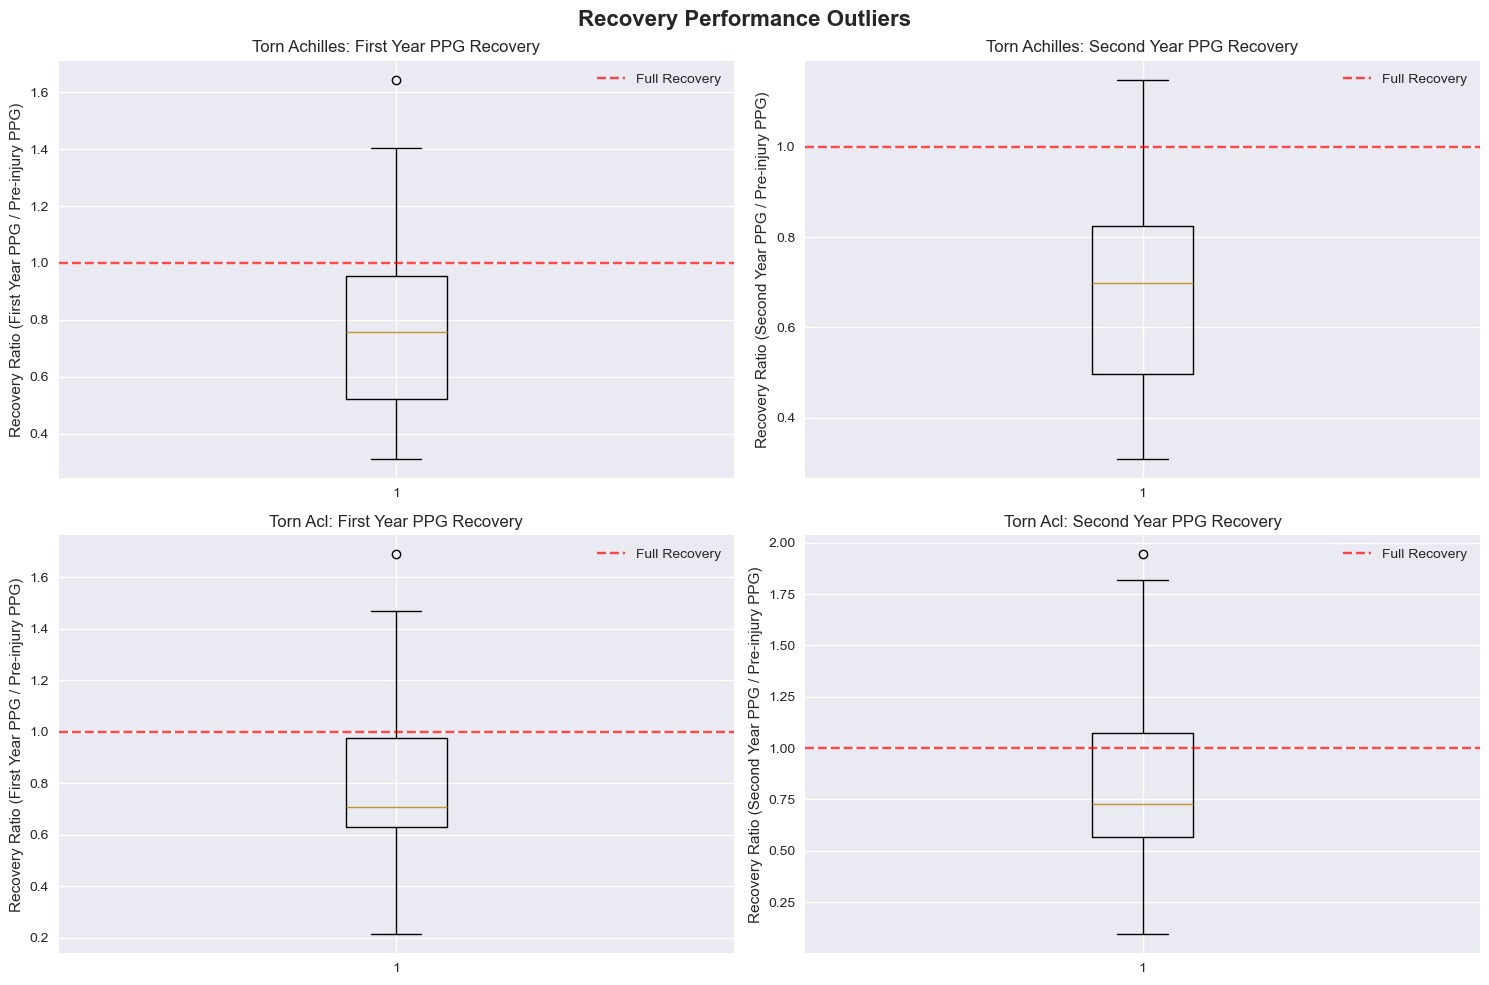


HOW TO INTERPRET RECOVERY RATIOS:

• 1.0 = Full recovery (same performance as before injury)
• > 1.0 = Better than pre-injury performance  
• < 1.0 = Worse than pre-injury performance

• Values > 1.5 or < 0.5 are usually outliers
• Look for players who either:
  - Recovered exceptionally well (ratio > 1.2)
  - Had poor recovery (ratio < 0.7)



In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create recovery metrics for both injury types
def create_recovery_metrics(df, injury_type):
    """Calculate simple recovery ratios"""
    injury_df = df[df["reason"] == injury_type].copy()
    
    # Calculate per-game stats
    injury_df["prev_ppg"] = injury_df["prev_pts"] / injury_df["prev_g"]
    injury_df["first_ppg"] = injury_df["first_pts"] / injury_df["first_g"]
    injury_df["second_ppg"] = injury_df["second_pts"] / injury_df["second_g"]
    
    injury_df["prev_mpg"] = injury_df["prev_mp"] / injury_df["prev_g"]
    injury_df["first_mpg"] = injury_df["first_mp"] / injury_df["first_g"]
    injury_df["second_mpg"] = injury_df["second_mp"] / injury_df["second_g"]
    
    # Calculate recovery ratios (how well they recovered compared to pre-injury)
    injury_df["first_year_ppg_recovery"] = injury_df["first_ppg"] / injury_df["prev_ppg"]
    injury_df["second_year_ppg_recovery"] = injury_df["second_ppg"] / injury_df["prev_ppg"]
    
    injury_df["first_year_mpg_recovery"] = injury_df["first_mpg"] / injury_df["prev_mpg"]
    injury_df["second_year_mpg_recovery"] = injury_df["second_mpg"] / injury_df["prev_mpg"]
    
    injury_df["first_year_efg_recovery"] = injury_df["first_efg%"] / injury_df["prev_efg%"]
    injury_df["second_year_efg_recovery"] = injury_df["second_efg%"] / injury_df["prev_efg%"]
    
    return injury_df

def find_recovery_outliers(df, recovery_column, method='iqr'):
    """Find outliers in recovery performance"""
    # Remove infinite and NaN values
    clean_data = df[df[recovery_column].notna() & np.isfinite(df[recovery_column])]
    
    if method == 'iqr':
        Q1 = clean_data[recovery_column].quantile(0.25)
        Q3 = clean_data[recovery_column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Outliers are outside 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = clean_data[(clean_data[recovery_column] < lower_bound) | 
                             (clean_data[recovery_column] > upper_bound)]
        
        return outliers, lower_bound, upper_bound
        
def analyze_recovery_outliers(injury_type):
    """Main analysis function"""
    print(f"\n{'='*60}")
    print(f"RECOVERY OUTLIERS: {injury_type.upper()}")
    print(f"{'='*60}")
    
    # Create recovery metrics
    injury_df = create_recovery_metrics(final_df, injury_type)
    
    recovery_metrics = [
        'first_year_ppg_recovery',
        'second_year_ppg_recovery', 
        'first_year_mpg_recovery',
        'second_year_mpg_recovery',
        'first_year_efg_recovery',
        'second_year_efg_recovery'
    ]
    
    for metric in recovery_metrics:
        if metric in injury_df.columns:
            print(f"\n{metric.replace('_', ' ').title()}:")
            print("-" * 40)
            
            outliers, lower_bound, upper_bound = find_recovery_outliers(injury_df, metric)
            
            # Basic stats
            clean_data = injury_df[injury_df[metric].notna() & np.isfinite(injury_df[metric])]
            mean_recovery = clean_data[metric].mean()
            median_recovery = clean_data[metric].median()
            
            print(f"Average recovery ratio: {mean_recovery:.2f}")
            print(f"Median recovery ratio: {median_recovery:.2f}")
            print(f"Normal range: [{lower_bound:.2f}, {upper_bound:.2f}]")
            print(f"Total outliers: {len(outliers)}")
            
            if len(outliers) > 0:
                # Show the most extreme cases
                best_recoveries = outliers.nlargest(5, metric)
                worst_recoveries = outliers.nsmallest(5, metric)
                
                if len(best_recoveries) > 0:
                    print(f"\nBest recovery outliers:")
                    display_cols = ['player', 'season', metric, 'prev_ppg', 'first_ppg'] if 'first_year_ppg' in metric else ['player', 'season', metric]
                    available_cols = [col for col in display_cols if col in best_recoveries.columns]
                    print(best_recoveries[available_cols].to_string(index=False))
                
                if len(worst_recoveries) > 0:
                    print(f"\nWorst recovery outliers:")
                    display_cols = ['player', 'season', metric, 'prev_ppg', 'first_ppg'] if 'first_year_ppg' in metric else ['player', 'season', metric]
                    available_cols = [col for col in display_cols if col in worst_recoveries.columns]
                    print(worst_recoveries[available_cols].to_string(index=False))

# Analyze both injury types
analyze_recovery_outliers("torn achilles")
analyze_recovery_outliers("torn acl")

# Create simple visualization of recovery outliers
def plot_recovery_outliers():
    """Simple visualization of recovery performance"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Recovery Performance Outliers', fontsize=16, fontweight='bold')
    
    injury_types = ["torn achilles", "torn acl"]
    colors = ['#2E86AB', '#E74C3C']
    
    for i, injury_type in enumerate(injury_types):
        injury_df = create_recovery_metrics(final_df, injury_type)
        
        # Points recovery - First year
        ax1 = axes[i, 0]
        clean_data = injury_df[injury_df['first_year_ppg_recovery'].notna() & 
                              np.isfinite(injury_df['first_year_ppg_recovery'])]
        
        if len(clean_data) > 0:
            ax1.boxplot(clean_data['first_year_ppg_recovery'])
            ax1.set_title(f'{injury_type.title()}: First Year PPG Recovery')
            ax1.set_ylabel('Recovery Ratio (First Year PPG / Pre-injury PPG)')
            ax1.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Full Recovery')
            ax1.legend()
        
        # Points recovery - Second year  
        ax2 = axes[i, 1]
        clean_data = injury_df[injury_df['second_year_ppg_recovery'].notna() & 
                              np.isfinite(injury_df['second_year_ppg_recovery'])]
        
        if len(clean_data) > 0:
            ax2.boxplot(clean_data['second_year_ppg_recovery'])
            ax2.set_title(f'{injury_type.title()}: Second Year PPG Recovery')
            ax2.set_ylabel('Recovery Ratio (Second Year PPG / Pre-injury PPG)')
            ax2.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Full Recovery')
            ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Create the visualization
plot_recovery_outliers()

# Summary of what to look for
print(f"\n{'='*60}")
print("HOW TO INTERPRET RECOVERY RATIOS:")
print(f"{'='*60}")
print("""
• 1.0 = Full recovery (same performance as before injury)
• > 1.0 = Better than pre-injury performance  
• < 1.0 = Worse than pre-injury performance

• Values > 1.5 or < 0.5 are usually outliers
• Look for players who either:
  - Recovered exceptionally well (ratio > 1.2)
  - Had poor recovery (ratio < 0.7)
""")


BEST RECOVERY PLAYERS: TORN ACHILLES

Top Recovery Players (Pre-injury → Second Season Back):

1. kevin durant (2019-20)
------------------------------------------------------------
PRE-INJURY:    26.0 PPG  |  34.6 MPG  |  6.4 RPG  |  0.571 EFG%
FIRST BACK:    26.9 PPG  |  33.1 MPG  |  7.1 RPG  |  0.608 EFG%
SECOND BACK:   29.9 PPG  |  37.2 MPG  |  7.4 RPG  |  0.570 EFG%
IMPROVEMENT:   +3.9 PPG 📈  |  +2.6 MPG 📈  |  +1.0 RPG 📈  |  -0.001 EFG% ➡️
Composite Score: 7.21

2. dwight powell (2019-20)
------------------------------------------------------------
PRE-INJURY:    10.6 PPG  |  21.6 MPG  |  5.3 RPG  |  0.637 EFG%
FIRST BACK:    5.9 PPG  |  16.7 MPG  |  4.0 RPG  |  0.631 EFG%
SECOND BACK:   8.7 PPG  |  21.9 MPG  |  4.9 RPG  |  0.687 EFG%
IMPROVEMENT:   -1.8 PPG 📉  |  +0.3 MPG 📈  |  -0.4 RPG ➡️  |  +0.050 EFG% 📈
Composite Score: -1.49

3. marvin williams (2012-13)
------------------------------------------------------------
PRE-INJURY:    10.2 PPG  |  26.3 MPG  |  5.2 RPG  |  0.494 E

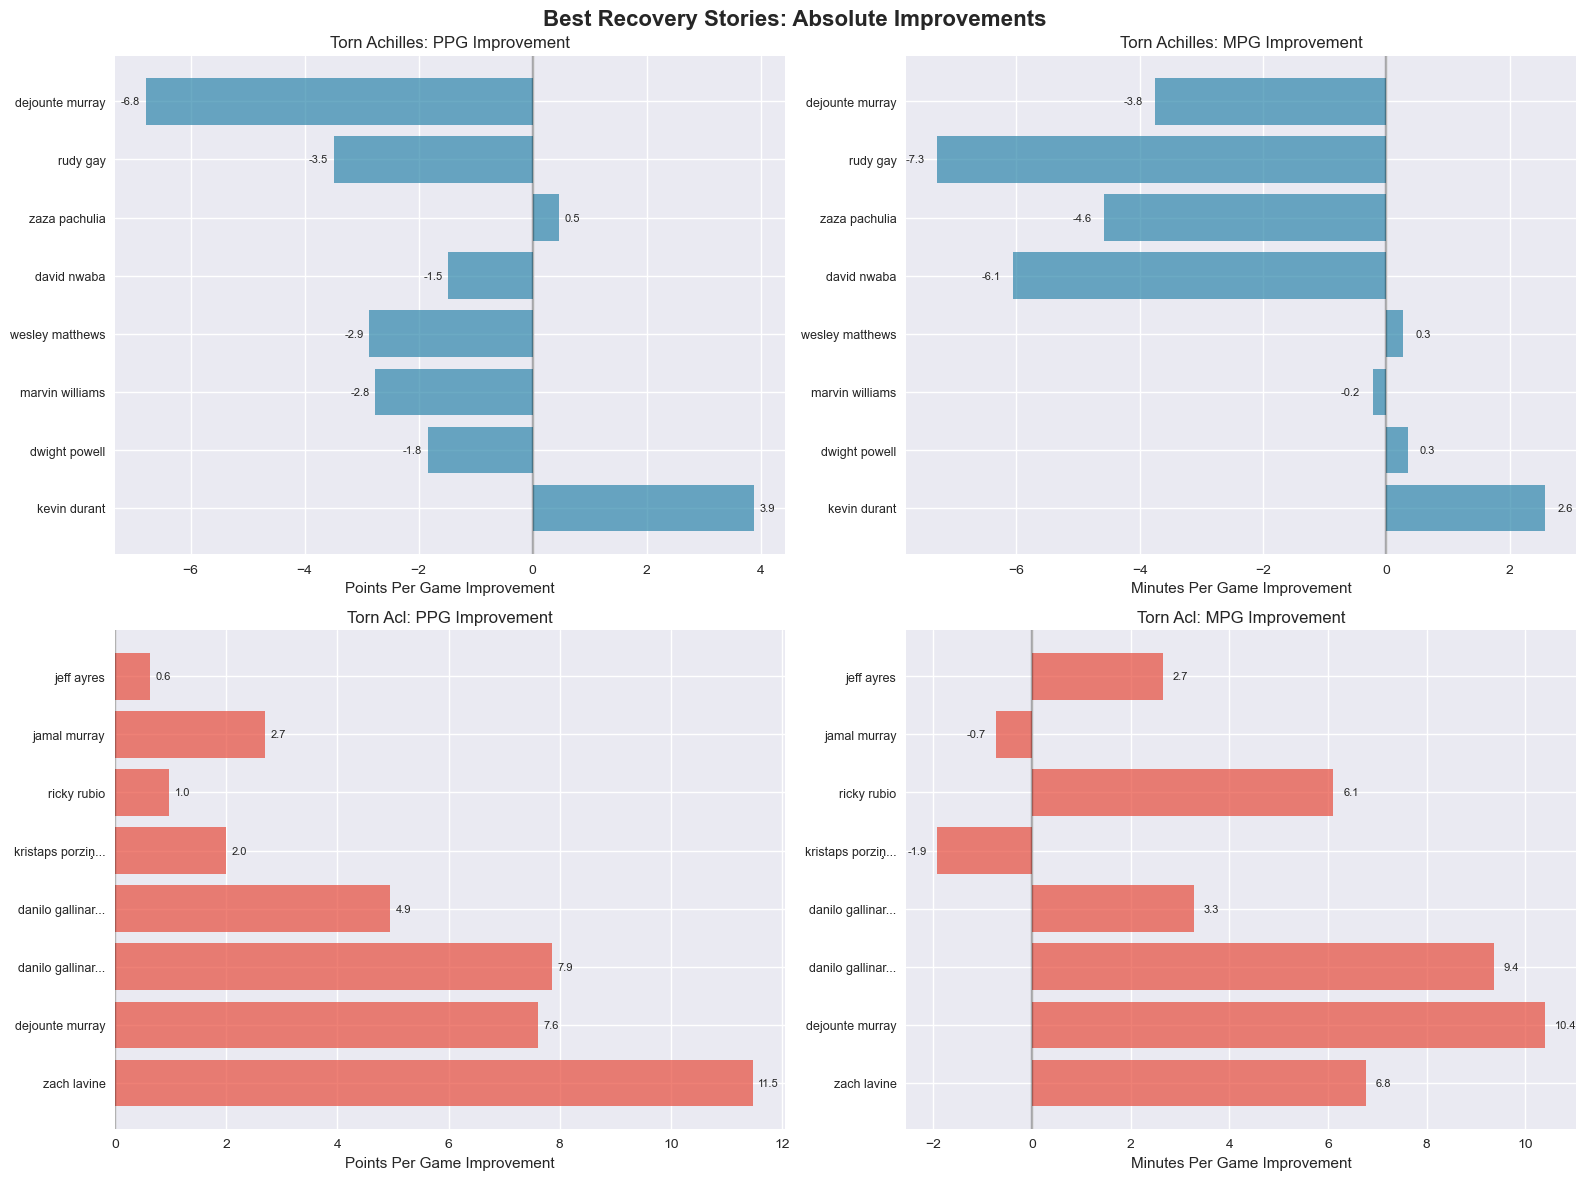


METHODOLOGY:

• Recovery = Second Season Back Performance - Pre-Injury Performance
• Composite Score weights improvements across all categories:
  - Points Per Game × 1.0
  - Minutes Per Game × 0.5  
  - Rebounds Per Game × 2.0
  - Effective FG% × 20.0

• 📈 = Significant improvement
• ➡️ = Roughly same performance  
• 📉 = Decline in performance

Focus on players with large absolute improvements rather than percentage gains.



In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_recovery_analysis(df, injury_type):
    """Calculate absolute improvements from pre-injury to second season"""
    injury_df = df[df["reason"] == injury_type].copy()
    
    # Calculate per-game stats
    injury_df["prev_ppg"] = injury_df["prev_pts"] / injury_df["prev_g"]
    injury_df["first_ppg"] = injury_df["first_pts"] / injury_df["first_g"]
    injury_df["second_ppg"] = injury_df["second_pts"] / injury_df["second_g"]
    
    injury_df["prev_mpg"] = injury_df["prev_mp"] / injury_df["prev_g"]
    injury_df["first_mpg"] = injury_df["first_mp"] / injury_df["first_g"]
    injury_df["second_mpg"] = injury_df["second_mp"] / injury_df["second_g"]
    
    injury_df["prev_rpg"] = injury_df["prev_trb"] / injury_df["prev_g"]
    injury_df["first_rpg"] = injury_df["first_trb"] / injury_df["first_g"]
    injury_df["second_rpg"] = injury_df["second_trb"] / injury_df["second_g"]
    
    # Calculate absolute improvements (second season - pre-injury)
    injury_df["ppg_improvement"] = injury_df["second_ppg"] - injury_df["prev_ppg"]
    injury_df["mpg_improvement"] = injury_df["second_mpg"] - injury_df["prev_mpg"]
    injury_df["rpg_improvement"] = injury_df["second_rpg"] - injury_df["prev_rpg"]
    injury_df["efg_improvement"] = injury_df["second_efg%"] - injury_df["prev_efg%"]
    
    # Filter out players with missing data
    complete_data = injury_df[
        injury_df["prev_ppg"].notna() & 
        injury_df["second_ppg"].notna() &
        injury_df["prev_mpg"].notna() & 
        injury_df["second_mpg"].notna() &
        injury_df["prev_rpg"].notna() & 
        injury_df["second_rpg"].notna() &
        injury_df["prev_efg%"].notna() & 
        injury_df["second_efg%"].notna()
    ]
    
    return complete_data

def find_best_overall_recoveries(df, top_n=10):
    """Find players with best overall recovery across all categories"""
    
    # Create composite improvement score
    # Weight the improvements based on typical NBA ranges
    df["composite_improvement"] = (
        df["ppg_improvement"] * 1.0 +      # Points are most important
        df["mpg_improvement"] * 0.5 +      # Minutes are important for playing time
        df["rpg_improvement"] * 2.0 +      # Rebounds are smaller numbers, so weight more
        df["efg_improvement"] * 20.0       # EFG% is decimal, so weight heavily
    )
    
    # Get top performers
    best_recoveries = df.nlargest(top_n, "composite_improvement")
    
    return best_recoveries

def display_recovery_analysis(injury_type):
    """Display the best recovery players with detailed stats"""
    print(f"\n{'='*80}")
    print(f"BEST RECOVERY PLAYERS: {injury_type.upper()}")
    print(f"{'='*80}")
    
    injury_df = create_recovery_analysis(final_df, injury_type)
    
    if len(injury_df) == 0:
        print(f"No complete data available for {injury_type}")
        return
    
    # Find best overall recoveries
    best_recoveries = find_best_overall_recoveries(injury_df, top_n=15)
    
    print(f"\nTop Recovery Players (Pre-injury → Second Season Back):")
    print("="*80)
    
    # Display detailed stats for each player
    for idx, (_, player_row) in enumerate(best_recoveries.iterrows(), 1):
        print(f"\n{idx}. {player_row['player']} ({player_row['season']})")
        print("-" * 60)
        
        # Pre-injury stats
        print(f"PRE-INJURY:    {player_row['prev_ppg']:.1f} PPG  |  "
              f"{player_row['prev_mpg']:.1f} MPG  |  "
              f"{player_row['prev_rpg']:.1f} RPG  |  "
              f"{player_row['prev_efg%']:.3f} EFG%")
        
        # First season back
        print(f"FIRST BACK:    {player_row['first_ppg']:.1f} PPG  |  "
              f"{player_row['first_mpg']:.1f} MPG  |  "
              f"{player_row['first_rpg']:.1f} RPG  |  "
              f"{player_row['first_efg%']:.3f} EFG%")
        
        # Second season back
        print(f"SECOND BACK:   {player_row['second_ppg']:.1f} PPG  |  "
              f"{player_row['second_mpg']:.1f} MPG  |  "
              f"{player_row['second_rpg']:.1f} RPG  |  "
              f"{player_row['second_efg%']:.3f} EFG%")
        
        # Improvements
        print(f"IMPROVEMENT:   ", end="")
        
        # Color code improvements (positive = good, negative = decline)
        ppg_change = player_row['ppg_improvement']
        mpg_change = player_row['mpg_improvement'] 
        rpg_change = player_row['rpg_improvement']
        efg_change = player_row['efg_improvement']
        
        ppg_symbol = "📈" if ppg_change > 0 else "📉" if ppg_change < -1 else "➡️"
        mpg_symbol = "📈" if mpg_change > 0 else "📉" if mpg_change < -2 else "➡️"
        rpg_symbol = "📈" if rpg_change > 0 else "📉" if rpg_change < -0.5 else "➡️"
        efg_symbol = "📈" if efg_change > 0 else "📉" if efg_change < -0.02 else "➡️"
        
        print(f"{ppg_change:+.1f} PPG {ppg_symbol}  |  "
              f"{mpg_change:+.1f} MPG {mpg_symbol}  |  "
              f"{rpg_change:+.1f} RPG {rpg_symbol}  |  "
              f"{efg_change:+.3f} EFG% {efg_symbol}")
        
        print(f"Composite Score: {player_row['composite_improvement']:.2f}")

def show_individual_category_leaders(injury_type):
    """Show the best performers in each individual category"""
    print(f"\n{'='*80}")
    print(f"CATEGORY LEADERS: {injury_type.upper()}")
    print(f"{'='*80}")
    
    injury_df = create_recovery_analysis(final_df, injury_type)
    
    if len(injury_df) == 0:
        return
    
    categories = [
        ("Points Per Game", "ppg_improvement", "prev_ppg", "second_ppg"),
        ("Minutes Per Game", "mpg_improvement", "prev_mpg", "second_mpg"), 
        ("Rebounds Per Game", "rpg_improvement", "prev_rpg", "second_rpg"),
        ("Effective FG%", "efg_improvement", "prev_efg%", "second_efg%")
    ]
    
    for category_name, improvement_col, prev_col, second_col in categories:
        print(f"\n{category_name} Improvement Leaders:")
        print("-" * 50)
        
        top_players = injury_df.nlargest(5, improvement_col)
        
        for i, (_, player) in enumerate(top_players.iterrows(), 1):
            prev_val = player[prev_col]
            second_val = player[second_col]
            improvement = player[improvement_col]
            
            if "efg" in improvement_col.lower():
                print(f"{i}. {player['player']}: {prev_val:.3f} → {second_val:.3f} ({improvement:+.3f})")
            else:
                print(f"{i}. {player['player']}: {prev_val:.1f} → {second_val:.1f} ({improvement:+.1f})")

# Analyze both injury types
for injury_type in ["torn achilles", "torn acl"]:
    display_recovery_analysis(injury_type)
    show_individual_category_leaders(injury_type)

# Create visualization
def create_recovery_visualization():
    """Visualize the best recovery stories"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Best Recovery Stories: Absolute Improvements', fontsize=16, fontweight='bold')
    
    injury_types = ["torn achilles", "torn acl"]
    colors = ['#2E86AB', '#E74C3C']
    
    for i, injury_type in enumerate(injury_types):
        injury_df = create_recovery_analysis(final_df, injury_type)
        
        if len(injury_df) == 0:
            continue
            
        best_recoveries = find_best_overall_recoveries(injury_df, top_n=8)
        
        # Points improvement
        ax1 = axes[i, 0]
        bars1 = ax1.barh(range(len(best_recoveries)), best_recoveries['ppg_improvement'], 
                        color=colors[i], alpha=0.7)
        ax1.set_yticks(range(len(best_recoveries)))
        ax1.set_yticklabels([name[:15] + "..." if len(name) > 15 else name 
                            for name in best_recoveries['player']], fontsize=9)
        ax1.set_xlabel('Points Per Game Improvement')
        ax1.set_title(f'{injury_type.title()}: PPG Improvement')
        ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        
        # Add value labels
        for j, bar in enumerate(bars1):
            width = bar.get_width()
            ax1.text(width + (0.1 if width >= 0 else -0.1), bar.get_y() + bar.get_height()/2, 
                    f'{width:.1f}', ha='left' if width >= 0 else 'right', va='center', fontsize=8)
        
        # Minutes improvement  
        ax2 = axes[i, 1]
        bars2 = ax2.barh(range(len(best_recoveries)), best_recoveries['mpg_improvement'], 
                        color=colors[i], alpha=0.7)
        ax2.set_yticks(range(len(best_recoveries)))
        ax2.set_yticklabels([name[:15] + "..." if len(name) > 15 else name 
                            for name in best_recoveries['player']], fontsize=9)
        ax2.set_xlabel('Minutes Per Game Improvement')  
        ax2.set_title(f'{injury_type.title()}: MPG Improvement')
        ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        
        # Add value labels
        for j, bar in enumerate(bars2):
            width = bar.get_width()
            ax2.text(width + (0.2 if width >= 0 else -0.2), bar.get_y() + bar.get_height()/2, 
                    f'{width:.1f}', ha='left' if width >= 0 else 'right', va='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()

create_recovery_visualization()

print(f"\n{'='*80}")
print("METHODOLOGY:")
print(f"{'='*80}")
print("""
• Recovery = Second Season Back Performance - Pre-Injury Performance
• Composite Score weights improvements across all categories:
  - Points Per Game × 1.0
  - Minutes Per Game × 0.5  
  - Rebounds Per Game × 2.0
  - Effective FG% × 20.0

• 📈 = Significant improvement
• ➡️ = Roughly same performance  
• 📉 = Decline in performance

Focus on players with large absolute improvements rather than percentage gains.
""")

Dejonte murray recovered really well from ACL and not well at from torn Achilles.

In [ ]:
zach levine gives hope to every one who has torn their acl



I know realize that I have probably skewed the data by taking the average of everyone with a previous season and not only the people that had info on all 3 seasons.


In [221]:
final_df_acl = final_df[final_df["reason"] == "torn acl"].copy()

# Filter to only include players with non-null values in all three periods
# Check for non-null values in key columns for each period
mask = (
    final_df_acl["prev_g"].notna() & 
    final_df_acl["first_g"].notna() & 
    final_df_acl["second_g"].notna() &
    final_df_acl["prev_trb"].notna() & 
    final_df_acl["first_trb"].notna() & 
    final_df_acl["second_trb"].notna() &
    final_df_acl["prev_mp"].notna() & 
    final_df_acl["first_mp"].notna() & 
    final_df_acl["second_mp"].notna() &
    final_df_acl["prev_pts"].notna() & 
    final_df_acl["first_pts"].notna() & 
    final_df_acl["second_pts"].notna() &
    final_df_acl["prev_efg%"].notna() & 
    final_df_acl["first_efg%"].notna() & 
    final_df_acl["second_efg%"].notna()
)

final_df_acl_filtered = final_df_acl[mask].copy()

# Calculate per-game stats
final_df_acl_filtered["prev_rpg"] = final_df_acl_filtered["prev_trb"] / final_df_acl_filtered["prev_g"]
final_df_acl_filtered["first_rpg"] = final_df_acl_filtered["first_trb"] / final_df_acl_filtered["first_g"]
final_df_acl_filtered["second_rpg"] = final_df_acl_filtered["second_trb"] / final_df_acl_filtered["second_g"]
final_df_acl_filtered["prev_mpg"] = final_df_acl_filtered["prev_mp"] / final_df_acl_filtered["prev_g"]
final_df_acl_filtered["first_mpg"] = final_df_acl_filtered["first_mp"] / final_df_acl_filtered["first_g"]
final_df_acl_filtered["second_mpg"] = final_df_acl_filtered["second_mp"] / final_df_acl_filtered["second_g"]
final_df_acl_filtered["prev_ppg"] = final_df_acl_filtered["prev_pts"] / final_df_acl_filtered["prev_g"]
final_df_acl_filtered["first_ppg"] = final_df_acl_filtered["first_pts"] / final_df_acl_filtered["first_g"]
final_df_acl_filtered["second_ppg"] = final_df_acl_filtered["second_pts"] / final_df_acl_filtered["second_g"]

print("ACL season before injury, first season back, second season back (complete data only)")
print(final_df_acl_filtered[["prev_g", "first_g", "second_g",
    "prev_mpg", "first_mpg", "second_mpg",
    "prev_rpg","first_rpg", "second_rpg",
    "prev_efg%", "first_efg%", "second_efg%",
    "prev_ppg", "first_ppg", "second_ppg"]].mean())

total_count = len(final_df_acl_filtered)
print(f"Number of players with complete data across all three periods: {total_count}")

ACL season before injury, first season back, second season back (complete data only)
prev_g         62.685714
first_g        55.142857
second_g       56.628571
prev_mpg       25.606832
first_mpg      21.827381
second_mpg     22.099902
prev_rpg        4.193923
first_rpg       3.695436
second_rpg      3.816584
prev_efg%       0.512086
first_efg%      0.503571
second_efg%     0.491314
prev_ppg       12.404489
first_ppg      10.084339
second_ppg     10.461422
dtype: float64
Number of players with complete data across all three periods: 35


In [222]:
final_df_achilles = final_df[final_df["reason"] == "torn achilles"].copy()

# Filter to only include players with non-null values in all three periods
# Check for non-null values in key columns for each period
mask = (
    final_df_achilles["prev_g"].notna() & 
    final_df_achilles["first_g"].notna() & 
    final_df_achilles["second_g"].notna() &
    final_df_achilles["prev_trb"].notna() & 
    final_df_achilles["first_trb"].notna() & 
    final_df_achilles["second_trb"].notna() &
    final_df_achilles["prev_mp"].notna() & 
    final_df_achilles["first_mp"].notna() & 
    final_df_achilles["second_mp"].notna() &
    final_df_achilles["prev_pts"].notna() & 
    final_df_achilles["first_pts"].notna() & 
    final_df_achilles["second_pts"].notna() &
    final_df_achilles["prev_efg%"].notna() & 
    final_df_achilles["first_efg%"].notna() & 
    final_df_achilles["second_efg%"].notna()
)

final_df_achilles_filtered = final_df_achilles[mask].copy()

# Calculate per-game stats
final_df_achilles_filtered["prev_rpg"] = final_df_achilles_filtered["prev_trb"] / final_df_achilles_filtered["prev_g"]
final_df_achilles_filtered["first_rpg"] = final_df_achilles_filtered["first_trb"] / final_df_achilles_filtered["first_g"]
final_df_achilles_filtered["second_rpg"] = final_df_achilles_filtered["second_trb"] / final_df_achilles_filtered["second_g"]
final_df_achilles_filtered["prev_mpg"] = final_df_achilles_filtered["prev_mp"] / final_df_achilles_filtered["prev_g"]
final_df_achilles_filtered["first_mpg"] = final_df_achilles_filtered["first_mp"] / final_df_achilles_filtered["first_g"]
final_df_achilles_filtered["second_mpg"] = final_df_achilles_filtered["second_mp"] / final_df_achilles_filtered["second_g"]
final_df_achilles_filtered["prev_ppg"] = final_df_achilles_filtered["prev_pts"] / final_df_achilles_filtered["prev_g"]
final_df_achilles_filtered["first_ppg"] = final_df_achilles_filtered["first_pts"] / final_df_achilles_filtered["first_g"]
final_df_achilles_filtered["second_ppg"] = final_df_achilles_filtered["second_pts"] / final_df_achilles_filtered["second_g"]

# Take the means
print("Achilles: season before injury, first season back, second season back (complete data only)")
print(final_df_achilles_filtered[["prev_g", "first_g", "second_g",
    "prev_mpg", "first_mpg", "second_mpg",
    "prev_rpg","first_rpg", "second_rpg",
    "prev_efg%", "first_efg%", "second_efg%",
    "prev_ppg", "first_ppg", "second_ppg"]].mean())

total_count = len(final_df_achilles_filtered)
print(f"Number of players with complete data across all three periods: {total_count}")

Achilles: season before injury, first season back, second season back (complete data only)
prev_g         64.647059
first_g        53.352941
second_g       54.705882
prev_mpg       29.086939
first_mpg      22.861844
second_mpg     22.710481
prev_rpg        4.804875
first_rpg       3.952608
second_rpg      4.049259
prev_efg%       0.510176
first_efg%      0.482235
second_efg%     0.483824
prev_ppg       14.097412
first_ppg      10.263495
second_ppg      9.918245
dtype: float64
Number of players with complete data across all three periods: 17


In [233]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



# Calculate means for both injury types using filtered data
achilles_metrics = {
    'Games': [
        final_df_achilles_filtered["prev_g"].mean(),
        final_df_achilles_filtered["first_g"].mean(),
        final_df_achilles_filtered["second_g"].mean()
    ],
    'Minutes per Game': [
        final_df_achilles_filtered["prev_mpg"].mean(),
        final_df_achilles_filtered["first_mpg"].mean(),
        final_df_achilles_filtered["second_mpg"].mean()
    ],
    'Rebounds per Game': [
        final_df_achilles_filtered["prev_rpg"].mean(),
        final_df_achilles_filtered["first_rpg"].mean(),
        final_df_achilles_filtered["second_rpg"].mean()
    ],
    'Effective FG%': [
        final_df_achilles_filtered["prev_efg%"].mean(),
        final_df_achilles_filtered["first_efg%"].mean(),
        final_df_achilles_filtered["second_efg%"].mean()
    ],
    'Points per Game': [
        final_df_achilles_filtered["prev_ppg"].mean(),
        final_df_achilles_filtered["first_ppg"].mean(),
        final_df_achilles_filtered["second_ppg"].mean()
    ]
}

acl_metrics = {
    'Games': [
        final_df_acl_filtered["prev_g"].mean(),
        final_df_acl_filtered["first_g"].mean(),
        final_df_acl_filtered["second_g"].mean()
    ],
    'Minutes per Game': [
        final_df_acl_filtered["prev_mpg"].mean(),
        final_df_acl_filtered["first_mpg"].mean(),
        final_df_acl_filtered["second_mpg"].mean()
    ],
    'Rebounds per Game': [
        final_df_acl_filtered["prev_rpg"].mean(),
        final_df_acl_filtered["first_rpg"].mean(),
        final_df_acl_filtered["second_rpg"].mean()
    ],
    'Effective FG%': [
        final_df_acl_filtered["prev_efg%"].mean(),
        final_df_acl_filtered["first_efg%"].mean(),
        final_df_acl_filtered["second_efg%"].mean()
    ],
    'Points per Game': [
        final_df_acl_filtered["prev_ppg"].mean(),
        final_df_acl_filtered["first_ppg"].mean(),
        final_df_acl_filtered["second_ppg"].mean()
    ]
}

# Sample counts (all periods will have same count since we filtered for complete data)
achilles_count = len(final_df_achilles_filtered)
acl_count = len(final_df_acl_filtered)

achilles_counts = [achilles_count, achilles_count, achilles_count]
acl_counts = [acl_count, acl_count, acl_count]

time_periods = ['Season Before\nInjury', 'First Season\nBack', 'Second Season\nBack']

# Create ACL-specific bar chart visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('NBA Player Performance: ACL Injury Recovery Analysis\n(Complete Data Only - Players with Full Recovery Track Record)', 
             fontsize=16, fontweight='bold', y=0.98)

# Define colors for ACL analysis
colors = ['#E74C3C', '#F39C12', '#27AE60']

# 1. Games Played
ax = axes[0, 0]
bars = ax.bar(time_periods, acl_metrics['Games'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Games Played per Season', fontweight='bold')
ax.set_ylabel('Average Games')
ax.set_ylim(0, max(acl_metrics['Games']) * 1.1)
for bar, value in zip(bars, acl_metrics['Games']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Minutes per Game
ax = axes[0, 1]
bars = ax.bar(time_periods, acl_metrics['Minutes per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Minutes per Game', fontweight='bold')
ax.set_ylabel('Average Minutes')
ax.set_ylim(0, max(acl_metrics['Minutes per Game']) * 1.1)
for bar, value in zip(bars, acl_metrics['Minutes per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Points per Game
ax = axes[1, 0]
bars = ax.bar(time_periods, acl_metrics['Points per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Points per Game', fontweight='bold')
ax.set_ylabel('Average Points')
ax.set_ylim(0, max(acl_metrics['Points per Game']) * 1.1)
for bar, value in zip(bars, acl_metrics['Points per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. Rebounds per Game
ax = axes[1, 1]
bars = ax.bar(time_periods, acl_metrics['Rebounds per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Rebounds per Game', fontweight='bold')
ax.set_ylabel('Average Rebounds')
ax.set_ylim(0, max(acl_metrics['Rebounds per Game']) * 1.1)
for bar, value in zip(bars, acl_metrics['Rebounds per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 5. Effective FG%
ax = axes[2, 0]
bars = ax.bar(time_periods, acl_metrics['Effective FG%'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Effective Field Goal Percentage', fontweight='bold')
ax.set_ylabel('Effective FG%')
ax.set_ylim(0, max(acl_metrics['Effective FG%']) * 1.1)
for bar, value in zip(bars, acl_metrics['Effective FG%']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 6. Sample Sizes
ax = axes[2, 1]
bars = ax.bar(time_periods, acl_counts, color=['#95A5A6', '#95A5A6', '#95A5A6'], 
              alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Sample Sizes (Number of Players)', fontweight='bold')
ax.set_ylabel('Count')
ax.set_ylim(0, max(acl_counts) * 1.1)
for bar, value in zip(bars, acl_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'n={value}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# COMPARISON: Create line plots comparing ACL vs Achilles recovery trajectories
plt.figure(figsize=(16, 10))

metrics_for_comparison = ['Games', 'Minutes per Game', 'Points per Game', 'Rebounds per Game', 'Effective FG%']
x_pos = [0, 1, 2]
x_labels = ['Before\nInjury', 'First Season\nBack', 'Second Season\nBack']

for i, metric in enumerate(metrics_for_comparison):
    plt.subplot(2, 3, i+1)
    
    # Plot both injury types
    plt.plot(x_pos, achilles_metrics[metric], marker='o', linewidth=3, markersize=10, 
             color='#2E86AB', label='Achilles', alpha=0.8)
    plt.plot(x_pos, acl_metrics[metric], marker='s', linewidth=3, markersize=10, 
             color='#E74C3C', label='ACL', alpha=0.8)
    
    plt.title(f'{metric}: ACL vs Achilles Recovery', fontweight='bold', fontsize=12)
    plt.xticks(x_pos, x_labels)
    plt.ylabel(metric)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # Add value labels for both lines
    for j, (achilles_val, acl_val) in enumerate(zip(achilles_metrics[metric], acl_metrics[metric])):
        # Achilles labels (above the line)
        plt.annotate(f'{achilles_val:.1f}', (x_pos[j], achilles_val), 
                    textcoords="offset points", xytext=(0,15), ha='center',
                    fontweight='bold', color='#2E86AB', fontsize=9)
        # ACL labels (below the line)
        plt.annotate(f'{acl_val:.1f}', (x_pos[j], acl_val), 
                    textcoords="offset points", xytext=(0,-20), ha='center',
                    fontweight='bold', color='#E74C3C', fontsize=9)

# Add a subplot for sample size comparison
plt.subplot(2, 3, 6)
x_pos_bar = np.arange(len(time_periods))
width = 0.35

bars1 = plt.bar(x_pos_bar - width/2, achilles_counts, width, label='Achilles', 
                color='#2E86AB', alpha=0.8, edgecolor='black')
bars2 = plt.bar(x_pos_bar + width/2, acl_counts, width, label='ACL', 
                color='#E74C3C', alpha=0.8, edgecolor='black')

plt.title('Sample Sizes Comparison', fontweight='bold', fontsize=12)
plt.ylabel('Number of Players')
plt.xticks(x_pos_bar, ['Before\nInjury', 'First\nBack', 'Second\nBack'])
plt.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom',
                    fontweight='bold', fontsize=9)

print("ACL performance Recovery Rates (Second Season vs Pre-Injury):")
recovery_metrics = {
    'Games Played': f"{(acl_metrics['Games'][2]/acl_metrics['Games'][0]*100):.1f}%",
    'Minutes per Game': f"{(acl_metrics['Minutes per Game'][2]/acl_metrics['Minutes per Game'][0]*100):.1f}%",
    'Points per Game': f"{(acl_metrics['Points per Game'][2]/acl_metrics['Points per Game'][0]*100):.1f}%",
    'Rebounds per Game': f"{(acl_metrics['Rebounds per Game'][2]/acl_metrics['Rebounds per Game'][0]*100):.1f}%",
    'Effective FG%': f"{(acl_metrics['Effective FG%'][2]/acl_metrics['Effective FG%'][0]*100):.1f}%"
}
plt.suptitle('Recovery Trajectory Comparison: ACL vs Achilles Injuries'), 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

# Print summary statistics for both injury types
print("\n" + "="*80)
print("INJURY RECOVERY COMPARISON ANALYSIS - COMPLETE DATA ONLY")
print("="*80)

print("\nACHILLES INJURY - Mean Performance Metrics (Complete Data Only):")
print("-" * 50)
achilles_summary = final_df_achilles_filtered[["prev_g", "first_g", "second_g",
    "prev_mpg", "first_mpg", "second_mpg",
    "prev_rpg","first_rpg", "second_rpg",
    "prev_efg%", "first_efg%", "second_efg%",
    "prev_ppg", "first_ppg", "second_ppg"]].mean()
print(achilles_summary)

print(f"\nAchilles Sample Size (Complete Data): n = {achilles_count}")

print("\n" + "-"*80)
print("\nACL INJURY - Mean Performance Metrics (Complete Data Only):")
print("-" * 50)
acl_summary = final_df_acl_filtered[["prev_g", "first_g", "second_g",
    "prev_mpg", "first_mpg", "second_mpg",
    "prev_rpg","first_rpg", "second_rpg",
    "prev_efg%", "first_efg%", "second_efg%",
    "prev_ppg", "first_ppg", "second_ppg"]].mean()
print(acl_summary)

print(f"\nACL Sample Size (Complete Data): n = {acl_count}")
print("="*80)

IndentationError: unexpected indent (2850351404.py, line 222)

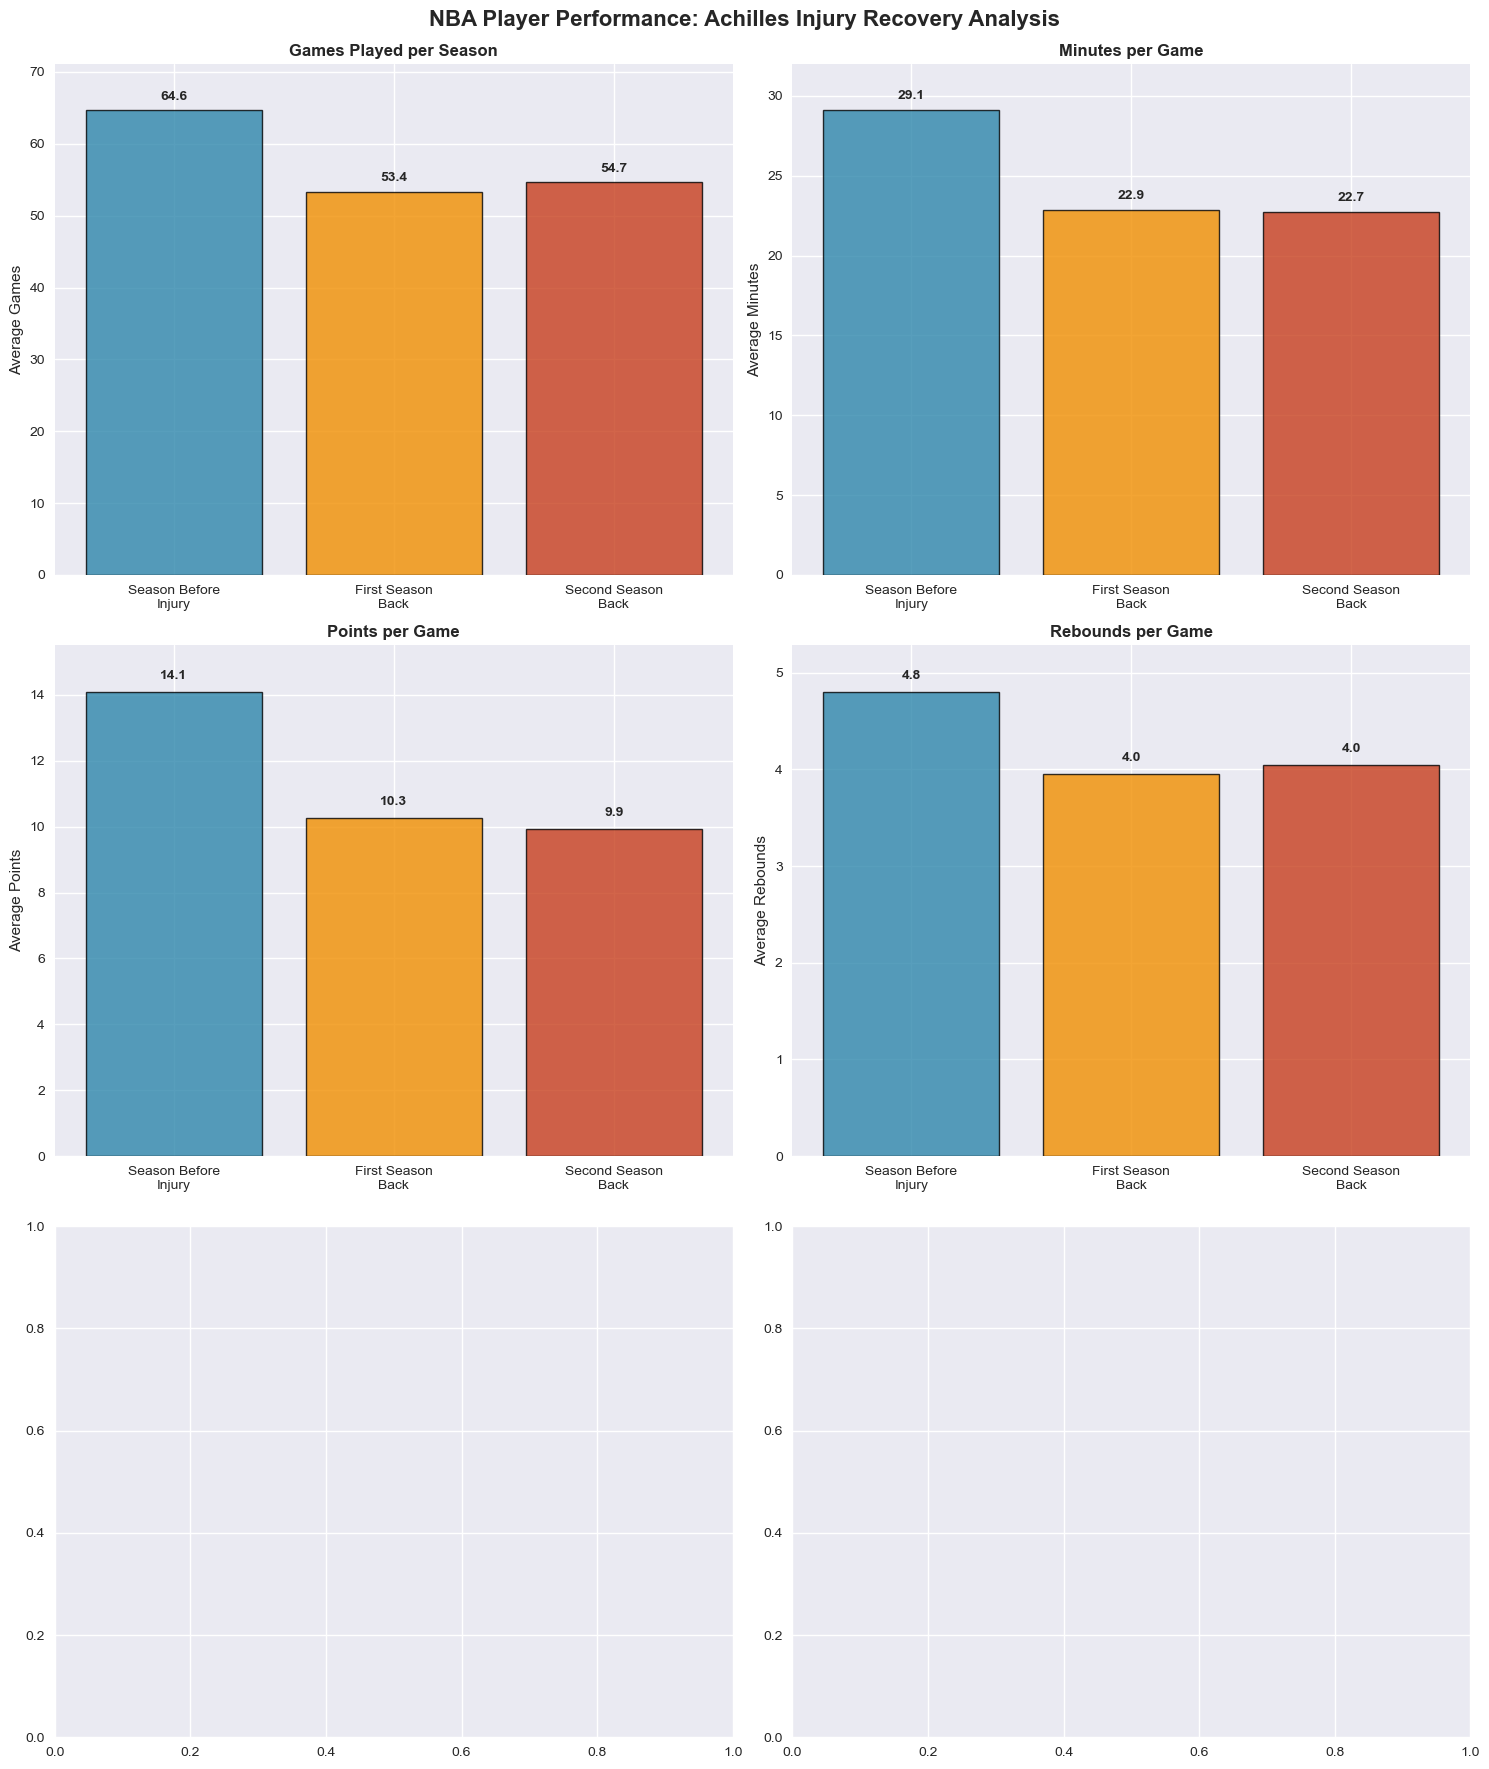

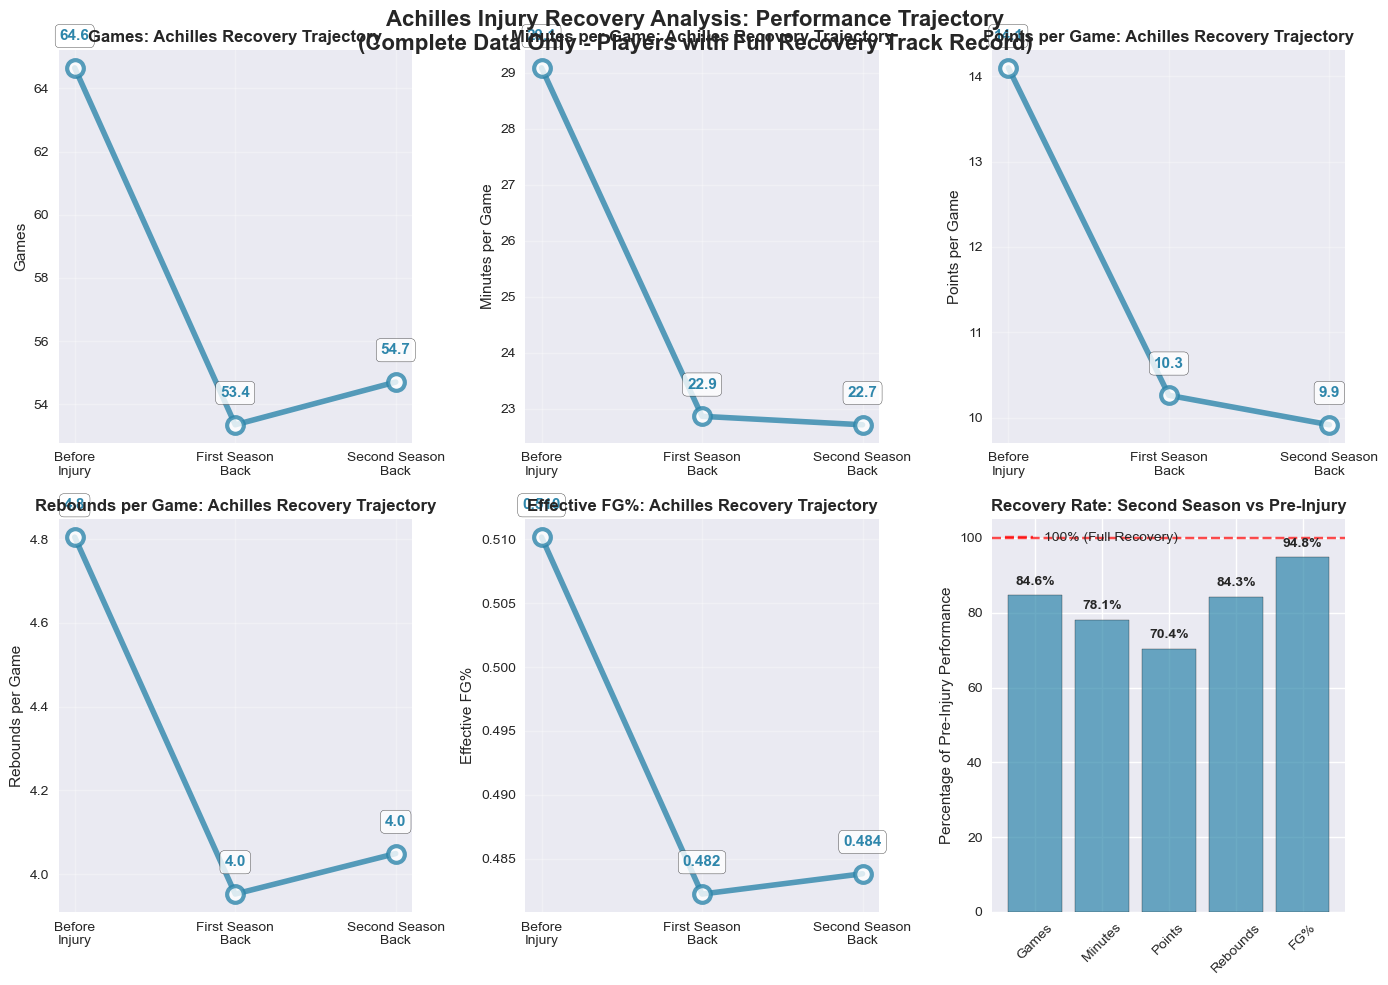


ACHILLES INJURY RECOVERY ANALYSIS - COMPLETE DATA ONLY

ACHILLES INJURY - Mean Performance Metrics (Complete Data Only):
------------------------------------------------------------
prev_g         64.647059
first_g        53.352941
second_g       54.705882
prev_mpg       29.086939
first_mpg      22.861844
second_mpg     22.710481
prev_rpg        4.804875
first_rpg       3.952608
second_rpg      4.049259
prev_efg%       0.510176
first_efg%      0.482235
second_efg%     0.483824
prev_ppg       14.097412
first_ppg      10.263495
second_ppg      9.918245
dtype: float64

Achilles Sample Size (Complete Data): n = 17

------------------------------------------------------------
RECOVERY ANALYSIS:
------------------------------------------------------------
Performance Recovery Rates (Second Season vs Pre-Injury):
Games Played        : 84.6%
Minutes per Game    : 78.1%
Points per Game     : 70.4%
Rebounds per Game   : 84.3%
Effective FG%       : 94.8%


In [235]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Data preparation for Achilles injuries - FILTERED FOR COMPLETE DATA ONLY

# Achilles data - filtered for complete data
final_df_achilles = final_df[final_df["reason"] == "torn achilles"].copy()

# Calculate means for Achilles injuries using filtered data
achilles_metrics = {
    'Games': [
        final_df_achilles_filtered["prev_g"].mean(),
        final_df_achilles_filtered["first_g"].mean(),
        final_df_achilles_filtered["second_g"].mean()
    ],
    'Minutes per Game': [
        final_df_achilles_filtered["prev_mpg"].mean(),
        final_df_achilles_filtered["first_mpg"].mean(),
        final_df_achilles_filtered["second_mpg"].mean()
    ],
    'Rebounds per Game': [
        final_df_achilles_filtered["prev_rpg"].mean(),
        final_df_achilles_filtered["first_rpg"].mean(),
        final_df_achilles_filtered["second_rpg"].mean()
    ],
    'Effective FG%': [
        final_df_achilles_filtered["prev_efg%"].mean(),
        final_df_achilles_filtered["first_efg%"].mean(),
        final_df_achilles_filtered["second_efg%"].mean()
    ],
    'Points per Game': [
        final_df_achilles_filtered["prev_ppg"].mean(),
        final_df_achilles_filtered["first_ppg"].mean(),
        final_df_achilles_filtered["second_ppg"].mean()
    ]
}

# Sample count (all periods will have same count since we filtered for complete data)
achilles_count = len(final_df_achilles_filtered)
achilles_counts = [achilles_count, achilles_count, achilles_count]

time_periods = ['Season Before\nInjury', 'First Season\nBack', 'Second Season\nBack']

# Create Achilles-specific bar chart visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('NBA Player Performance: Achilles Injury Recovery Analysis', 
             fontsize=16, fontweight='bold', y=0.98)

# Define colors for Achilles analysis
colors = ['#2E86AB', '#F18F01', '#C73E1D']

# 1. Games Played
ax = axes[0, 0]
bars = ax.bar(time_periods, achilles_metrics['Games'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Games Played per Season', fontweight='bold')
ax.set_ylabel('Average Games')
ax.set_ylim(0, max(achilles_metrics['Games']) * 1.1)
for bar, value in zip(bars, achilles_metrics['Games']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 2. Minutes per Game
ax = axes[0, 1]
bars = ax.bar(time_periods, achilles_metrics['Minutes per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Minutes per Game', fontweight='bold')
ax.set_ylabel('Average Minutes')
ax.set_ylim(0, max(achilles_metrics['Minutes per Game']) * 1.1)
for bar, value in zip(bars, achilles_metrics['Minutes per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Points per Game
ax = axes[1, 0]
bars = ax.bar(time_periods, achilles_metrics['Points per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Points per Game', fontweight='bold')
ax.set_ylabel('Average Points')
ax.set_ylim(0, max(achilles_metrics['Points per Game']) * 1.1)
for bar, value in zip(bars, achilles_metrics['Points per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. Rebounds per Game
ax = axes[1, 1]
bars = ax.bar(time_periods, achilles_metrics['Rebounds per Game'], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax.set_title('Rebounds per Game', fontweight='bold')
ax.set_ylabel('Average Rebounds')
ax.set_ylim(0, max(achilles_metrics['Rebounds per Game']) * 1.1)
for bar, value in zip(bars, achilles_metrics['Rebounds per Game']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')



plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Create line plot showing Achilles recovery trajectory
plt.figure(figsize=(14, 10))

metrics_for_line = ['Games', 'Minutes per Game', 'Points per Game', 'Rebounds per Game', 'Effective FG%']
x_pos = [0, 1, 2]
x_labels = ['Before\nInjury', 'First Season\nBack', 'Second Season\nBack']

for i, metric in enumerate(metrics_for_line):
    plt.subplot(2, 3, i+1)
    
    # Plot Achilles recovery trajectory
    plt.plot(x_pos, achilles_metrics[metric], marker='o', linewidth=4, markersize=12, 
             color='#2E86AB', alpha=0.8, markerfacecolor='white', markeredgewidth=3)
    
    plt.title(f'{metric}: Achilles Recovery Trajectory', fontweight='bold', fontsize=12)
    plt.xticks(x_pos, x_labels)
    plt.ylabel(metric)
    plt.grid(True, alpha=0.3)
    
    # Add value labels on the line
    for j, value in enumerate(achilles_metrics[metric]):
        plt.annotate(f'{value:.1f}' if metric != 'Effective FG%' else f'{value:.3f}', 
                    (x_pos[j], value), 
                    textcoords="offset points", xytext=(0,20), ha='center',
                    fontweight='bold', color='#2E86AB', fontsize=11,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# Add summary statistics subplot
plt.subplot(2, 3, 6)
categories = ['Games', 'Minutes', 'Points', 'Rebounds', 'FG%']
before_values = [achilles_metrics['Games'][0], achilles_metrics['Minutes per Game'][0], 
                achilles_metrics['Points per Game'][0], achilles_metrics['Rebounds per Game'][0], 
                achilles_metrics['Effective FG%'][0]]
second_values = [achilles_metrics['Games'][2], achilles_metrics['Minutes per Game'][2], 
                achilles_metrics['Points per Game'][2], achilles_metrics['Rebounds per Game'][2], 
                achilles_metrics['Effective FG%'][2]]

# Calculate percentage recovery (second season vs pre-injury)
recovery_pcts = [(second/before)*100 if before != 0 else 0 for second, before in zip(second_values, before_values)]

bars = plt.bar(categories, recovery_pcts, color='#2E86AB', alpha=0.7, edgecolor='black')
plt.title('Recovery Rate: Second Season vs Pre-Injury', fontweight='bold', fontsize=12)
plt.ylabel('Percentage of Pre-Injury Performance')
plt.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='100% (Full Recovery)')
plt.xticks(rotation=45)
plt.legend()

# Add percentage labels on bars
for bar, pct in zip(bars, recovery_pcts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Achilles Injury Recovery Analysis: Performance Trajectory\n(Complete Data Only - Players with Full Recovery Track Record)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

# Print summary statistics for Achilles injuries
print("\n" + "="*80)
print("ACHILLES INJURY RECOVERY ANALYSIS - COMPLETE DATA ONLY")
print("="*80)

print("\nACHILLES INJURY - Mean Performance Metrics (Complete Data Only):")
print("-" * 60)
achilles_summary = final_df_achilles_filtered[["prev_g", "first_g", "second_g",
    "prev_mpg", "first_mpg", "second_mpg",
    "prev_rpg","first_rpg", "second_rpg",
    "prev_efg%", "first_efg%", "second_efg%",
    "prev_ppg", "first_ppg", "second_ppg"]].mean()
print(achilles_summary)

print(f"\nAchilles Sample Size (Complete Data): n = {achilles_count}")

print("\n" + "-"*60)
print("RECOVERY ANALYSIS:")
print("-" * 60)
print("Performance Recovery Rates (Second Season vs Pre-Injury):")
recovery_metrics = {
    'Games Played': f"{(achilles_metrics['Games'][2]/achilles_metrics['Games'][0]*100):.1f}%",
    'Minutes per Game': f"{(achilles_metrics['Minutes per Game'][2]/achilles_metrics['Minutes per Game'][0]*100):.1f}%",
    'Points per Game': f"{(achilles_metrics['Points per Game'][2]/achilles_metrics['Points per Game'][0]*100):.1f}%",
    'Rebounds per Game': f"{(achilles_metrics['Rebounds per Game'][2]/achilles_metrics['Rebounds per Game'][0]*100):.1f}%",
    'Effective FG%': f"{(achilles_metrics['Effective FG%'][2]/achilles_metrics['Effective FG%'][0]*100):.1f}%"
}

for metric, recovery in recovery_metrics.items():
    print(f"{metric:20}: {recovery}")

print("="*80)

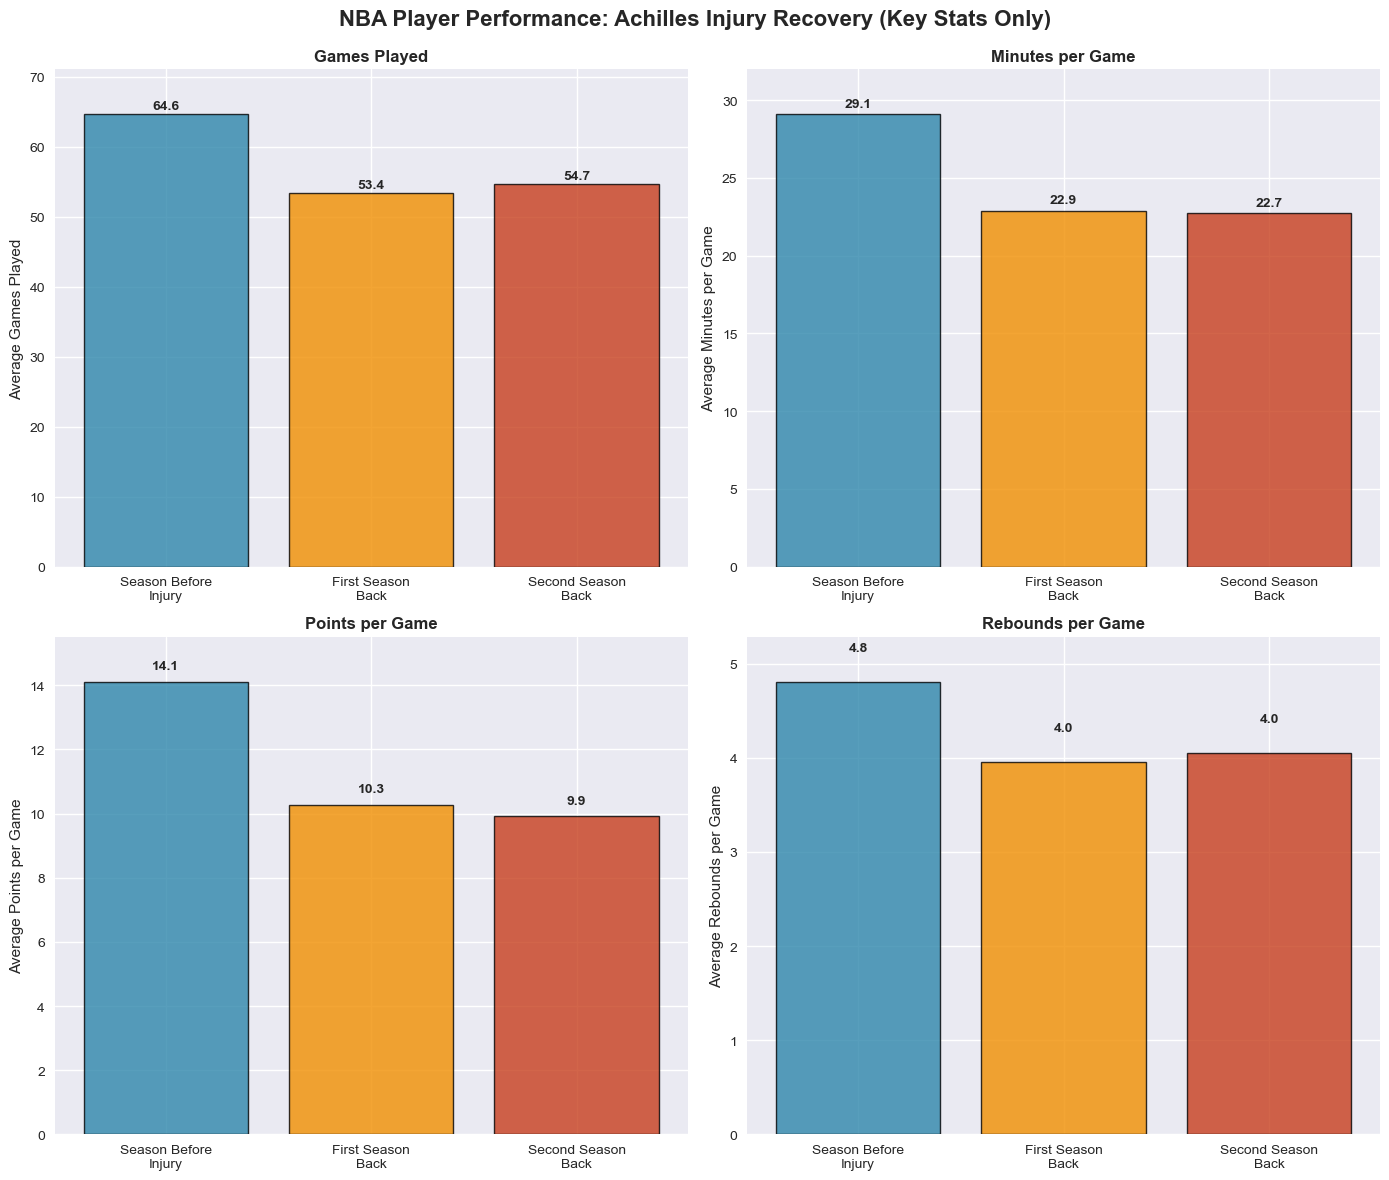

In [239]:

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Achilles data - filtered
final_df_achilles = final_df[final_df["reason"] == "torn achilles"].copy()

# Calculate means for Achilles injuries
achilles_metrics = {
    'Games': [
        final_df_achilles_filtered["prev_g"].mean(),
        final_df_achilles_filtered["first_g"].mean(),
        final_df_achilles_filtered["second_g"].mean()
    ],
    'Minutes per Game': [
        final_df_achilles_filtered["prev_mpg"].mean(),
        final_df_achilles_filtered["first_mpg"].mean(),
        final_df_achilles_filtered["second_mpg"].mean()
    ],
    'Rebounds per Game': [
        final_df_achilles_filtered["prev_rpg"].mean(),
        final_df_achilles_filtered["first_rpg"].mean(),
        final_df_achilles_filtered["second_rpg"].mean()
    ],
    'Points per Game': [
        final_df_achilles_filtered["prev_ppg"].mean(),
        final_df_achilles_filtered["first_ppg"].mean(),
        final_df_achilles_filtered["second_ppg"].mean()
    ]
}

achilles_count = len(final_df_achilles_filtered)
time_periods = ['Season Before\nInjury', 'First Season\nBack', 'Second Season\nBack']
colors = ['#2E86AB', '#F18F01', '#C73E1D']

# Bar charts
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('NBA Player Performance: Achilles Injury Recovery (Key Stats Only)', 
             fontsize=16, fontweight='bold', y=0.98)

metric_titles = ['Games Played', 'Minutes per Game', 'Points per Game', 'Rebounds per Game']
metric_keys = ['Games', 'Minutes per Game', 'Points per Game', 'Rebounds per Game']

for ax, metric, title in zip(axes.flatten(), metric_keys, metric_titles):
    bars = ax.bar(time_periods, achilles_metrics[metric], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    ax.set_title(title, fontweight='bold')
    ax.set_ylabel(f'Average {title}')
    ax.set_ylim(0, max(achilles_metrics[metric]) * 1.1)
    for bar, value in zip(bars, achilles_metrics[metric]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


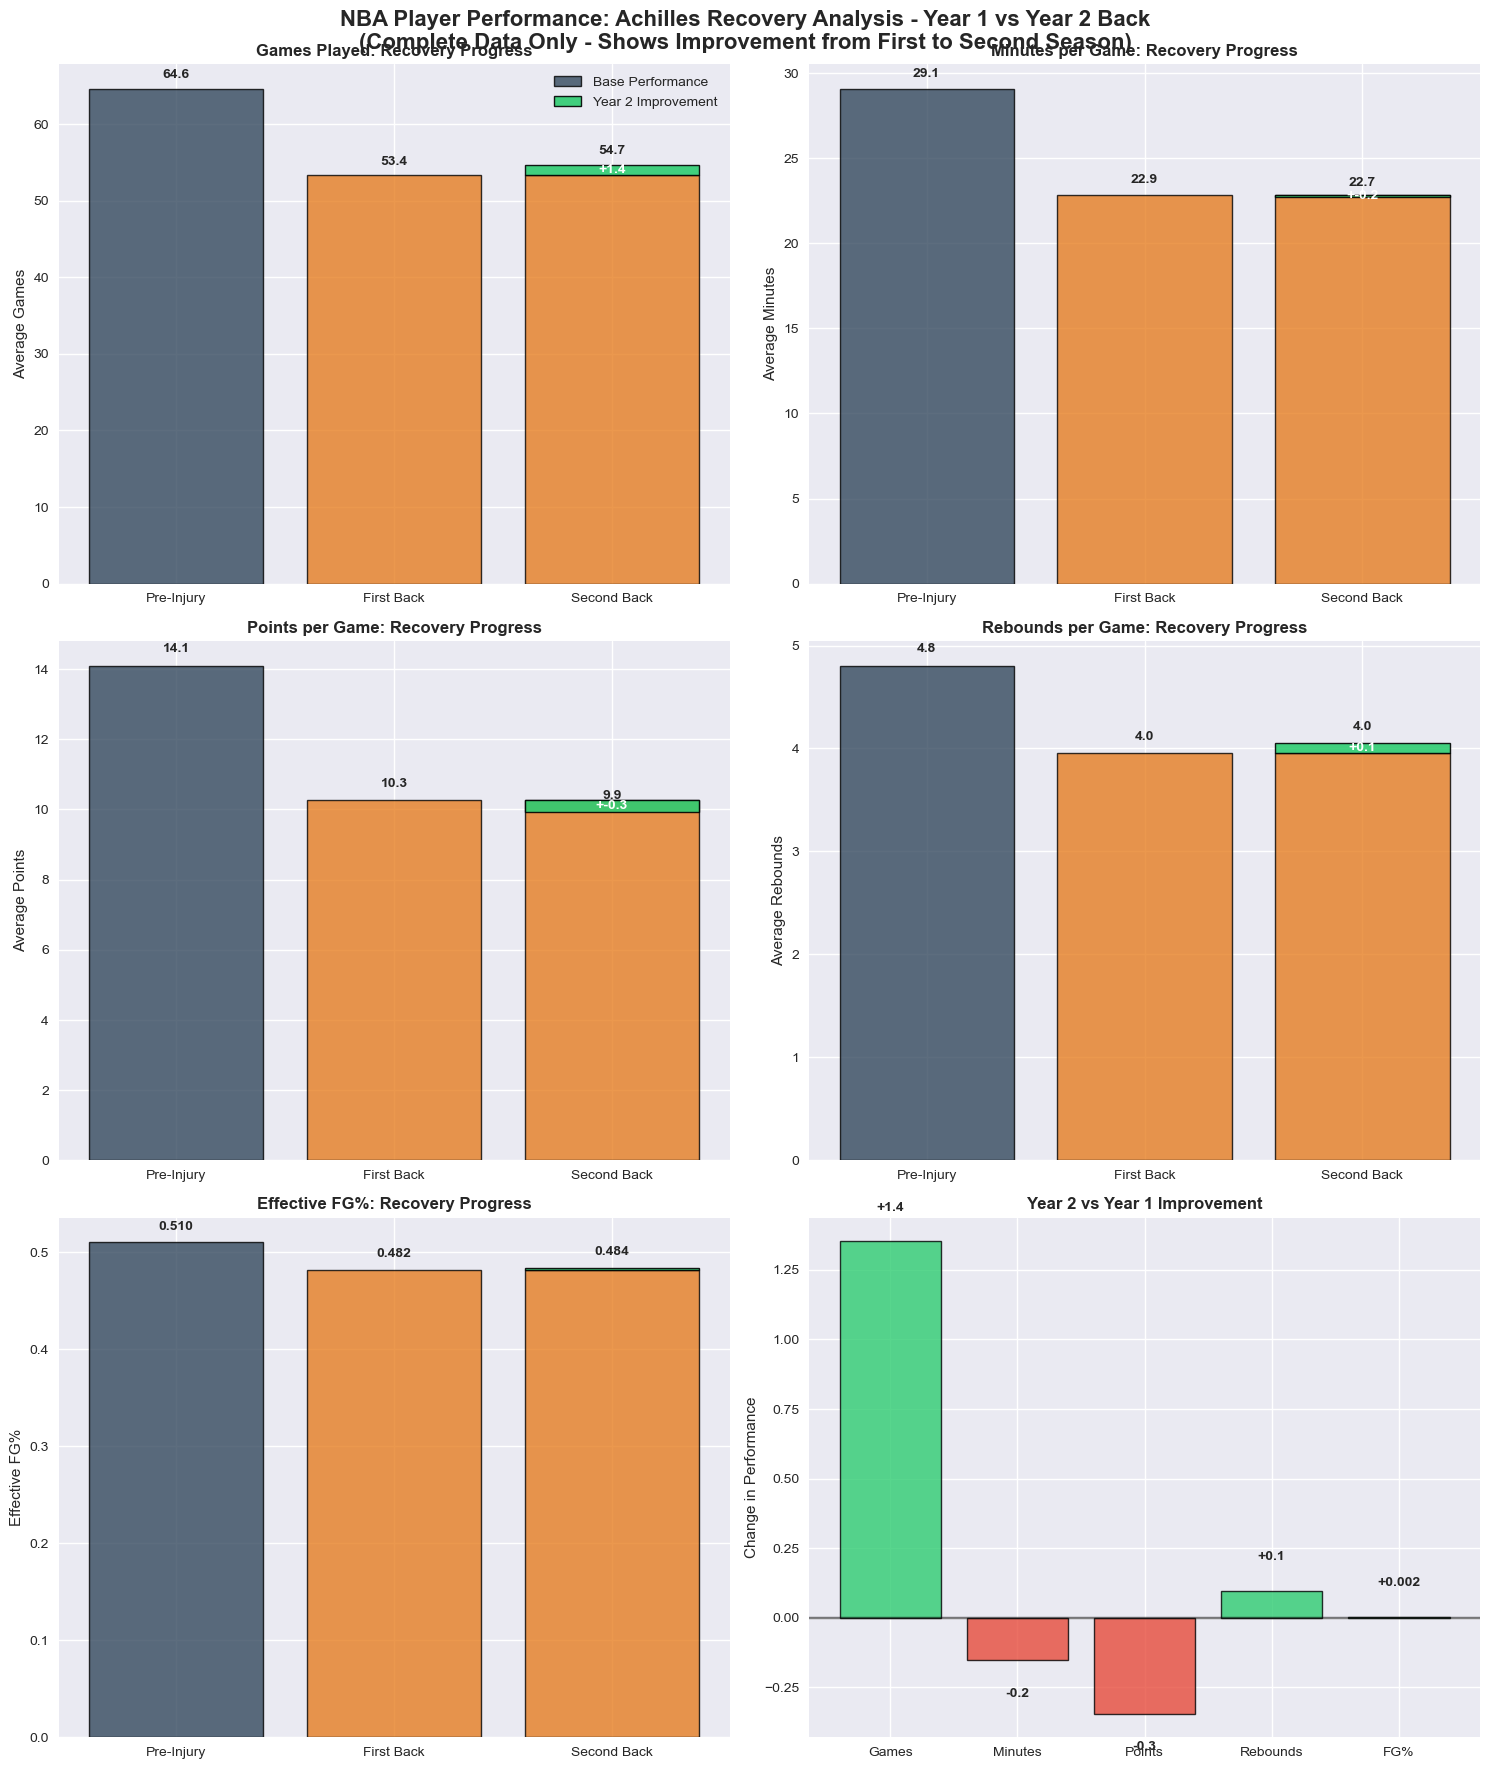

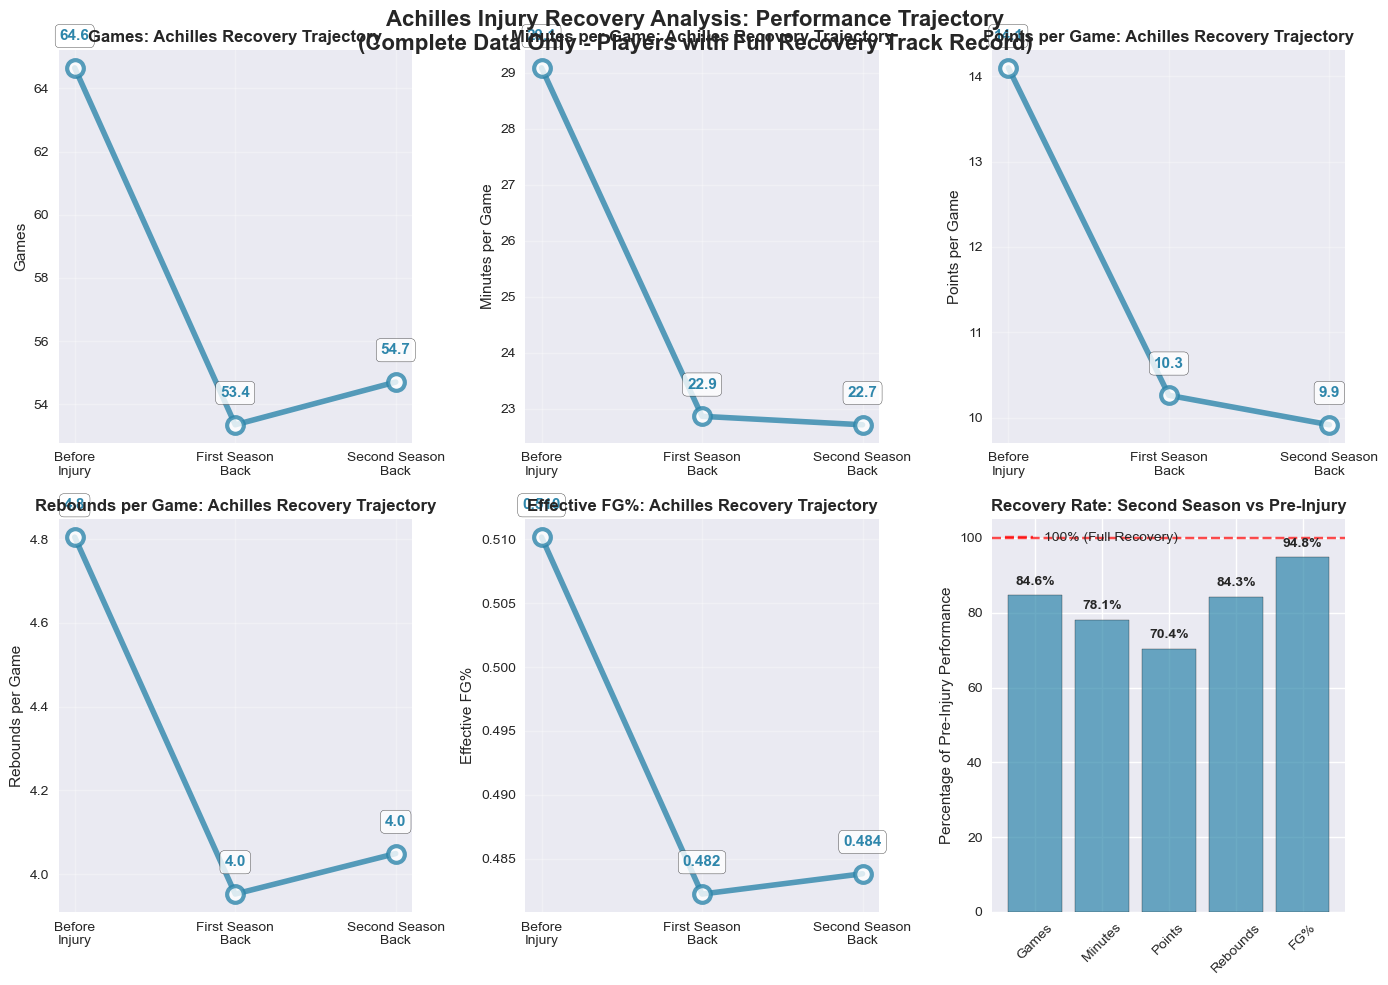

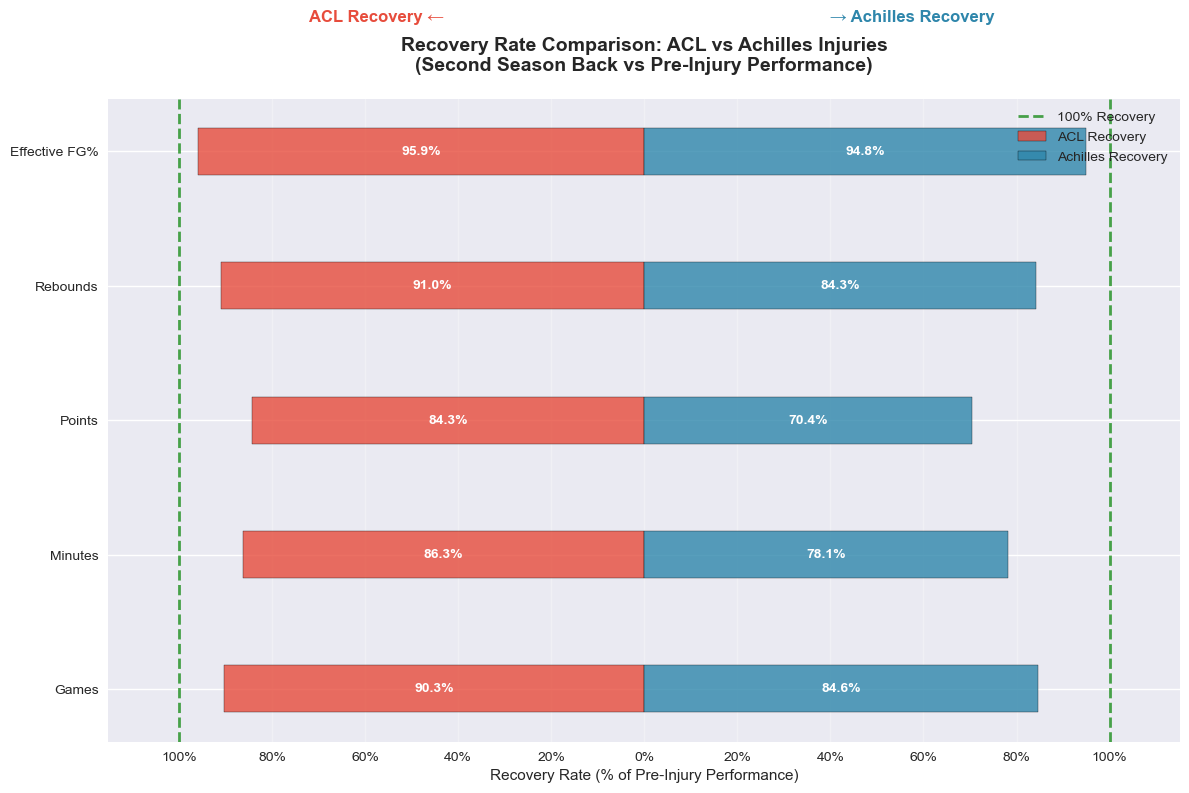


INJURY RECOVERY COMPARISON - TORNADO CHART DATA

ACL Recovery Rates (Second Season vs Pre-Injury):
--------------------------------------------------
Games          : 90.3%
Minutes        : 86.3%
Points         : 84.3%
Rebounds       : 91.0%
Effective FG%  : 95.9%

ACL Sample Size: n = 35

Achilles Recovery Rates (Second Season vs Pre-Injury):
--------------------------------------------------
Games          : 84.6%
Minutes        : 78.1%
Points         : 70.4%
Rebounds       : 84.3%
Effective FG%  : 94.8%

Achilles Sample Size: n = 17

--------------------------------------------------
COMPARISON SUMMARY:
--------------------------------------------------
Recovery Rate Differences (Achilles - ACL):
Games          : -5.7% (Advantage: ACL)
Minutes        : -8.2% (Advantage: ACL)
Points         : -14.0% (Advantage: ACL)
Rebounds       : -6.7% (Advantage: ACL)
Effective FG%  : -1.1% (Advantage: ACL)

ACHILLES INJURY RECOVERY ANALYSIS - COMPLETE DATA ONLY

ACHILLES INJURY - Mean Performan

In [237]:


# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Data preparation for Achilles injuries - FILTERED FOR COMPLETE DATA ONLY

# Achilles data - filtered for complete data
final_df_achilles = final_df[final_df["reason"] == "torn achilles"].copy()

# Filter to only include players with non-null values in all three periods
achilles_mask = (
    final_df_achilles["prev_g"].notna() & 
    final_df_achilles["first_g"].notna() & 
    final_df_achilles["second_g"].notna() &
    final_df_achilles["prev_trb"].notna() & 
    final_df_achilles["first_trb"].notna() & 
    final_df_achilles["second_trb"].notna() &
    final_df_achilles["prev_mp"].notna() & 
    final_df_achilles["first_mp"].notna() & 
    final_df_achilles["second_mp"].notna() &
    final_df_achilles["prev_pts"].notna() & 
    final_df_achilles["first_pts"].notna() & 
    final_df_achilles["second_pts"].notna() &
    final_df_achilles["prev_efg%"].notna() & 
    final_df_achilles["first_efg%"].notna() & 
    final_df_achilles["second_efg%"].notna()
)

final_df_achilles_filtered = final_df_achilles[achilles_mask].copy()

# Calculate per-game stats for Achilles
final_df_achilles_filtered["prev_rpg"] = final_df_achilles_filtered["prev_trb"] / final_df_achilles_filtered["prev_g"]
final_df_achilles_filtered["first_rpg"] = final_df_achilles_filtered["first_trb"] / final_df_achilles_filtered["first_g"]
final_df_achilles_filtered["second_rpg"] = final_df_achilles_filtered["second_trb"] / final_df_achilles_filtered["second_g"]
final_df_achilles_filtered["prev_mpg"] = final_df_achilles_filtered["prev_mp"] / final_df_achilles_filtered["prev_g"]
final_df_achilles_filtered["first_mpg"] = final_df_achilles_filtered["first_mp"] / final_df_achilles_filtered["first_g"]
final_df_achilles_filtered["second_mpg"] = final_df_achilles_filtered["second_mp"] / final_df_achilles_filtered["second_g"]
final_df_achilles_filtered["prev_ppg"] = final_df_achilles_filtered["prev_pts"] / final_df_achilles_filtered["prev_g"]
final_df_achilles_filtered["first_ppg"] = final_df_achilles_filtered["first_pts"] / final_df_achilles_filtered["first_g"]
final_df_achilles_filtered["second_ppg"] = final_df_achilles_filtered["second_pts"] / final_df_achilles_filtered["second_g"]

# Calculate means for Achilles injuries using filtered data
achilles_metrics = {
    'Games': [
        final_df_achilles_filtered["prev_g"].mean(),
        final_df_achilles_filtered["first_g"].mean(),
        final_df_achilles_filtered["second_g"].mean()
    ],
    'Minutes per Game': [
        final_df_achilles_filtered["prev_mpg"].mean(),
        final_df_achilles_filtered["first_mpg"].mean(),
        final_df_achilles_filtered["second_mpg"].mean()
    ],
    'Rebounds per Game': [
        final_df_achilles_filtered["prev_rpg"].mean(),
        final_df_achilles_filtered["first_rpg"].mean(),
        final_df_achilles_filtered["second_rpg"].mean()
    ],
    'Effective FG%': [
        final_df_achilles_filtered["prev_efg%"].mean(),
        final_df_achilles_filtered["first_efg%"].mean(),
        final_df_achilles_filtered["second_efg%"].mean()
    ],
    'Points per Game': [
        final_df_achilles_filtered["prev_ppg"].mean(),
        final_df_achilles_filtered["first_ppg"].mean(),
        final_df_achilles_filtered["second_ppg"].mean()
    ]
}

# Sample count (all periods will have same count since we filtered for complete data)
achilles_count = len(final_df_achilles_filtered)
achilles_counts = [achilles_count, achilles_count, achilles_count]

time_periods = ['Season Before\nInjury', 'First Season\nBack', 'Second Season\nBack']

# Create Achilles-specific stacked/overlayed bar chart visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('NBA Player Performance: Achilles Recovery Analysis - Year 1 vs Year 2 Back\n(Complete Data Only - Shows Improvement from First to Second Season)', 
             fontsize=16, fontweight='bold', y=0.98)

# Define colors for stacked analysis
pre_color = '#34495E'  # Dark gray for pre-injury baseline
first_color = '#E67E22'  # Orange for first season back
second_color = '#27AE60'  # Green for second season back
improvement_color = '#2ECC71'  # Lighter green for improvement portion

# 1. Games Played - Stacked
ax = axes[0, 0]
pre_val = achilles_metrics['Games'][0]
first_val = achilles_metrics['Games'][1] 
second_val = achilles_metrics['Games'][2]
improvement = second_val - first_val

bars1 = ax.bar(['Pre-Injury', 'First Back', 'Second Back'], 
               [pre_val, first_val, first_val], 
               color=[pre_color, first_color, first_color], alpha=0.8, edgecolor='black', linewidth=1,
               label='Base Performance')
bars2 = ax.bar(['Second Back'], [improvement], bottom=[first_val], 
               color=improvement_color, alpha=0.9, edgecolor='black', linewidth=1,
               label='Year 2 Improvement')

ax.set_title('Games Played: Recovery Progress', fontweight='bold')
ax.set_ylabel('Average Games')
ax.legend()

# Add value labels
ax.text(0, pre_val + 1, f'{pre_val:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(1, first_val + 1, f'{first_val:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(2, second_val + 1, f'{second_val:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(2, first_val + improvement/2, f'+{improvement:.1f}', ha='center', va='center', 
        fontweight='bold', color='white', fontsize=10)

# 2. Minutes per Game - Stacked
ax = axes[0, 1]
pre_val = achilles_metrics['Minutes per Game'][0]
first_val = achilles_metrics['Minutes per Game'][1]
second_val = achilles_metrics['Minutes per Game'][2]
improvement = second_val - first_val

bars1 = ax.bar(['Pre-Injury', 'First Back', 'Second Back'], 
               [pre_val, first_val, first_val], 
               color=[pre_color, first_color, first_color], alpha=0.8, edgecolor='black', linewidth=1)
bars2 = ax.bar(['Second Back'], [improvement], bottom=[first_val], 
               color=improvement_color, alpha=0.9, edgecolor='black', linewidth=1)

ax.set_title('Minutes per Game: Recovery Progress', fontweight='bold')
ax.set_ylabel('Average Minutes')

ax.text(0, pre_val + 0.5, f'{pre_val:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(1, first_val + 0.5, f'{first_val:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(2, second_val + 0.5, f'{second_val:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(2, first_val + improvement/2, f'+{improvement:.1f}', ha='center', va='center', 
        fontweight='bold', color='white', fontsize=10)

# 3. Points per Game - Stacked
ax = axes[1, 0]
pre_val = achilles_metrics['Points per Game'][0]
first_val = achilles_metrics['Points per Game'][1]
second_val = achilles_metrics['Points per Game'][2]
improvement = second_val - first_val

bars1 = ax.bar(['Pre-Injury', 'First Back', 'Second Back'], 
               [pre_val, first_val, first_val], 
               color=[pre_color, first_color, first_color], alpha=0.8, edgecolor='black', linewidth=1)
bars2 = ax.bar(['Second Back'], [improvement], bottom=[first_val], 
               color=improvement_color, alpha=0.9, edgecolor='black', linewidth=1)

ax.set_title('Points per Game: Recovery Progress', fontweight='bold')
ax.set_ylabel('Average Points')

ax.text(0, pre_val + 0.3, f'{pre_val:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(1, first_val + 0.3, f'{first_val:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(2, second_val + 0.3, f'{second_val:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(2, first_val + improvement/2, f'+{improvement:.1f}', ha='center', va='center', 
        fontweight='bold', color='white', fontsize=10)

# 4. Rebounds per Game - Stacked
ax = axes[1, 1]
pre_val = achilles_metrics['Rebounds per Game'][0]
first_val = achilles_metrics['Rebounds per Game'][1]
second_val = achilles_metrics['Rebounds per Game'][2]
improvement = second_val - first_val

bars1 = ax.bar(['Pre-Injury', 'First Back', 'Second Back'], 
               [pre_val, first_val, first_val], 
               color=[pre_color, first_color, first_color], alpha=0.8, edgecolor='black', linewidth=1)
bars2 = ax.bar(['Second Back'], [improvement], bottom=[first_val], 
               color=improvement_color, alpha=0.9, edgecolor='black', linewidth=1)

ax.set_title('Rebounds per Game: Recovery Progress', fontweight='bold')
ax.set_ylabel('Average Rebounds')

ax.text(0, pre_val + 0.1, f'{pre_val:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(1, first_val + 0.1, f'{first_val:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(2, second_val + 0.1, f'{second_val:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(2, first_val + improvement/2, f'+{improvement:.1f}', ha='center', va='center', 
        fontweight='bold', color='white', fontsize=10)

# 5. Effective FG% - Stacked
ax = axes[2, 0]
pre_val = achilles_metrics['Effective FG%'][0]
first_val = achilles_metrics['Effective FG%'][1]
second_val = achilles_metrics['Effective FG%'][2]
improvement = second_val - first_val

bars1 = ax.bar(['Pre-Injury', 'First Back', 'Second Back'], 
               [pre_val, first_val, first_val], 
               color=[pre_color, first_color, first_color], alpha=0.8, edgecolor='black', linewidth=1)
bars2 = ax.bar(['Second Back'], [improvement], bottom=[first_val], 
               color=improvement_color, alpha=0.9, edgecolor='black', linewidth=1)

ax.set_title('Effective FG%: Recovery Progress', fontweight='bold')
ax.set_ylabel('Effective FG%')

ax.text(0, pre_val + 0.01, f'{pre_val:.3f}', ha='center', va='bottom', fontweight='bold')
ax.text(1, first_val + 0.01, f'{first_val:.3f}', ha='center', va='bottom', fontweight='bold')
ax.text(2, second_val + 0.01, f'{second_val:.3f}', ha='center', va='bottom', fontweight='bold')
if improvement > 0.005:  # Only show improvement label if meaningful
    ax.text(2, first_val + improvement/2, f'+{improvement:.3f}', ha='center', va='center', 
            fontweight='bold', color='white', fontsize=9)

# 6. Improvement Summary
ax = axes[2, 1]
metrics_short = ['Games', 'Minutes', 'Points', 'Rebounds', 'FG%']
improvements = [
    achilles_metrics['Games'][2] - achilles_metrics['Games'][1],
    achilles_metrics['Minutes per Game'][2] - achilles_metrics['Minutes per Game'][1],
    achilles_metrics['Points per Game'][2] - achilles_metrics['Points per Game'][1],
    achilles_metrics['Rebounds per Game'][2] - achilles_metrics['Rebounds per Game'][1],
    achilles_metrics['Effective FG%'][2] - achilles_metrics['Effective FG%'][1]
]

# Color bars based on positive/negative improvement
colors = [improvement_color if imp > 0 else '#E74C3C' for imp in improvements]
bars = ax.bar(metrics_short, improvements, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

ax.set_title('Year 2 vs Year 1 Improvement', fontweight='bold')
ax.set_ylabel('Change in Performance')
ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)

# Add value labels
for bar, imp, metric in zip(bars, improvements, metrics_short):
    height = bar.get_height()
    y_pos = height + (0.1 if height > 0 else -0.1)
    if metric == 'FG%':
        ax.text(bar.get_x() + bar.get_width()/2., y_pos, f'{imp:+.3f}', 
                ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')
    else:
        ax.text(bar.get_x() + bar.get_width()/2., y_pos, f'{imp:+.1f}', 
                ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Create line plot showing Achilles recovery trajectory
plt.figure(figsize=(14, 10))

metrics_for_line = ['Games', 'Minutes per Game', 'Points per Game', 'Rebounds per Game', 'Effective FG%']
x_pos = [0, 1, 2]
x_labels = ['Before\nInjury', 'First Season\nBack', 'Second Season\nBack']

for i, metric in enumerate(metrics_for_line):
    plt.subplot(2, 3, i+1)
    
    # Plot Achilles recovery trajectory
    plt.plot(x_pos, achilles_metrics[metric], marker='o', linewidth=4, markersize=12, 
             color='#2E86AB', alpha=0.8, markerfacecolor='white', markeredgewidth=3)
    
    plt.title(f'{metric}: Achilles Recovery Trajectory', fontweight='bold', fontsize=12)
    plt.xticks(x_pos, x_labels)
    plt.ylabel(metric)
    plt.grid(True, alpha=0.3)
    
    # Add value labels on the line
    for j, value in enumerate(achilles_metrics[metric]):
        plt.annotate(f'{value:.1f}' if metric != 'Effective FG%' else f'{value:.3f}', 
                    (x_pos[j], value), 
                    textcoords="offset points", xytext=(0,20), ha='center',
                    fontweight='bold', color='#2E86AB', fontsize=11,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# Add summary statistics subplot
plt.subplot(2, 3, 6)
categories = ['Games', 'Minutes', 'Points', 'Rebounds', 'FG%']
before_values = [achilles_metrics['Games'][0], achilles_metrics['Minutes per Game'][0], 
                achilles_metrics['Points per Game'][0], achilles_metrics['Rebounds per Game'][0], 
                achilles_metrics['Effective FG%'][0]]
second_values = [achilles_metrics['Games'][2], achilles_metrics['Minutes per Game'][2], 
                achilles_metrics['Points per Game'][2], achilles_metrics['Rebounds per Game'][2], 
                achilles_metrics['Effective FG%'][2]]

# Calculate percentage recovery (second season vs pre-injury)
recovery_pcts = [(second/before)*100 if before != 0 else 0 for second, before in zip(second_values, before_values)]

bars = plt.bar(categories, recovery_pcts, color='#2E86AB', alpha=0.7, edgecolor='black')
plt.title('Recovery Rate: Second Season vs Pre-Injury', fontweight='bold', fontsize=12)
plt.ylabel('Percentage of Pre-Injury Performance')
plt.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='100% (Full Recovery)')
plt.xticks(rotation=45)
plt.legend()

# Add percentage labels on bars
for bar, pct in zip(bars, recovery_pcts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Achilles Injury Recovery Analysis: Performance Trajectory\n(Complete Data Only - Players with Full Recovery Track Record)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

# Create tornado chart comparing ACL vs Achilles recovery rates
# First, we need to calculate ACL metrics for comparison
final_df_acl = final_df[final_df["reason"] == "torn acl"].copy()

# Filter ACL data for complete data
acl_mask = (
    final_df_acl["prev_g"].notna() & 
    final_df_acl["first_g"].notna() & 
    final_df_acl["second_g"].notna() &
    final_df_acl["prev_trb"].notna() & 
    final_df_acl["first_trb"].notna() & 
    final_df_acl["second_trb"].notna() &
    final_df_acl["prev_mp"].notna() & 
    final_df_acl["first_mp"].notna() & 
    final_df_acl["second_mp"].notna() &
    final_df_acl["prev_pts"].notna() & 
    final_df_acl["first_pts"].notna() & 
    final_df_acl["second_pts"].notna() &
    final_df_acl["prev_efg%"].notna() & 
    final_df_acl["first_efg%"].notna() & 
    final_df_acl["second_efg%"].notna()
)

final_df_acl_filtered = final_df_acl[acl_mask].copy()

# Calculate per-game stats for ACL
final_df_acl_filtered["prev_rpg"] = final_df_acl_filtered["prev_trb"] / final_df_acl_filtered["prev_g"]
final_df_acl_filtered["first_rpg"] = final_df_acl_filtered["first_trb"] / final_df_acl_filtered["first_g"]
final_df_acl_filtered["second_rpg"] = final_df_acl_filtered["second_trb"] / final_df_acl_filtered["second_g"]
final_df_acl_filtered["prev_mpg"] = final_df_acl_filtered["prev_mp"] / final_df_acl_filtered["prev_g"]
final_df_acl_filtered["first_mpg"] = final_df_acl_filtered["first_mp"] / final_df_acl_filtered["first_g"]
final_df_acl_filtered["second_mpg"] = final_df_acl_filtered["second_mp"] / final_df_acl_filtered["second_g"]
final_df_acl_filtered["prev_ppg"] = final_df_acl_filtered["prev_pts"] / final_df_acl_filtered["prev_g"]
final_df_acl_filtered["first_ppg"] = final_df_acl_filtered["first_pts"] / final_df_acl_filtered["first_g"]
final_df_acl_filtered["second_ppg"] = final_df_acl_filtered["second_pts"] / final_df_acl_filtered["second_g"]

# Calculate ACL recovery rates (second season vs pre-injury)
acl_recovery_rates = {
    'Games': (final_df_acl_filtered["second_g"].mean() / final_df_acl_filtered["prev_g"].mean()) * 100,
    'Minutes': (final_df_acl_filtered["second_mpg"].mean() / final_df_acl_filtered["prev_mpg"].mean()) * 100,
    'Points': (final_df_acl_filtered["second_ppg"].mean() / final_df_acl_filtered["prev_ppg"].mean()) * 100,
    'Rebounds': (final_df_acl_filtered["second_rpg"].mean() / final_df_acl_filtered["prev_rpg"].mean()) * 100,
    'Effective FG%': (final_df_acl_filtered["second_efg%"].mean() / final_df_acl_filtered["prev_efg%"].mean()) * 100
}

# Calculate Achilles recovery rates (second season vs pre-injury)
achilles_recovery_rates = {
    'Games': (achilles_metrics['Games'][2] / achilles_metrics['Games'][0]) * 100,
    'Minutes': (achilles_metrics['Minutes per Game'][2] / achilles_metrics['Minutes per Game'][0]) * 100,
    'Points': (achilles_metrics['Points per Game'][2] / achilles_metrics['Points per Game'][0]) * 100,
    'Rebounds': (achilles_metrics['Rebounds per Game'][2] / achilles_metrics['Rebounds per Game'][0]) * 100,
    'Effective FG%': (achilles_metrics['Effective FG%'][2] / achilles_metrics['Effective FG%'][0]) * 100
}

# Create tornado chart
fig, ax = plt.subplots(figsize=(12, 8))

metrics = list(acl_recovery_rates.keys())
acl_values = [acl_recovery_rates[metric] for metric in metrics]
achilles_values = [achilles_recovery_rates[metric] for metric in metrics]

y_pos = np.arange(len(metrics))

# Create horizontal bars
# ACL bars (left side, negative values for tornado effect)
acl_bars = ax.barh(y_pos, [-val for val in acl_values], height=0.35, 
                   color='#E74C3C', alpha=0.8, label='ACL Recovery', edgecolor='black')

# Achilles bars (right side, positive values)
achilles_bars = ax.barh(y_pos, achilles_values, height=0.35, 
                       color='#2E86AB', alpha=0.8, label='Achilles Recovery', edgecolor='black')

# Customize the chart
ax.set_yticks(y_pos)
ax.set_yticklabels(metrics)
ax.set_xlabel('Recovery Rate (% of Pre-Injury Performance)')
ax.set_title('Recovery Rate Comparison: ACL vs Achilles Injuries\n(Second Season Back vs Pre-Injury Performance)', 
             fontweight='bold', fontsize=14, pad=20)

# Add vertical line at 100% (full recovery)
ax.axvline(x=100, color='green', linestyle='--', alpha=0.7, linewidth=2, label='100% Recovery')
ax.axvline(x=-100, color='green', linestyle='--', alpha=0.7, linewidth=2)

# Add value labels on bars
for i, (acl_val, achilles_val) in enumerate(zip(acl_values, achilles_values)):
    # ACL labels (left side)
    ax.text(-acl_val/2, i, f'{acl_val:.1f}%', ha='center', va='center', 
            fontweight='bold', color='white', fontsize=10)
    # Achilles labels (right side)
    ax.text(achilles_val/2, i, f'{achilles_val:.1f}%', ha='center', va='center', 
            fontweight='bold', color='white', fontsize=10)

# Set x-axis limits and labels
max_val = max(max(acl_values), max(achilles_values))
ax.set_xlim(-max_val*1.2, max_val*1.2)

# Create custom x-axis labels
ticks = [-120, -100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120]
labels = ['120%', '100%', '80%', '60%', '40%', '20%', '0%', '20%', '40%', '60%', '80%', '100%', '120%']
ax.set_xticks([t for t in ticks if abs(t) <= max_val*1.2])
ax.set_xticklabels([labels[i] for i, t in enumerate(ticks) if abs(t) <= max_val*1.2])

# Add legend
ax.legend(loc='upper right')

# Add injury type labels
ax.text(-max_val*0.6, len(metrics), 'ACL Recovery ←', ha='center', va='center', 
        fontsize=12, fontweight='bold', color='#E74C3C')
ax.text(max_val*0.6, len(metrics), '→ Achilles Recovery', ha='center', va='center', 
        fontsize=12, fontweight='bold', color='#2E86AB')

# Add grid for better readability
ax.grid(axis='x', alpha=0.3, linestyle='-')

plt.tight_layout()
plt.show()

# Print summary statistics for Achilles injuries
print("\n" + "="*80)
print("INJURY RECOVERY COMPARISON - TORNADO CHART DATA")
print("="*80)

print("\nACL Recovery Rates (Second Season vs Pre-Injury):")
print("-" * 50)
acl_count = len(final_df_acl_filtered)
for metric, rate in acl_recovery_rates.items():
    print(f"{metric:15}: {rate:.1f}%")
print(f"\nACL Sample Size: n = {acl_count}")

print("\nAchilles Recovery Rates (Second Season vs Pre-Injury):")
print("-" * 50)
for metric, rate in achilles_recovery_rates.items():
    print(f"{metric:15}: {rate:.1f}%")
print(f"\nAchilles Sample Size: n = {achilles_count}")

print("\n" + "-"*50)
print("COMPARISON SUMMARY:")
print("-" * 50)
print("Recovery Rate Differences (Achilles - ACL):")
for metric in metrics:
    diff = achilles_recovery_rates[metric] - acl_recovery_rates[metric]
    better = "Achilles" if diff > 0 else "ACL"
    print(f"{metric:15}: {diff:+.1f}% (Advantage: {better})")

print("\n" + "="*80)
print("ACHILLES INJURY RECOVERY ANALYSIS - COMPLETE DATA ONLY")
print("="*80)

print("\nACHILLES INJURY - Mean Performance Metrics (Complete Data Only):")
print("-" * 60)
achilles_summary = final_df_achilles_filtered[["prev_g", "first_g", "second_g",
    "prev_mpg", "first_mpg", "second_mpg",
    "prev_rpg","first_rpg", "second_rpg",
    "prev_efg%", "first_efg%", "second_efg%",
    "prev_ppg", "first_ppg", "second_ppg"]].mean()
print(achilles_summary)

print(f"\nAchilles Sample Size (Complete Data): n = {achilles_count}")

print("\n" + "-"*60)
print("RECOVERY ANALYSIS:")
print("-" * 60)
print("Performance Recovery Rates (Second Season vs Pre-Injury):")
recovery_metrics = {
    'Games Played': f"{(achilles_metrics['Games'][2]/achilles_metrics['Games'][0]*100):.1f}%",
    'Minutes per Game': f"{(achilles_metrics['Minutes per Game'][2]/achilles_metrics['Minutes per Game'][0]*100):.1f}%",
    'Points per Game': f"{(achilles_metrics['Points per Game'][2]/achilles_metrics['Points per Game'][0]*100):.1f}%",
    'Rebounds per Game': f"{(achilles_metrics['Rebounds per Game'][2]/achilles_metrics['Rebounds per Game'][0]*100):.1f}%",
    'Effective FG%': f"{(achilles_metrics['Effective FG%'][2]/achilles_metrics['Effective FG%'][0]*100):.1f}%"
}

for metric, recovery in recovery_metrics.items():
    print(f"{metric:20}: {recovery}")

print("\n" + "-"*60)
print("YEAR-OVER-YEAR IMPROVEMENT (Year 2 vs Year 1 Back):")
print("-" * 60)
improvement_metrics = {
    'Games Played': achilles_metrics['Games'][2] - achilles_metrics['Games'][1],
    'Minutes per Game': achilles_metrics['Minutes per Game'][2] - achilles_metrics['Minutes per Game'][1],
    'Points per Game': achilles_metrics['Points per Game'][2] - achilles_metrics['Points per Game'][1],
    'Rebounds per Game': achilles_metrics['Rebounds per Game'][2] - achilles_metrics['Rebounds per Game'][1],
    'Effective FG%': achilles_metrics['Effective FG%'][2] - achilles_metrics['Effective FG%'][1]
}

for metric, improvement in improvement_metrics.items():
    if metric == 'Effective FG%':
        print(f"{metric:20}: {improvement:+.3f}")
    else:
        print(f"{metric:20}: {improvement:+.1f}")

print("="*80)

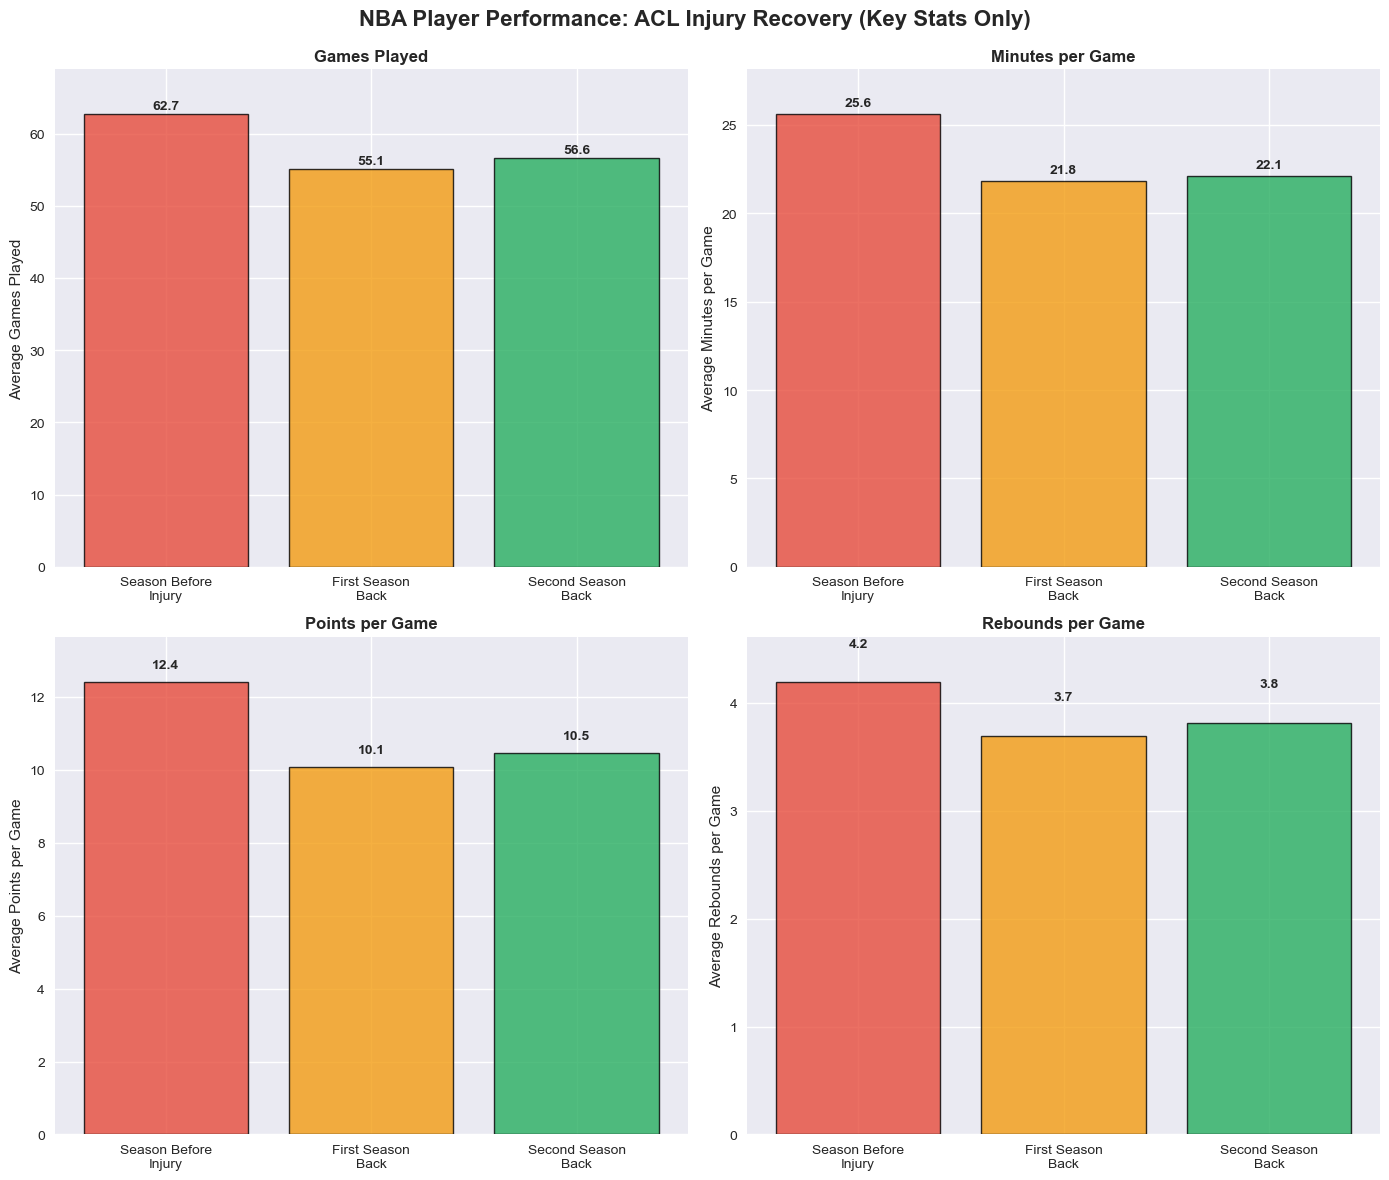

<Figure size 800x550 with 0 Axes>

In [241]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Calculate means for each metric
achilles_metrics = {
    'Games': [
        final_df_achilles_filtered["prev_g"].mean(),
        final_df_achilles_filtered["first_g"].mean(),
        final_df_achilles_filtered["second_g"].mean()
    ],
    'Minutes per Game': [
        final_df_achilles_filtered["prev_mpg"].mean(),
        final_df_achilles_filtered["first_mpg"].mean(),
        final_df_achilles_filtered["second_mpg"].mean()
    ],
    'Rebounds per Game': [
        final_df_achilles_filtered["prev_rpg"].mean(),
        final_df_achilles_filtered["first_rpg"].mean(),
        final_df_achilles_filtered["second_rpg"].mean()
    ],
    'Points per Game': [
        final_df_achilles_filtered["prev_ppg"].mean(),
        final_df_achilles_filtered["first_ppg"].mean(),
        final_df_achilles_filtered["second_ppg"].mean()
    ]
}

acl_metrics = {
    'Games': [
        final_df_acl_filtered["prev_g"].mean(),
        final_df_acl_filtered["first_g"].mean(),
        final_df_acl_filtered["second_g"].mean()
    ],
    'Minutes per Game': [
        final_df_acl_filtered["prev_mpg"].mean(),
        final_df_acl_filtered["first_mpg"].mean(),
        final_df_acl_filtered["second_mpg"].mean()
    ],
    'Rebounds per Game': [
        final_df_acl_filtered["prev_rpg"].mean(),
        final_df_acl_filtered["first_rpg"].mean(),
        final_df_acl_filtered["second_rpg"].mean()
    ],
    'Points per Game': [
        final_df_acl_filtered["prev_ppg"].mean(),
        final_df_acl_filtered["first_ppg"].mean(),
        final_df_acl_filtered["second_ppg"].mean()
    ]
}

# Time periods
time_periods = ['Season Before\nInjury', 'First Season\nBack', 'Second Season\nBack']
colors = ['#E74C3C', '#F39C12', '#27AE60']

# ACL Bar Charts
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('NBA Player Performance: ACL Injury Recovery (Key Stats Only)', 
             fontsize=16, fontweight='bold', y=0.98)

metric_titles = ['Games Played', 'Minutes per Game', 'Points per Game', 'Rebounds per Game']
metric_keys = ['Games', 'Minutes per Game', 'Points per Game', 'Rebounds per Game']

for ax, metric, title in zip(axes.flatten(), metric_keys, metric_titles):
    bars = ax.bar(time_periods, acl_metrics[metric], color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    ax.set_title(title, fontweight='bold')
    ax.set_ylabel(f'Average {title}')
    ax.set_ylim(0, max(acl_metrics[metric]) * 1.1)
    for bar, value in zip(bars, acl_metrics[metric]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


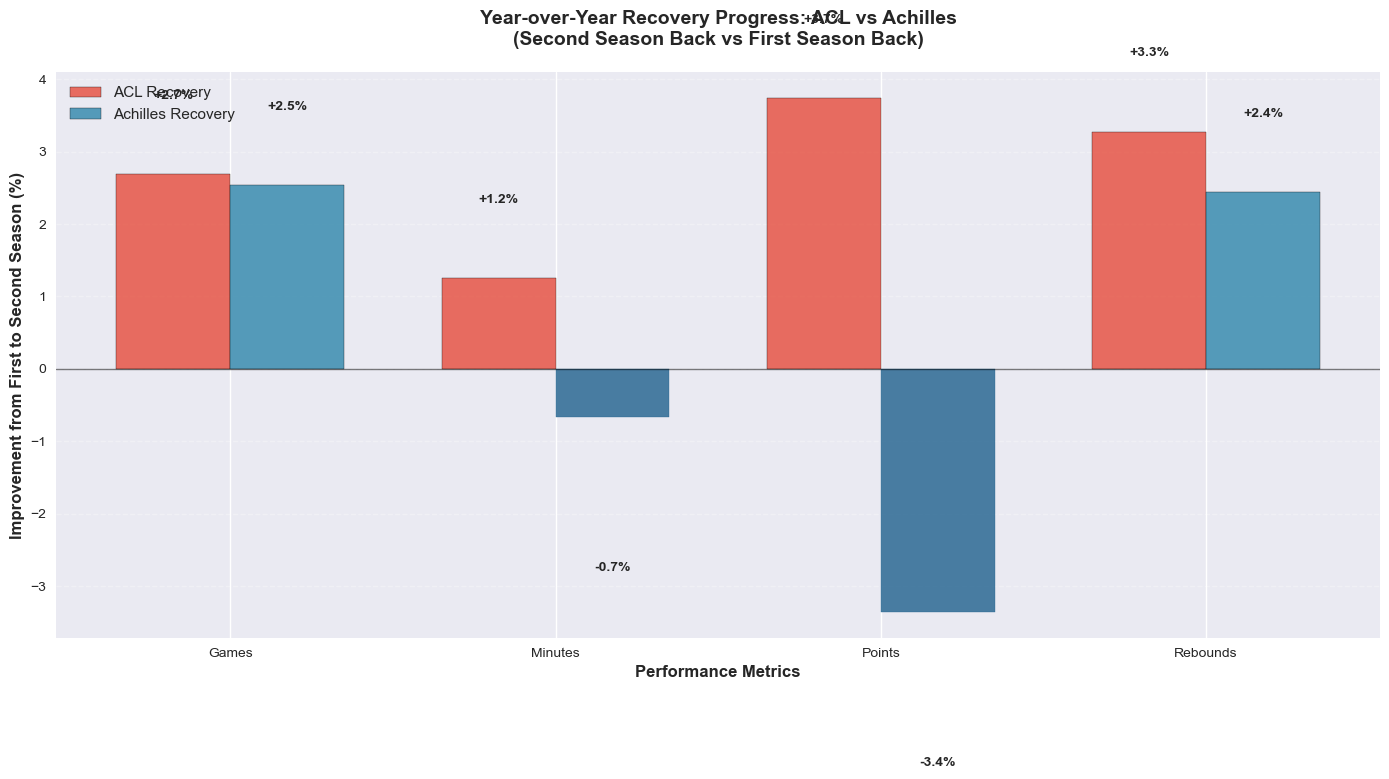

FIRST TO SECOND SEASON IMPROVEMENT COMPARISON

ACL Injury - Year-over-Year Improvement (%):
---------------------------------------------
Games          :   +2.7%
Minutes        :   +1.2%
Points         :   +3.7%
Rebounds       :   +3.3%

ACL Sample Size: n = 35

Achilles Injury - Year-over-Year Improvement (%):
---------------------------------------------
Games          :   +2.5%
Minutes        :   -0.7%
Points         :   -3.4%
Rebounds       :   +2.4%

Achilles Sample Size: n = 17

---------------------------------------------
IMPROVEMENT COMPARISON (Achilles - ACL):
---------------------------------------------
Games          :   -0.2% (Better: ACL)
Minutes        :   -1.9% (Better: ACL)
Points         :   -7.1% (Better: ACL)
Rebounds       :   -0.8% (Better: ACL)


In [243]:
# Create a single graph comparing first season to second season recovery for ACL vs Achilles
fig, ax = plt.subplots(figsize=(14, 8))

# Calculate improvement percentages for each injury type
metrics = ['Games', 'Minutes', 'Points', 'Rebounds']

# ACL improvements (second season vs first season)
acl_first_season = [
    final_df_acl_filtered["first_g"].mean(),
    final_df_acl_filtered["first_mpg"].mean(),
    final_df_acl_filtered["first_ppg"].mean(),
    final_df_acl_filtered["first_rpg"].mean(),
]

acl_second_season = [
    final_df_acl_filtered["second_g"].mean(),
    final_df_acl_filtered["second_mpg"].mean(),
    final_df_acl_filtered["second_ppg"].mean(),
    final_df_acl_filtered["second_rpg"].mean(),
]

acl_improvements = [(second/first - 1) * 100 if first != 0 else 0 
                   for first, second in zip(acl_first_season, acl_second_season)]

# Achilles improvements (second season vs first season)
achilles_first_season = [
    achilles_metrics['Games'][1],
    achilles_metrics['Minutes per Game'][1],
    achilles_metrics['Points per Game'][1],
    achilles_metrics['Rebounds per Game'][1],
]

achilles_second_season = [
    achilles_metrics['Games'][2],
    achilles_metrics['Minutes per Game'][2],
    achilles_metrics['Points per Game'][2],
    achilles_metrics['Rebounds per Game'][2],
]

achilles_improvements = [(second/first - 1) * 100 if first != 0 else 0 
                        for first, second in zip(achilles_first_season, achilles_second_season)]

# Set up the bar positions
x_pos = np.arange(len(metrics))
width = 0.35

# Create grouped bars
acl_bars = ax.bar(x_pos - width/2, acl_improvements, width, 
                  label='ACL Recovery', color='#E74C3C', alpha=0.8, edgecolor='black')
achilles_bars = ax.bar(x_pos + width/2, achilles_improvements, width, 
                      label='Achilles Recovery', color='#2E86AB', alpha=0.8, edgecolor='black')

# Customize the chart
ax.set_xlabel('Performance Metrics', fontweight='bold', fontsize=12)
ax.set_ylabel('Improvement from First to Second Season (%)', fontweight='bold', fontsize=12)
ax.set_title('Year-over-Year Recovery Progress: ACL vs Achilles\n(Second Season Back vs First Season Back)', 
             fontweight='bold', fontsize=14, pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics)

# Add horizontal line at 0% (no improvement)
ax.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)

# Add value labels on bars
for bar, improvement in zip(acl_bars, acl_improvements):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + (1 if height >= 0 else -2),
            f'{improvement:+.1f}%', ha='center', va='bottom' if height >= 0 else 'top', 
            fontweight='bold', fontsize=10)

for bar, improvement in zip(achilles_bars, achilles_improvements):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + (1 if height >= 0 else -2),
            f'{improvement:+.1f}%', ha='center', va='bottom' if height >= 0 else 'top', 
            fontweight='bold', fontsize=10)

# Add legend
ax.legend(loc='upper left', fontsize=11)

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Color bars based on positive/negative improvement
for i, (acl_imp, achilles_imp) in enumerate(zip(acl_improvements, achilles_improvements)):
    if acl_imp < 0:
        acl_bars[i].set_color('#C0392B')  # Darker red for negative
    if achilles_imp < 0:
        achilles_bars[i].set_color('#1F618D')  # Darker blue for negative

plt.tight_layout()
plt.show()

# Print summary statistics
print("="*70)
print("FIRST TO SECOND SEASON IMPROVEMENT COMPARISON")
print("="*70)

print("\nACL Injury - Year-over-Year Improvement (%):")
print("-" * 45)
for metric, improvement in zip(metrics, acl_improvements):
    print(f"{metric:15}: {improvement:+6.1f}%")

print(f"\nACL Sample Size: n = {len(final_df_acl_filtered)}")

print("\nAchilles Injury - Year-over-Year Improvement (%):")
print("-" * 45)
for metric, improvement in zip(metrics, achilles_improvements):
    print(f"{metric:15}: {improvement:+6.1f}%")

print(f"\nAchilles Sample Size: n = {len(final_df_achilles_filtered)}")

print("\n" + "-"*45)
print("IMPROVEMENT COMPARISON (Achilles - ACL):")
print("-" * 45)
for metric, acl_imp, achilles_imp in zip(metrics, acl_improvements, achilles_improvements):
    diff = achilles_imp - acl_imp
    better = "Achilles" if diff > 0 else "ACL" if diff < 0 else "Equal"
    print(f"{metric:15}: {diff:+6.1f}% (Better: {better})")

print("="*70)